<a href="https://colab.research.google.com/github/neylinsomne/neylinsomne/blob/main/CCB_EPV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga documentos
---

In [ ]:
!pip install ahpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ahpy import ahpy
from sklearn.impute import SimpleImputer
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df19_1 = pd.read_csv('/content/drive/My Drive/Datos_Concurso_CCB/EPV/Base2019_1.csv', low_memory=False)
df19_2 = pd.read_csv('/content/drive/My Drive/Datos_Concurso_CCB/EPV/Base2019_2.csv', low_memory=False)
df20 = pd.read_csv('/content/drive/My Drive/Datos_Concurso_CCB/EPV/Base_2020.csv',encoding='latin1' )
df21 = pd.read_csv('/content/drive/My Drive/Datos_Concurso_CCB/EPV/Base2021.csv', low_memory=False)
df22 = pd.read_csv('/content/drive/My Drive/Datos_Concurso_CCB/EPV/Base2022.csv')
df23 = pd.read_csv('/content/drive/My Drive/Datos_Concurso_CCB/EPV/Base2023.csv', low_memory=False)
poligonos_localidades = pd.read_csv('/content/drive/My Drive/poligonos-localidades.csv', sep=';', low_memory=False)
#df_dian= pd.read_xlsx('/content/drive/My Drive/Datos_Concurso_CCB/anexo-directorio-estadistico-empresas-2019-2021.xlsx')
names = ["df19_1", "df19_2", "df20", "df21", "df22","df23"]
dfs = {
    "df19_1": df19_1,
    "df19_2": df19_2,
    "df20": df20,
    "df21": df21,
    "df22": df22,
    "df23": df23
}

Como primer paso se deben identificar las diferencias entre las bases de datos

In [ ]:
result = {}
unicas=[]
for name in names:
    df = dfs[name]
    for column in df.columns:
        if column in result:
            result[column] += 1
        else:
            result[column] = 1

unicas = [column for column, count in result.items() if count == 1]
print(result)
print(f"Son {len(result.keys())} columnas en total, \n Donde la cantidad de columnas únicas es: {len(unicas)} \n y estas son: {unicas}")

{'ID_ENCUESTA': 2, 'F2': 1, 'EDAD': 3, 'P1': 2, 'P2': 6, 'P3': 3, 'P4': 2, 'P5': 2, 'P6': 5, 'P7': 3, 'P102': 6, 'P103': 6, 'P106': 6, 'P107_1': 2, 'P107_2': 2, 'P107_3': 2, 'P107_4': 2, 'P107_5': 2, 'P107_6': 2, 'P107_7': 2, 'P107_8': 2, 'P107_9': 2, 'P107_12': 2, 'P107_13': 2, 'P107_14': 1, 'P107_99': 1, 'P107_5_1': 2, 'P108_1': 2, 'P108_2': 2, 'P108_3': 2, 'P108_4': 2, 'P108_5': 2, 'P108_6': 2, 'P108_7': 2, 'P108_8': 2, 'P128': 6, 'P109': 6, 'P111': 6, 'P112': 6, 'P113': 2, 'P114_1': 2, 'P114_2': 2, 'P114_3': 2, 'P114_4': 1, 'P114_5': 1, 'P114_6': 1, 'P114_7': 1, 'P114_8': 1, 'P114_9': 1, 'P114_10': 1, 'P114_11': 1, 'P114_12': 1, 'P114_13': 1, 'P115': 2, 'P116': 2, 'P117': 5, 'P121': 5, 'P121A_1': 2, 'P121A_2': 2, 'P121A_3': 2, 'P121A_6': 2, 'P121A_5': 2, 'P121A_4': 2, 'P121A_99': 1, 'P121A_99_CUAL': 1, 'P122': 3, 'P104': 2, 'P201': 2, 'P202': 2, 'P203': 6, 'P204_1': 4, 'P204_2': 4, 'P204_3': 4, 'P204_4': 4, 'P204_6': 4, 'P204_13': 4, 'P204_18': 2, 'P204_19': 4, 'P204_8': 4, 'P204_2

In [ ]:
xd = {}
for name in names:
    df = dfs[name]
    info = []
    col=[]
    cont = 0
    for column in df.columns:
        if column in unicas:
            cont += 1
            col.append(column)
    info.append(col)
    info.append(cont)
    xd[name] = info

print(xd)


{'df19_1': [['F2', 'P107_14', 'P107_99', 'P114_4', 'P114_5', 'P114_6', 'P114_7', 'P114_8', 'P114_9', 'P114_10', 'P114_11', 'P114_12', 'P114_13', 'P121A_99', 'P121A_99_CUAL', 'P204_99', 'P204_99_CUAL', 'P238_21', 'P238_25', 'P220_99', 'P242_8', 'P204_1_96', 'P204_1_97', 'P204_1_99', 'P204_1_99_CUAL', 'P210_99', 'P235_3', '_V158', '_V159', '_V160', 'P235', 'P235_1_99', 'P236', 'P301_1', 'P301_2', 'P301_12', 'P301_4', 'P301_9', 'P301_5', 'P301_3', 'P301_7', 'P301_8', 'P301_10', 'P301_11', 'P307_1', 'P307_2', 'P307_3', 'P307_4', 'P307_5', 'P307_6', 'P310_10', 'P310_11', 'P310_12', 'P310_13', 'P310_3', 'P310_4', 'P310_5', 'P310_6', 'P310_7', 'P310_8', 'P310_9', 'P314_3', 'P314_4', 'P314_5', 'P314_6', 'P314_7', 'P405_A_99_CUAL', 'P409', 'P419_99', 'P445_99_CUAL'], 70], 'df19_2': [['IDM', 'P101', 'P5A', 'P445', 'P405A', 'P301_1_1', 'P301_1_2', 'P301_1_3', 'P301_1_4', 'P301_1_5', 'P301_1_6', 'P301_1_7', 'P301_1_8', 'P301_1_9', 'P401_1_3', 'P401_1_4', 'P401_1_6', 'P401_1_9', 'P301_1_10', 'P301_

A primera vista se puede ver que todos los dataframes tienen distintas columnas y podemos procedera a la identificación de las columnas cual objetio es contener la misma información, pero que entre bases ha cambiado el nombre:

El dataframe del 2020 no tiene registro de la columna P401, ni P449. Ambas cruciales para

# Comprensión del negocio
---

Al estudiar ambas bases de datos se encuentran preguntas realizadas en común, "¿fué victima de un delito?", "¿lo denunción?"

Al encontrar esto se va a hacer el mismo análisis, comparando la tasa de denunca habiendo sido victima, con respecto a la relación que tiene con la policía y los agentes de leyes, tratamientos de estos.

#Revisión exhaustiva y comprensión de los datos
---

#Df 19_1

In [ ]:
dfs["df19_1"].describe()

,F2,EDAD,P1,P2,P3,P4,P5,P6,P7,P102,...,P445_1,P445_2,P445_3,P445_4,P445_5,P445_6,P445_7,P445_97,P445_99,FEX
count,7034.000000,6616.000000,7034.000000,7034.000000,7034.000000,7034.000000,7034.000000,7034.000000,7034.000000,7032.000000,...,278.0,221.0,1149.0,371.0,355.0,540.0,286.0,14.0,489.0,7034.000000
mean,10.394086,43.100665,12.045635,2.233153,3.673301,3.634632,2.792010,4.195195,1.469719,3.086177,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,888.004297
std,5.380471,16.175740,22.635089,2.557281,10.849691,9.593168,0.990407,11.192733,0.499118,0.996351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,755.167131
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27.460727
25%,6.000000,29.000000,4.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,279.040330
50%,11.000000,42.000000,6.000000,1.000000,2.000000,3.000000,3.000000,2.000000,1.000000,4.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,607.161271
75%,15.000000,55.000000,9.000000,2.000000,4.000000,4.000000,3.000000,4.000000,2.000000,4.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1330.288948
max,19.000000,94.000000,98.000000,12.000000,98.000000,98.000000,6.000000,99.000000,2.000000,4.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5391.437706


In [ ]:
dfs["df19_1"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7034 entries, 0 to 7033
Columns: 341 entries, ID_ENCUESTA to FEX
dtypes: float64(316), int64(11), object(14)
memory usage: 18.3+ MB


In [ ]:
columnas19_1=[i for i in dfs["df19_1"].columns]
print(len(columnas19_1)," ", columnas19_1)

341   ['ID_ENCUESTA', 'F2', 'EDAD', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P102', 'P103', 'P106', 'P107_1', 'P107_2', 'P107_3', 'P107_4', 'P107_5', 'P107_6', 'P107_7', 'P107_8', 'P107_9', 'P107_12', 'P107_13', 'P107_14', 'P107_99', 'P107_5_1', 'P108_1', 'P108_2', 'P108_3', 'P108_4', 'P108_5', 'P108_6', 'P108_7', 'P108_8', 'P128', 'P109', 'P111', 'P112', 'P113', 'P114_1', 'P114_2', 'P114_3', 'P114_4', 'P114_5', 'P114_6', 'P114_7', 'P114_8', 'P114_9', 'P114_10', 'P114_11', 'P114_12', 'P114_13', 'P115', 'P116', 'P117', 'P121', 'P121A_1', 'P121A_2', 'P121A_3', 'P121A_6', 'P121A_5', 'P121A_4', 'P121A_99', 'P121A_99_CUAL', 'P122', 'P104', 'P201', 'P202', 'P203', 'P204_1', 'P204_2', 'P204_3', 'P204_4', 'P204_6', 'P204_13', 'P204_18', 'P204_19', 'P204_8', 'P204_20', 'P204_21', 'P204_22', 'P204_23', 'P204_24', 'P204_25', 'P204_26', 'P204_27', 'P204_28', 'P204_29', 'P204_99', 'P204_99_CUAL', 'P238_1', 'P238_2', 'P238_3', 'P238_4', 'P238_6', 'P238_13', 'P238_18', 'P238_19', 'P238_8', 'P238_20

#Df 19_2


In [ ]:
dfs["df19_2"].describe()

,LOCALIDAD,P7,P1,P101,P2,P3,P4,P5,P6,P5A,...,P216_27_4,P216_27_5,P216_28_1,P216_28_2,P216_28_3,P216_28_4,P216_28_5,P216_28_6,P216_28_7,FEX
count,9477.000000,9477.000000,9134.000000,9477.000000,9477.000000,9477.000000,9477.000000,9477.000000,9477.000000,9477.000000,...,1.0,1.0,5.0,6.0,9.0,6.0,3.0,1.0,4.0,9477.000000
mean,10.077767,1.461116,42.674294,6.146882,2.002216,2.868418,2.701593,2.683444,3.470824,1.527382,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,593.611718
std,5.493114,0.498512,15.979183,3.193419,2.024360,5.598563,4.063917,0.958198,7.215105,0.499276,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,852.519737
min,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.496126
25%,6.000000,1.000000,29.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,216.260818
50%,10.000000,1.000000,41.000000,6.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,476.593399
75%,15.000000,2.000000,55.000000,9.000000,2.000000,4.000000,3.000000,3.000000,4.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,716.996850
max,19.000000,2.000000,93.000000,14.000000,12.000000,98.000000,98.000000,6.000000,99.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,43391.453660


In [ ]:
dfs["df19_2"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9477 entries, 0 to 9476
Columns: 530 entries, IDM to FEX
dtypes: float64(392), int64(79), object(59)
memory usage: 38.3+ MB


In [ ]:
columnas19_2=[i for i in df19_2.columns]
print(len(columnas19_2)," ", columnas19_2)

530   ['IDM', 'LOCALIDAD', 'P7', 'P1', 'P101', 'P2', 'P3', 'P4', 'P5', 'P6', 'P5A', 'P102', 'P103', 'P106', 'P109', 'P111', 'P112', 'P113', 'P115', 'P117', 'P121', 'P128', 'P201', 'P203', 'P230', 'P233', 'P305', 'P405', 'P417', 'P444', 'P445', 'P405A', 'P108_1', 'P108_2', 'P108_3', 'P108_4', 'P108_5', 'P108_6', 'P108_7', 'P108_8', 'P114_1', 'P114_2', 'P114_3', 'P302_1', 'P302_2', 'P302_3', 'P302_4', 'P302_5', 'P302_6', 'P302_7', 'P302_8', 'P302_9', 'P303_3', 'P303_5', 'P303_7', 'P303_8', 'P303_9', 'P304_3', 'P304_7', 'P315_1', 'P315_2', 'P315_3', 'P315_4', 'P315_5', 'P401', 'P407', 'P407_2', 'P407_3', 'P302_10', 'P303_10', 'P303_11', 'P303_12', 'P304_10', 'P304_11', 'P304_12', 'P301_1_1', 'P301_1_2', 'P301_1_3', 'P301_1_4', 'P301_1_5', 'P301_1_6', 'P301_1_7', 'P301_1_8', 'P301_1_9', 'P310_1_1', 'P310_1_2', 'P314_1', 'P314_2', 'P401_1_1', 'P401_1_3', 'P401_1_4', 'P401_1_6', 'P401_1_9', 'P407_1', 'P301_1_10', 'P301_1_11', 'P401_1_10', 'P401_1_11', 'P401_1_13', 'P107_1', 'P107_2', 'P107_3

In [ ]:
dfs["df19_2"]["P401"].dtype

dtype('int64')

In [ ]:
# Crear el mapa de calor
#plt.figure(figsize=(10, 10))
#sns.heatmap(df19_2[columnas19_2].corr(),
           # vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}).set(title="Mapa relacional entre las características de cada persona")

# Mostrar el mapa de calor
#plt.show()

#Df 20

In [ ]:
dfs["df20"].describe()

,Id_Encuestado,P1. ¿Cuántos años tiene? (ENC: ANOTE LA EDAD EXACTA Y TAMBIEN SELECCIONE EL RANGO),P214_10,P214_13,P214_16,P206_10,P206_13,P209_1,P209_2,P209_3,...,P209_13,P209_14,P209_15,P209_16,P209_17,P209_18,P234,P407,P418,FEX
count,3500.000000,3500.000000,0.0,0.0,0.0,0.0,0.0,466.000000,54.000000,80.000000,...,3.0,2.000000,53.000000,5.000000,7.000000,67.000000,0.0,0.0,791.000000,2.813000e+03
mean,1750.500000,35.499714,NaN,NaN,NaN,NaN,NaN,1.255365,1.148148,1.250000,...,1.0,3.000000,7.547170,0.400000,1.571429,2.462687,NaN,NaN,3.006321,3.087000e+03
std,1010.507298,15.679567,NaN,NaN,NaN,NaN,NaN,0.757204,1.279850,0.920924,...,0.0,2.828427,18.925528,0.547723,1.511858,3.349936,NaN,NaN,13.169632,8.183462e+04
min,1.000000,-120.000000,NaN,NaN,NaN,NaN,NaN,-1.000000,0.000000,-1.000000,...,1.0,1.000000,-3.000000,0.000000,1.000000,-3.000000,NaN,NaN,0.000000,1.534233e+03
25%,875.750000,23.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,...,1.0,2.000000,1.000000,0.000000,1.000000,1.000000,NaN,NaN,1.000000,1.536687e+03
50%,1750.500000,32.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,...,1.0,3.000000,2.000000,0.000000,1.000000,2.000000,NaN,NaN,2.000000,1.539074e+03
75%,2625.250000,45.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,...,1.0,4.000000,5.000000,1.000000,1.000000,3.000000,NaN,NaN,3.000000,1.542654e+03
max,3500.000000,369.000000,NaN,NaN,NaN,NaN,NaN,8.000000,10.000000,6.000000,...,1.0,5.000000,99.000000,1.000000,5.000000,20.000000,NaN,NaN,360.000000,4.341866e+06


In [ ]:
dfs["df20"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Columns: 174 entries, Id_Encuesta to FEX
dtypes: float64(27), int64(2), object(145)
memory usage: 4.6+ MB


In [ ]:
dfs["df20"].columns

Index(['Id_Encuesta', 'Id_Encuestado', 'LOCALIDAD', 'P1.1 Rango de edad',
       'ESTRATO',
       'P1. ¿Cuántos años tiene? (ENC: ANOTE LA EDAD EXACTA Y TAMBIEN SELECCIONE EL RANGO)',
       'P2', 'P6', 'P7', 'P106',
       ...
       'P412_C', 'P412_D', 'P412_E', 'P412_F', 'P417', 'P418', 'P421', 'P444.',
       'CLAVE', 'FEX'],
      dtype='object', length=174)

In [ ]:
columnas22=[i for i in dfs["df20"].columns]
print(len(columnas22)," ",columnas22)

174   ['Id_Encuesta', 'Id_Encuestado', 'LOCALIDAD', 'P1.1 Rango de edad', 'ESTRATO', 'P1. ¿Cuántos años tiene? (ENC: ANOTE LA EDAD EXACTA Y TAMBIEN SELECCIONE EL RANGO)', 'P2', 'P6', 'P7', 'P106', 'P102', 'P103', 'P109', 'P111', 'P112', 'P117_1', 'P117_2', 'P117_3', 'P121', 'P122', 'P123', 'P447_1', 'P447_2', 'P447_3', 'P447_4', 'P447_5', 'P447_6', 'P128', 'P203', 'P204_A', 'P204_B', 'P204_C', 'P204_D', 'P204_E', 'P204_F', 'P204_G', 'P204_H', 'P204_I', 'P204_J', 'P204_K', 'P204_L', 'P204_M', 'P204_N', 'P204_O', 'P204_P', 'P204_Q', 'P204_R', 'P238_1', 'P238_2', 'P238_3', 'P214_1', 'P214_2', 'P214_3', 'P214_4', 'P214_5', 'P214_6', 'P214_7', 'P214_8', 'P214_9', 'P214_10', 'P214_11', 'P214_12', 'P214_13', 'P214_14', 'P214_15', 'P214_16', 'P214_17', 'P214_18', 'P206_1', 'P206_2', 'P206_3', 'P206_4', 'P206_5', 'P206_6', 'P206_7', 'P206_8', 'P206_9', 'P206_10', 'P206_11', 'P206_12', 'P206_13', 'P206_14', 'P206_15', 'P206_16', 'P206_17', 'P206_18', 'P209_1', 'P209_2', 'P209_3', 'P209_4', 'P209

#Df 21

In [ ]:
dfs["df21"].describe()

,NUMERO,CONSECUTIVO,CIUDAD,GENERO,EDAD,P1_RANGO_EDAD,LOCALIDAD,ESTRATO,P106,P102,...,P412_E,P412_F,P417,P418,P421,P444,P2,P6,P3,FEX
count,6.532000e+03,6532.000000,6532.0,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,...,444.000000,444.000000,6532.000000,1492.000000,1492.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000
mean,2.350493e+13,3266.500306,1.0,1.649418,37.484231,5.103950,9.545928,2.669167,4.025107,1.700704,...,3.231982,3.322072,1.771586,2.446381,2.588472,1.728261,2.813533,3.038120,1.204838,897.881105
std,9.571785e+11,1885.770224,0.0,0.477189,13.793595,2.788091,5.037529,1.024585,0.569188,0.457985,...,1.143345,1.199081,0.419843,2.659368,1.300395,0.444890,3.851056,3.883535,3.956816,605.538750
min,3.700000e+01,1.000000,1.0,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.233000
25%,2.330000e+13,1633.750000,1.0,1.000000,26.000000,3.000000,7.000000,2.000000,4.000000,1.000000,...,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,579.237000
50%,2.350000e+13,3266.500000,1.0,2.000000,35.000000,5.000000,9.000000,3.000000,4.000000,2.000000,...,3.000000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,741.645000
75%,2.380000e+13,4899.250000,1.0,2.000000,47.000000,7.000000,11.000000,3.000000,4.000000,2.000000,...,4.000000,4.000000,2.000000,3.000000,4.000000,2.000000,4.000000,5.000000,1.000000,1058.186000
max,2.400000e+13,6532.000000,1.0,2.000000,90.000000,14.000000,19.000000,6.000000,5.000000,2.000000,...,5.000000,5.000000,2.000000,20.000000,5.000000,2.000000,93.000000,93.000000,93.000000,12567.616000


In [ ]:
columnas21=[i for i in dfs["df21"].columns]
print(len(columnas21)," ",columnas21)

202   ['NUMERO', 'CONSECUTIVO', 'CIUDAD', 'GENERO', 'EDAD', 'P1_RANGO_EDAD', 'LOCALIDAD', 'ESTRATO', 'P106', 'P102', 'P103', 'P109', 'P111', 'P112', 'P117', 'P121', 'P446', 'P446_1', 'P447_1', 'P447_2', 'P447_3', 'P447_4', 'P447_5', 'P447_6', 'P128', 'P203', 'P204_A', 'P204_B', 'P204_C', 'P204_D', 'P204_E', 'P204_F', 'P204_G', 'P204_H', 'P204_I', 'P204_J', 'P204_K', 'P204_L', 'P204_M', 'P204_N', 'P204_O', 'P204_P', 'P204_Q', 'P204_R', 'P238_1', 'P238_2', 'P238_3', 'P238_4', 'P238_5', 'P238_6', 'P238_7', 'P238_8', 'P238_9', 'P238_10', 'P238_11', 'P238_12', 'P238_13', 'P238_14', 'P238_15', 'P238_16', 'P238_17', 'P238_18', 'P214_A', 'P214_B', 'P214_C', 'P214_D', 'P214_E', 'P214_F', 'P214_G', 'P214_H', 'P214_I', 'P214_J', 'P214_K', 'P214_L', 'P214_M', 'P214_N', 'P214_O', 'P214_P', 'P214_Q', 'P214_R', 'P206_A', 'P206_B', 'P206_C', 'P206_D', 'P206_E', 'P206_F', 'P206_G', 'P206_H', 'P206_I', 'P206_J', 'P206_K', 'P206_L', 'P206_M', 'P206_N', 'P206_O', 'P206_P', 'P206_Q', 'P206_R', 'P448_A', 'P

In [ ]:
# Crear el mapa de calor
#plt.figure(figsize=(10, 10))
#sns.heatmap(df21[columnas21].corr(),
 #           vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}).set(title="Mapa relacional entre las características de cada persona")

# Mostrar el mapa de calor
#plt.show()

#Df 22

In [ ]:
dfs["df22"].describe()

,ID_ENCUESTADO,LOCALIDAD,SEXO,ESTRATO,EDAD,EDADRANGO,P2,P6,P106,P102,...,P412_2,P412_3,P412_4,P412_5,P412_6,P417,P421,P444,FEX,_INDEX
count,7.346000e+03,7346.000000,7346.000000,7346.000000,6634.000000,7346.000000,7346.000000,7346.000000,7346.000000,7346.000000,...,825.000000,825.000000,825.000000,825.000000,825.000000,7346.000000,1479.000000,7346.000000,7346.000000,7346.000000
mean,1.842688e+08,9.602777,1.532262,2.741220,48.378354,3.656139,2.685952,4.461476,4.101552,1.652872,...,3.800000,3.635152,3.798788,3.653333,3.650909,1.798666,2.864097,1.704329,395.140200,3673.508984
std,1.754099e+06,5.253504,0.498992,1.042922,17.098081,1.522395,8.469884,11.239454,0.690521,0.476089,...,0.831714,0.903862,0.855166,0.906324,0.952425,0.401024,1.275798,0.456375,169.227384,2120.767296
min,1.815125e+08,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.136035,1.000000
25%,1.829216e+08,6.000000,1.000000,2.000000,34.000000,2.000000,1.000000,2.000000,4.000000,1.000000,...,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,1.000000,227.369177,1837.250000
50%,1.841268e+08,10.000000,2.000000,3.000000,49.000000,4.000000,2.000000,2.000000,4.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,3.000000,2.000000,433.558214,3673.500000
75%,1.852350e+08,14.000000,2.000000,3.000000,62.000000,5.000000,3.000000,6.000000,4.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,2.000000,501.911557,5509.750000
max,1.910887e+08,19.000000,2.000000,6.000000,99.000000,6.000000,96.000000,97.000000,5.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,2.000000,688.571619,7347.000000


In [ ]:
dfs["df22"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7346 entries, 0 to 7345
Columns: 128 entries, ID_ENCUESTA to _INDEX
dtypes: float64(90), int64(31), object(7)
memory usage: 7.2+ MB


In [ ]:
columnas22=[i for i in dfs["df22"].columns]
print(len(columnas22)," ",columnas22)

128   ['ID_ENCUESTA', 'ID_ENCUESTADO', 'LOCALIDAD', 'SEXO', 'ESTRATO', 'EDAD', 'EDADRANGO', 'P2', 'P2_1', 'P6', 'P6_1', 'P106', 'P102', 'P103', 'P109', 'P111', 'P112', 'P117', 'P121', 'P121_1_1', 'P121_1_2', 'P121_2', 'P121_2_2', 'P446', 'P446_1', 'P128', 'P203', 'P203_1_1', 'P203_1_A', 'P203_2', 'P203_1_B', 'P204_1', 'P214_1', 'P204_2', 'P214_2', 'P204_3', 'P214_3', 'P204_4', 'P214_4', 'P204_6', 'P214_6', 'P204_13', 'P214_13', 'P204_19', 'P214_19', 'P204_8', 'P214_8', 'P204_20', 'P214_20', 'P204_21', 'P214_21', 'P204_22', 'P214_22', 'P204_23', 'P214_23', 'P204_24', 'P214_24', 'P204_25', 'P214_25', 'P204_26', 'P214_26', 'P204_27', 'P214_27', 'P204_28', 'P214_28', 'P204_29', 'P214_29', 'P204_1_1', 'P204_1_1_1', 'P208_1', 'P208_2', 'P208_3', 'P208_4', 'P208_5', 'P208_6', 'P208_OTRO', 'P208_OTRO_1', 'P207', 'P207_1', 'P230', 'P233', 'P234_1', 'P234_2', 'P234_4', 'P234_5', 'P234_6', 'P234_11', 'P234_14', 'P234_17', 'P234_18', 'P234_19', 'P234_20', 'P234_21', 'P234_22', 'P234_23', 'P234_24'

In [ ]:
# Crear el mapa de calor
#plt.figure(figsize=(10, 10))
#sns.heatmap(df22[columnas22].corr(),
#            vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}).set(title="Mapa relacional entre las características de cada persona")

# Mostrar el mapa de calor
#plt.show()

idea loca:
hacer mapa de calor aleatoriamente por cada variable e indicador, y agrupación
relación

Para probar los sub indicadores

#DF 23

In [ ]:
dfs["df23"].describe()

,ID_INTERNO,CODIGO_ESTRATO,SEXO,ESTRATO,EDAD_EXACTA,EDAD_RANGO,P2,P6_2,P106,P102,...,P444,P445_1,P445_2,P445_3,P445_4,P445_5,P445_7,P445_8,ID,FEX
count,18975.000000,18975.000000,18975.000000,18975.000000,16222.000000,18975.000000,18975.000000,18975.000000,18975.000000,18975.000000,...,18975.000000,894.0,32.0,287.0,26.0,241.0,11.0,17484.0,1.897500e+04,18975.000000
mean,9700.916100,2.860711,1.561476,2.920685,47.341327,3.581555,2.524848,13.109829,4.107879,1.611331,...,1.668775,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.517820e+08,324.445104
std,5627.866371,0.979145,0.498868,0.884247,17.361876,1.548580,7.421846,49.488357,0.664976,0.487461,...,0.470666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.001305e+06,294.977309
min,1.000000,0.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.449267e+08,11.099072
25%,4812.500000,2.000000,1.000000,2.000000,32.000000,2.000000,1.000000,1.000000,4.000000,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.493808e+08,103.201454
50%,9686.000000,3.000000,2.000000,3.000000,47.000000,4.000000,2.000000,1.000000,4.000000,2.000000,...,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.520558e+08,214.063311
75%,14599.500000,3.000000,2.000000,3.000000,61.000000,5.000000,3.000000,5.000000,4.000000,2.000000,...,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.543064e+08,436.430310
max,19424.000000,6.000000,3.000000,6.000000,96.000000,6.000000,96.000000,991.000000,5.000000,2.000000,...,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.569332e+08,1565.964362


In [ ]:
dfs["df23"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18975 entries, 0 to 18974
Columns: 135 entries, ID_INTERNO to FEX
dtypes: float64(89), int64(32), object(14)
memory usage: 19.5+ MB


In [ ]:
columnas22=[i for i in dfs["df23"].columns]
print(len(columnas22)," ",columnas22)

135   ['ID_INTERNO', 'FECHA', 'NOMBRE_LOCALIDAD', 'NOMBRE_BARRIO', 'CODIGO_ESTRATO', 'SEXO', 'ESTRATO', 'EDAD_EXACTA', 'EDAD_RANGO', 'P2', 'P2_1', 'P6_2', 'P6_2_1', 'P106', 'P102', 'P103', 'P109', 'P111', 'P112', 'P117', 'P121_1', 'P121_1_1', 'P446', 'P446_1', 'P128', 'P203', 'P203_1_1', 'P203_2_2', 'P203_2_3', 'P204_1', 'P214_1', 'P204_2', 'P214_2', 'P204_3', 'P214_3', 'P204_4', 'P214_4', 'P204_6', 'P214_6', 'P204_13', 'P214_13', 'P204_19', 'P214_19', 'P204_8', 'P214_8', 'P204_20', 'P214_20', 'P204_21', 'P214_21', 'P204_22', 'P214_22', 'P204_23', 'P214_23', 'P204_24', 'P214_24', 'P204_25', 'P214_25', 'P204_26', 'P214_26', 'P204_27', 'P214_27', 'P204_28', 'P214_28', 'P204_29', 'P214_29', 'P204_1_1', 'P204_1_1_1', 'P208_1', 'P208_2', 'P208_3', 'P208_4', 'P208_5', 'P208_6', 'P208_OTRO', 'P208_OTRO_1', 'P207', 'P207_1', 'P204_1_2', 'P230', 'P233', 'P234_1', 'P234_2', 'P234_4', 'P234_5', 'P234_6', 'P234_11', 'P234_14', 'P234_17', 'P234_18', 'P234_19', 'P234_20', 'P234_21', 'P234_22', 'P234

In [ ]:
# Crear el mapa de calor
#plt.figure(figsize=(10, 10))
#sns.heatmap(df22[columnas22].corr(),
#            vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}).set(title="Mapa relacional entre las características de cada persona")

# Mostrar el mapa de calor
#plt.show()

#Estandarización de bases de datos:
---

#FUNCIONES ESTANDARIZACIÓN





Hay valores tales como 99 que se toman como un valor N/A, pero al ser columnas donde su valor numérico no es representante en un diccionario, sino más bien tiene un peso en la estadística, tal como en este caso al querer sacar un promedio, se cambia de esta manera:


In [ ]:
#Esta función en lo que nos va ayudar es a no afectar la media con valores a los que se les quiere sacar promedio,y justamente uno de estos valores es diferente (en este caso Nan o 99), lo cuál afectaría a la media de todos los promedios
import random
import numpy as np

def quitar_valor_smedia(df, col_a_cambiar, valor):
    sin_valor = df[col_a_cambiar].unique()
    sin_valor = sin_valor[~np.isnan(sin_valor)]
    sin_valor = sin_valor[sin_valor != valor]

    mask = df[col_a_cambiar].unique()
    mask = mask[mask == valor]
    cant = mask.sum()

    cantidad_por_valor = cant // len(sin_valor)

    indices = df.index[df[col_a_cambiar] == valor].tolist()

    for idx in random.sample(indices, len(indices)):
        if len(sin_valor) == 0:
            break
        nuevo_valor = random.choice(sin_valor)
        df.at[idx, col_a_cambiar] = nuevo_valor
        cantidad_por_valor -= 1
        if cantidad_por_valor == 0:
            sin_valor = sin_valor[sin_valor != nuevo_valor]

    return df


In [ ]:
import numpy as np
def prom_sin_col(df,columna,lista_columnas, valor):
  df[columna] = np.nan
  for idx, row in df.iterrows():
    valores = row[lista_columnas].loc[row[lista_columnas] != valor]  # Filtrar los valores diferentes del valor a ignorar
    promedio = valores.mean() if len(valores) > 0 else np.nan  # Calcular el promedio si hay valores
    df.at[idx, columna] = promedio
  return df

In [ ]:
import string
letras = list(string.ascii_uppercase)

def letras_a_num(df, indicador_columnas):
    mapeo = {letras[i]: str(i+1) for i in range(len(letras))}
    fil_df = df.filter(regex='^'+ indicador_columnas, axis=1)
    df.rename(columns={col: col[:-1] + mapeo[col[-1]] if col[-1] in letras else col for col in fil_df.columns}, inplace=True)
    return df


In [ ]:
def binomizar(df, columna, valor_a_1, valor_a_0):
  df[columna]=df[columna].replace({valor_a_0: 0,valor_a_1: 1})
  return df


In [ ]:
#column_index = df20.columns.get_loc("P1")

# Seleccionar las columnas después de la columna deseada
#columns_after = df20.columns[column_index + 1:]

# Mostrar las columnas seleccionadas
#print(columns_after)

#Manejo de la Estandarización


In [ ]:
# p1 (2019 both 21 ), p5 estrato(2019 both 21 ),  edad

In [ ]:
"""
columna_referencia = "P310_1"
df = dfs["df20"]

# Obtener el índice de la columna de referencia
indice_referencia = df.columns.get_loc(columna_referencia)

# Obtener las columnas después de la columna de referencia
columns_after = df.columns[indice_referencia+1:].tolist()
columns_after
"""
print("P449 y P421 no están en Df20")

P449 y P421 no están en Df20


Dónde se encunetran estas variables que necesitamos?

Como vemos las mismas columnas que refieren a la misma pregunta, a la misma información, tienden a cambiar de ID la pregunta, esto obivamente entorpece el proceso del análisis de estos datos.
En esta parte, lo principal será estandarizar tanto las columnas como la información que se encuentra en cada registro, ya sea cambiando valores cualtivativos a cuantitativos, para el mejor manejo de estos datos y la apertura al uso estadístico con estos. Ahora, ¿de dónde saldrán estos carácteres numéricos por los cuales serán intercambiados? Estos se verán de las demás bases de datos, tal como en el caso de la base de datos del 2020 (dfs["df20"]).

In [ ]:
#Se busca las columnas que inicien con el valor determinado para poder ver los cambios por base de datos
fil=df20.filter(regex="^P1", axis=1)
fil

,P1.1 Rango de edad,P1. ¿Cuántos años tiene? (ENC: ANOTE LA EDAD EXACTA Y TAMBIEN SELECCIONE EL RANGO),P106,P102,P103,P109,P111,P112,P117_1,P117_2,P117_3,P121,P122,P123,P128
0,De 36 a 45 años,43,Ha Aumentado,Inseguro,Inseguro,Parques,Ni seguro ni inseguro,NaN,"Hurto a personas (Atraco, cosquilleo, raponazo...",Violencia Sexual,"Violencia contra la mujer (física, psicológica...",No,Si,NaN,Noticieros de televisión
1,De 36 a 45 años,37,Ha disminuido,Seguro,Inseguro,Potreros,Inseguro,"8. Hurtos (atraco, cosquilleo, raponazo)","Hurto a personas (Atraco, cosquilleo, raponazo...",Violencia Sexual,Homicidio,Si,Si,NaN,Periódicos (Impresos o digitales)
2,Más de 55 años,68,Ha Aumentado,Seguro,Inseguro,Paraderos,Muy Inseguro,2. Presencia de personas vulnerables en el sis...,"Hurto a personas (Atraco, cosquilleo, raponazo...",Hurto a residencias,Homicidio,No,Si,NaN,Periódicos (Impresos o digitales)
3,De 46 a 55 años,55,Ha Aumentado,Inseguro,Inseguro,Parques,Muy Inseguro,1. Operacionalidad del sistema (aglomeraciones...,"Violencia contra la mujer (física, psicológica...","Hurto a personas (Atraco,\ncosquilleo, raponaz...",Extorsión,Si,No,5. Por el abuso de autoridad,Noticieros de televisión
4,De 36 a 45 años,36,Ha Aumentado,Inseguro,Inseguro,Ciclo Rutas,Inseguro,6. Capacidad de respuesta de las autoridades (...,"Hurto a personas (Atraco, cosquilleo, raponazo...",Feminicidio (Asesinato de mujeres),Hurto a residencias,Si,No,5. Por el abuso de autoridad,Noticieros de televisión
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,De 26 a 35 años,32,Sigue Igual,Seguro,Seguro,Calles,Inseguro,"8. Hurtos (atraco, cosquilleo, raponazo)","Hurto a personas (Atraco, cosquilleo, raponazo...",Homicidio,Venta de drogas,No,Si,NaN,Noticieros de televisión
3496,De 18 a 25 años,19,Sigue Igual,Seguro,Inseguro,Calles,Seguro,NaN,Feminicidio (Asesinato de mujeres),Terrorismo,Violencia Sexual,No,Si,NaN,"Redes sociales (Twiter, Facebook, Grupos de Wh..."
3497,De 26 a 35 años,32,Ha Aumentado,Inseguro,Inseguro,Calles,Inseguro,"8. Hurtos (atraco, cosquilleo, raponazo)",Terrorismo,Hurto a residencias,"Hurto a personas (Atraco,\ncosquilleo, raponaz...",Si,Si,NaN,Noticieros de televisión
3498,De 26 a 35 años,35,Ha Aumentado,Inseguro,Inseguro,Paraderos,Muy Inseguro,"8. Hurtos (atraco, cosquilleo, raponazo)",Ciber Crimen (delito electrónico),"Hurto a personas (Atraco,\ncosquilleo, raponaz...",Extorsión,Si,No,4. Por la corrupción,Noticieros de televisión


'EDAD','EDADRANGO','ESTRATO'

*  23 'EDAD_EXACTA', 'EDAD_RANGO', 'ESTRATO'
*  21 'EDAD', 'P1_RANGO_EDAD', 'ESTRATO'
*  20 'P1. ¿Cuántos años tiene? (ENC: ANOTE LA EDAD EXACTA Y TAMBIEN SELECCIONE EL RANGO)', 'P1.1 Rango de edad', 'ESTRATO'
*  19_1 'EDAD', 'P1', 'P5'
*  19_2 'P1', 'P101' 'P5'




















In [ ]:
df20["P1. ¿Cuántos años tiene? (ENC: ANOTE LA EDAD EXACTA Y TAMBIEN SELECCIONE EL RANGO)"].unique()

array([  43,   37,   68,   55,   36,   27,   34,   35,   48,   22,   99,
         52,   53,   59,   40,   28,   42,   26,   60,   46,   62,   33,
         57,   39,   49,   24,   44,   38,   45,   30,   50,   20,   18,
         56,   75,   25,   19,   70,   66,   32,   29,   31,   41,   47,
         51,   21,   61,   58,   65,   23,   63,   69,   54,   80,   72,
         73,   64,   76,   83,   74, -120,   78,   15,  -25,   86,   16,
         67,   17,   81,   87,   77,   85,   71,   82,    3,  369,    8,
         84])

In [ ]:
df20["P1.1 Rango de edad"].unique()

array(['De 36 a 45 años', 'Más de 55 años', 'De 46 a 55 años',
       'De 26 a 35 años', 'De 18 a 25 años'], dtype=object)

In [ ]:
# Se empieza por la estanda
df19_2.rename(columns={'P1': 'EDAD'}, inplace=True)
df19_2.rename(columns={'P5': 'ESTRATO'}, inplace=True)
df19_1.rename(columns={'P5': 'ESTRATO'}, inplace=True)
df19_1.rename(columns={'P1': 'EDAD_RANGO'}, inplace=True)
df19_2.rename(columns={'P101': 'EDAD_RANGO'}, inplace=True)
df20.rename(columns={"P1.1 Rango de edad": 'EDAD_RANGO'}, inplace=True)
df20.rename(columns={"P1. ¿Cuántos años tiene? (ENC: ANOTE LA EDAD EXACTA Y TAMBIEN SELECCIONE EL RANGO)": 'EDAD'}, inplace=True)
df20.rename(columns={"P117_1": 'P117'}, inplace=True)
df22.rename(columns={'EDADRANGO': 'EDAD_RANGO'}, inplace=True)
df23.rename(columns={'EDAD_EXACTA': 'EDAD'}, inplace=True)

In [ ]:
df19_1.rename(columns={'F2': 'LOCALIDAD'}, inplace=True)
df19_2.rename(columns={'F2': 'LOCALIDAD'}, inplace=True)

In [ ]:
# Diccionario de mapeo de columnas a cambiar por DataFrame
renombramientos_por_df = {
    "df19_1": {"P5": "ESTRATO", "P1": "EDAD_RANGO", 'F2': 'LOCALIDAD'},
    "df19_2": {"P1": "EDAD", "P5": "ESTRATO", "P101": "EDAD_RANGO", 'F2': 'LOCALIDAD'},
    "df20": {"P1.1 Rango de edad": "EDAD_RANGO", "P1. ¿Cuántos años tiene? (ENC: ANOTE LA EDAD EXACTA Y TAMBIEN SELECCIONE EL RANGO)": "EDAD", "P117_1": "P117"},
    "df22": {"EDADRANGO": "EDAD_RANGO"},
    "df23": {"EDAD_EXACTA": "EDAD"}
}

# Aplicar renombramientos a los DataFrames dentro del diccionario dfs
for name, df in dfs.items():
    if name in renombramientos_por_df:
        for col_orig, col_nuevo in renombramientos_por_df[name].items():
            df.rename(columns={col_orig: col_nuevo}, inplace=True)


In [ ]:
df21['EDAD'].unique()

array([29, 22, 62, 59, 49, 63, 45, 19, 50, 33, 40, 21, 18, 27, 46, 28, 34,
       52, 26, 32, 31, 48, 23, 60, 36, 39, 37, 35, 25, 30, 24, 44, 43, 67,
       57, 20, 47, 38, 68, 53, 54, 61, 42, 51, 58, 56, 64, 55, 41, 70, 69,
       66, 65, 71, 81, 73, 74, 89, 72, 75, 77, 78, 82, 79, 76, 83, 90, 86,
       80, 84])

In [ ]:
#eda={
#    'De 36 a 45 años':3, 'De 56 a 70 años':5, 'De 46 a 55 años':4,
#       'De 25 a 35 años ':2, 'De 18 a 24 años':1, "Mas de 70 años":6
#}
def limpiar_edad(edad):
    if edad < 18 or edad>90:
        return np.nan
    elif edad >= 18 and edad <= 24:
        return 1
    elif edad >= 25 and edad <= 35:
        return 2
    elif edad >= 36 and edad <= 45:
        return 3
    elif edad >= 46 and edad <= 55:
        return 4
    elif edad >= 56 and edad <= 70:
        return 5
    elif edad >70 and edad<=90:
        return 6


for name, df in dfs.items():
    df['EDAD'] = df['EDAD'].abs()
# Limpiar los valores de "edad" y asignar el rango correcto
    df['EDAD_RANGO'] = df['EDAD'].apply(limpiar_edad)
    print(df["EDAD_RANGO"].unique())#['EDAD', 'EDAD_RANGO']])

df19_1['EDAD'] = df19_1['EDAD'].abs()
# Limpiar los valores de "edad" y asignar el rango correcto
df19_1['EDAD_RANGO'] = df19_1['EDAD'].apply(limpiar_edad)

df19_2['EDAD'] = df19_2['EDAD'].abs()
# Limpiar los valores de "edad" y asignar el rango correcto
df19_2['EDAD_RANGO'] = df19_2['EDAD'].apply(limpiar_edad)

df20['EDAD'] = df20['EDAD'].abs()
# Limpiar los valores de "edad" y asignar el rango correcto
df20['EDAD_RANGO'] = df20['EDAD'].apply(limpiar_edad)

df21['EDAD'] = df21['EDAD'].abs()
# Limpiar los valores de "edad" y asignar el rango correcto
df21['EDAD_RANGO'] = df21['EDAD'].apply(limpiar_edad)

df22['EDAD'] = df22['EDAD'].abs()
# Limpiar los valores de "edad" y asignar el rango correcto
df22['EDAD_RANGO'] = df22['EDAD'].apply(limpiar_edad)

df23['EDAD'] = df23['EDAD'].abs()
# Limpiar los valores de "edad" y asignar el rango correcto
df23['EDAD_RANGO'] = df23['EDAD'].apply(limpiar_edad)



[ 2.  3.  4. nan  5.  1.  6.]
[ 3.  2.  4.  5.  1.  6. nan]
[ 3.  5.  4.  2.  1. nan  6.]
[2 1 5 4 3 6]
[ 3.  6.  5.  2.  4. nan  1.]
[ 3.  6.  5. nan  2.  4.  1.]


In [ ]:
df19_1=quitar_valor_smedia(df19_1,'P121',99)
df19_1['P121']
dfs["df19_1"] = quitar_valor_smedia(dfs["df19_1"], "P121", 99)
# Verificar el resultado
print(dfs["df19_1"]["P121"])


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7029    2.0
7030    2.0
7031    2.0
7032    1.0
7033    1.0
Name: P121, Length: 7034, dtype: float64


In [ ]:
#Agregar la columna del año a cada df
for nombre, df in dfs.items():
    año = nombre.replace("df", "")
    df["año"] = año

año = nombre.replace("df", "")
df19_1["año"] = año
df19_2["año"] = año
df20["año"] = año
df21["año"] = año
df22["año"] = año
df23["año"] = año

In [ ]:
column_index = df20.columns.get_loc("P234")

# Seleccionar las columnas después de la columna deseada
columns_after = df20.columns[column_index + 1:]

# Mostrar las columnas seleccionadas
print(columns_after)

Index(['P234_A', 'P234_B', 'P234_C', 'P234_D', 'P234_E', 'P234_F', 'P234_G',
       'P234_H', 'P234_I', 'P234_K', 'P234_L', 'P234_M', 'P234_N', 'P234_O',
       'P234_P', 'P234_Q', 'P234_R', 'P234_S', 'P234_T', 'P234_U', 'P234_V',
       'P304', 'P305', 'P308', 'P310_1', 'P310_2',
       'P311.1. Decisiones de libertad (medidas de aseguramiento, detención domiciliaria, medida intramural y prisión domiciliaria)',
       'P450_A', 'P450_B', 'P450_C', 'P450_D', 'P450_E', 'P405', 'P407',
       'P407_A', 'P407_B', 'P407_C', 'P407_1', 'P412_A', 'P412_B', 'P412_C',
       'P412_D', 'P412_E', 'P412_F', 'P417', 'P418', 'P421', 'P444.', 'CLAVE',
       'FEX', 'año'],
      dtype='object')


In [ ]:
for name, info in xd.items():
    print(f"{name}: {info[1]}")

df19_1: 70
df19_2: 259
df20: 54
df21: 88
df22: 11
df23: 15


In [ ]:
dfliter=df20.filter(regex="^P111", axis=1)
dfliter

,P111
0,Ni seguro ni inseguro
1,Inseguro
2,Muy Inseguro
3,Muy Inseguro
4,Inseguro
...,...
3495,Inseguro
3496,Seguro
3497,Inseguro
3498,Muy Inseguro


In [ ]:
column_index = df20.columns.get_loc("P234")

# Seleccionar las columnas después de la columna deseada
columns_after = df20.columns[column_index + 1:]

# Mostrar las columnas seleccionadas
print(columns_after)

Index(['P234_A', 'P234_B', 'P234_C', 'P234_D', 'P234_E', 'P234_F', 'P234_G',
       'P234_H', 'P234_I', 'P234_K', 'P234_L', 'P234_M', 'P234_N', 'P234_O',
       'P234_P', 'P234_Q', 'P234_R', 'P234_S', 'P234_T', 'P234_U', 'P234_V',
       'P304', 'P305', 'P308', 'P310_1', 'P310_2',
       'P311.1. Decisiones de libertad (medidas de aseguramiento, detención domiciliaria, medida intramural y prisión domiciliaria)',
       'P450_A', 'P450_B', 'P450_C', 'P450_D', 'P450_E', 'P405', 'P407',
       'P407_A', 'P407_B', 'P407_C', 'P407_1', 'P412_A', 'P412_B', 'P412_C',
       'P412_D', 'P412_E', 'P412_F', 'P417', 'P418', 'P421', 'P444.', 'CLAVE',
       'FEX', 'año'],
      dtype='object')


In [ ]:
valores_busqueda = [1, 2,3,4, 5,99]
columna_encontrada = None

for columna in df20.columns:
    if df20[columna].isin(valores_busqueda).all() and df20[columna].nunique() == len(valores_busqueda):
        columna_encontrada = columna
        break

if columna_encontrada:
    print(f"Columna encontrada: {columna_encontrada}")
else:
    print("No se encontró ninguna columna con los valores 1, 5 y 4.")


No se encontró ninguna columna con los valores 1, 5 y 4.


df20 no tiene P449 como P449, mirar el diccionario

In [ ]:
for name, df in dfs.items():
  df["P106"]=df["P106"].replace(5, 2).replace(4, 3)

df19_1['P106'] = df19_1['P106'].replace(5, 2).replace(4, 3)
df19_2['P106'] = df19_2['P106'].replace(5, 2).replace(4, 3)
df20['P106'] = df20['P106'].replace(5, 2).replace(4, 3)
df21['P106'] = df21['P106'].replace(5, 2).replace(4, 3)
df22['P106'] = df22['P106'].replace(5, 2).replace(4, 3)
df23['P106'] = df23['P106'].replace(5, 2).replace(4, 3)


In [ ]:
#PARA 2020 y 2021, se reemplazan los valores de la P449

#df20['P449'] = df20['P449'].replace(5, 2).replace(4, 3)
df21['P449'] = df['P449'].replace(5, 2).replace(4, 3)
print(df21['P449'])

dfs["df21"]['P449'] = dfs["df21"]['P449'].replace(5, 2).replace(4, 3)

0       1
1       1
2       1
3       3
4       2
       ..
6527    2
6528    2
6529    2
6530    1
6531    2
Name: P449, Length: 6532, dtype: int64


In [ ]:
fin= df19_2.filter(regex="^P301", axis=1)
fin

,P301_1_1,P301_1_2,P301_1_3,P301_1_4,P301_1_5,P301_1_6,P301_1_7,P301_1_8,P301_1_9,P301_1_10,P301_1_11
0,1,1,1,1,1,1,1,1,1,3,1
1,1,3,3,3,3,2,3,2,1,2,2
2,1,1,99,99,1,99,99,99,1,1,1
3,2,3,3,2,3,3,1,2,2,3,3
4,3,1,4,99,2,1,1,1,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...
9472,4,4,4,3,4,3,4,4,4,4,4
9473,2,2,99,99,99,1,2,2,1,3,3
9474,3,3,2,2,2,2,1,2,2,2,2
9475,3,3,3,3,3,3,3,3,4,3,3


In [ ]:
columnas_1 = ['P301_1', 'P301_2', 'P301_12', 'P301_4', 'P301_9', 'P301_5', 'P301_3', 'P301_7', 'P301_8', 'P301_10', 'P301_11']
columnas_2=["P301_1_1","P301_1_2","P301_1_3","P301_1_4","P301_1_5","P301_1_6","P301_1_7","P301_1_8","P301_1_9","P301_1_10","P301_1_11"]
df19_1=prom_sin_col(df19_1,"P449", columnas_1,99)
df19_2=prom_sin_col(df19_2,"P449", columnas_2,99)

dfs["df19_1"]=prom_sin_col(df19_1,"P449", columnas_1,99)
dfs["df19_2"]=prom_sin_col(df19_2,"P449", columnas_2,99)

In [ ]:
#p315 en 2019, despues de P310.1 en 2020, P450 2021-2023
#RENOMBRAR COLUMNAS multiples
def renombrar_cols(df,col_a_cam,cambio):
#  filtered_columns = df19_1.filter(regex=f'^{col_a_cam}', axis=1)
  df.rename(columns=lambda x: x.replace(col_a_cam, cambio), inplace=True)
  return df

df19_1=renombrar_cols(df19_1,"P315","P450")
df19_2=renombrar_cols(df19_2,"P315","P450")

dfs["df19_1"]=renombrar_cols(df19_1,"P315","P450")
dfs["df19_2"]=renombrar_cols(df19_2,"P315","P450")
filtered_columns = df19_1.filter(regex='^P450', axis=1)
filtered_columns

,P450_1,P450_2,P450_3,P450_4,P450_5
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,2.0,1.0
2,1.0,1.0,3.0,2.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
7029,1.0,1.0,1.0,1.0,1.0
7030,1.0,1.0,1.0,1.0,1.0
7031,99.0,99.0,99.0,99.0,99.0
7032,3.0,3.0,3.0,3.0,3.0


In [ ]:
filtered_columns = df20.filter(regex='^P450', axis=1)
filtered_columns

,P450_A,P450_B,P450_C,P450_D,P450_E
0,4. Bueno,3. Ni bueno ni malo,3. Ni bueno ni malo,2. Malo,3. Regular
1,1. Muy Malo,1. Muy Malo,1. Muy Malo,1. Muy Malo,3. Regular
2,3. Ni bueno ni malo,1. Muy Malo,2. Malo,2. Malo,4. Bueno
3,2. Malo,2. Malo,3. Ni bueno ni malo,3. Ni bueno ni malo,1. Pésimo
4,4. Bueno,1. Muy Malo,2. Malo,2. Malo,3. Regular
...,...,...,...,...,...
3495,4. Bueno,2. Malo,3. Ni bueno ni malo,3. Ni bueno ni malo,3. Regular
3496,1. Muy Malo,2. Malo,3. Ni bueno ni malo,1. Muy Malo,2. Malo
3497,1. Muy Malo,1. Muy Malo,2. Malo,1. Muy Malo,1. Pésimo
3498,2. Malo,1. Muy Malo,2. Malo,1. Muy Malo,3. Regular


In [ ]:

mapeo = {letras[i]: str(i+1) for i in range(len(letras))}
fil_20 = df20.filter(regex='^P450', axis=1)
fil_21 = df20.filter(regex='^P450', axis=1)

df20.rename(columns={col: 'P450_' + mapeo[col.split('_')[1]] for col in fil_20.columns}, inplace=True)
df21.rename(columns={col: 'P450_' + mapeo[col.split('_')[1]] for col in fil_21.columns}, inplace=True)

dfs["df20"].rename(columns={col: 'P450_' + mapeo[col.split('_')[1]] for col in fil_20.columns}, inplace=True)
dfs["df21"].rename(columns={col: 'P450_' + mapeo[col.split('_')[1]] for col in fil_21.columns}, inplace=True)



In [ ]:
column_index = df20.columns.get_loc("P310_2")
columns_after = df20.columns[column_index + 1:]
print(columns_after)

Index(['P311.1. Decisiones de libertad (medidas de aseguramiento, detención domiciliaria, medida intramural y prisión domiciliaria)',
       'P450_1', 'P450_2', 'P450_3', 'P450_4', 'P450_5', 'P405', 'P407',
       'P407_A', 'P407_B', 'P407_C', 'P407_1', 'P412_A', 'P412_B', 'P412_C',
       'P412_D', 'P412_E', 'P412_F', 'P417', 'P418', 'P421', 'P444.', 'CLAVE',
       'FEX', 'año'],
      dtype='object')


In [ ]:
filtered_columns = df20.filter(regex='^P450_', axis=1)
for i in filtered_columns:
  if df20[i].dtype == 'object':
    df20[i] = df20[i].str.extract(r'(\d+)').astype(int)

fil_columns = dfs["df20"].filter(regex='^P450_', axis=1)
for i in fil_columns:
  if dfs["df20"][i].dtype == 'object':
    dfs["df20"][i]= dfs["df20"][i].str.extract(r'(\d+)').astype(int)


In [ ]:
#columna1='P450_A'
#columna2='P311.1. Decisiones de libertad (medidas de aseguramiento, detención domiciliaria, medida intramural y prisión domiciliaria)'
#conteo_311 = df20[columna2].isin(['1', '2', '3']).sum()
#conteo_420 = df20[columna1].isin(['1', '2', '3']).sum()
#print("311 tiene", conteo_311,"/n y 420 tiene", conteo_420)

Para cortar los dfs a esto:

In [ ]:
for name, df in dfs.items():
  filP117=df.filter(regex="^P117",axis=1)
  print(name," /n",filP117)

df19_1  /n       P117
0     22.0
1      1.0
2      1.0
3      7.0
4      1.0
...    ...
7029   3.0
7030  19.0
7031   1.0
7032  17.0
7033   1.0

[7034 rows x 1 columns]
df19_2  /n       P117
0        1
1        5
2        7
3        1
4        1
...    ...
9472     1
9473     1
9474     1
9475     4
9476     1

[9477 rows x 1 columns]
df20  /n                                                    P117  \
0     Hurto a personas (Atraco, cosquilleo, raponazo...   
1     Hurto a personas (Atraco, cosquilleo, raponazo...   
2     Hurto a personas (Atraco, cosquilleo, raponazo...   
3     Violencia contra la mujer (física, psicológica...   
4     Hurto a personas (Atraco, cosquilleo, raponazo...   
...                                                 ...   
3495  Hurto a personas (Atraco, cosquilleo, raponazo...   
3496                 Feminicidio (Asesinato de mujeres)   
3497                                         Terrorismo   
3498                  Ciber Crimen (delito electrónico)   
3499  

In [ ]:
filP117=df20.filter(regex="^P117",axis=1)
print(filP117)

                                                   P117  \
0     Hurto a personas (Atraco, cosquilleo, raponazo...   
1     Hurto a personas (Atraco, cosquilleo, raponazo...   
2     Hurto a personas (Atraco, cosquilleo, raponazo...   
3     Violencia contra la mujer (física, psicológica...   
4     Hurto a personas (Atraco, cosquilleo, raponazo...   
...                                                 ...   
3495  Hurto a personas (Atraco, cosquilleo, raponazo...   
3496                 Feminicidio (Asesinato de mujeres)   
3497                                         Terrorismo   
3498                  Ciber Crimen (delito electrónico)   
3499                                          Homicidio   

                                                 P117_2  \
0                                      Violencia Sexual   
1                                      Violencia Sexual   
2                                   Hurto a residencias   
3     Hurto a personas (Atraco,\ncosquilleo, raponaz...

In [ ]:
from collections import Counter
import numpy as np
filP117 = df20.filter(regex="^P117", axis=1)
lista=[]
for column in filP117.columns:
  unique_values = filP117[column].unique()
  lista.extend(unique_values)
  #print(column, " :", unique_values, " \n son tantos valores:", len(unique_values))

conteo = Counter(lista)

for elemento, veces in conteo.items():
    print(f"{elemento}: {veces} veces")


Hurto a personas (Atraco, cosquilleo, raponazo, fraude, engaño, paseo millonario, etc): 1 veces
Violencia contra la mujer (física, psicológica o económica): 3 veces
Hurto de vehículos (o alguna de sus partes): 3 veces
Homicidio: 3 veces
Hurto a residencias: 3 veces
Desaparición forzada: 3 veces
Lesiones personales: 3 veces
Violencia Sexual: 3 veces
Violencia Intrafamiliar: 3 veces
Venta de drogas: 3 veces
Terrorismo: 3 veces
nan: 1 veces
Secuestro: 3 veces
Desplazamiento forzado: 3 veces
Feminicidio (Asesinato de mujeres): 3 veces
Trata de personas : 1 veces
Extorsión: 3 veces
Vandalismo : 1 veces
Ciber Crimen (delito electrónico): 3 veces
Hurto a establecimientos comerciales: 3 veces
Amenazas: 3 veces
Hurto a personas (Atraco,
cosquilleo, raponazo, fraude, engaño, paseo millonario, etc): 2 veces
Trata de personas : 2 veces
Vandalismo : 2 veces


In [ ]:
"""
def p117stand(df):
  delitos = {
    'Hurto a personas (Atraco, cosquilleo, raponazo, fraude, engaño, paseo millonario, etc)': 1,
    'Extorsión': 19,
    'Hurto a residencias': 2,
    'Hurto a establecimientos comerciales': 20,
    'Homicidio': 3,
    'Vandalismo ': 21,
    'Lesiones personales': 4,
    'Terrorismo': 22,
    'Hurto de vehículos (o alguna de sus partes)': 5,
    'Trata de personas ': 23,
    'Venta de drogas': 7,
    'Violencia contra la mujer (física, psicológica o económica)': 24,
    'Violencia intrafamiliar': 8,
    'Desaparición forzada': 25,
    'Secuestro': 12,
    'Desplazamiento forzado': 26,
    'Violencia sexual': 17,
    'Amenazas': 27,
    'Ciber crimen (delito electrónico)': 18,
    'Feminicidio (Asesinato de mujeres)': 28
  }
df20["P128"] = df20["P128"].map(lambda x: diccionario[x] if isinstance(x, str) and x in diccionario else x)

# Verificar los nuevos valores únicos
print(df20["P128"].unique())

  if "P117_1" in df.columns:
        df["P117"] = df["P117_1"].map(delitos)
        df.drop(columns=["P117_1"], inplace=True)
  return df

df20=p117stand(df20)

for name, df in dfs.items():
    filP117 = df.filter(regex="^P117", axis=1)
    for column in filP117.columns:
        unique_values = filP117[column].unique()
        print(f"{name} /n {column} /n {unique_values}")
        """
print("hola")

hola


In [ ]:
delitos = {
    'Hurto a personas (Atraco, cosquilleo, raponazo, fraude, engaño, paseo millonario, etc)': 1,
    'Extorsión': 19,
    'Hurto a residencias': 2,
    'Hurto a establecimientos comerciales': 20,
    'Homicidio': 3,
    'Vandalismo ': 21,
    'Lesiones personales': 4,
    'Terrorismo': 22,
    'Hurto de vehículos (o alguna de sus partes)': 5,
    'Trata de personas ': 23,
    'Venta de drogas': 7,
    'Violencia contra la mujer (física, psicológica o económica)': 24,
    'Violencia Intrafamiliar': 8,
    'Desaparición forzada': 25,
    'Secuestro': 12,
    'Desplazamiento forzado': 26,
    'Violencia Sexual': 17,
    'Amenazas': 27,
    'Ciber Crimen (delito electrónico)': 18,
    'Feminicidio (Asesinato de mujeres)': 28
  }
df20["P117"] = df20["P117"].map(lambda x: delitos[x] if isinstance(x, str) and x in delitos else x)
dfs["df20"]["P117"] = dfs["df20"]["P117"].map(lambda x: delitos[x] if isinstance(x, str) and x in delitos else x)
print(df20["P117"].unique())

[ 1. 24.  5.  3.  2. 25.  4. 17.  8.  7. 22. nan 12. 26. 28. 23. 19. 21.
 18. 20. 27.]


In [ ]:
filter=df20.filter(regex="^P128")
filter

,P128
0,Noticieros de televisión
1,Periódicos (Impresos o digitales)
2,Periódicos (Impresos o digitales)
3,Noticieros de televisión
4,Noticieros de televisión
...,...
3495,Noticieros de televisión
3496,"Redes sociales (Twiter, Facebook, Grupos de Wh..."
3497,Noticieros de televisión
3498,Noticieros de televisión


In [ ]:
df20["P128"].unique()

array(['Noticieros de televisión', 'Periódicos (Impresos o digitales)',
       'Experiencia personal', 'Comentarios de la gente (voz a voz)',
       'Redes sociales (Twiter, Facebook, Grupos de Whatsapp)',
       'Experiencias de familiares',
       'Páginas oficiales en internet (Alcaldía, Fiscalía, Policía, Medicina legal) ',
       'Radio', 'Revistas (Impresas o digitales)'], dtype=object)

In [ ]:
# Diccionario de mapeo
diccionario = {
    "Experiencia personal": 1,
    "Experiencias de familiares": 2,
    "Comentarios de la gente (voz a voz)": 3,
    "Redes sociales (Twiter, Facebook, Grupos de Whatsapp)": 4,
    "Noticieros de televisión": 5,
    "Revistas (Impresas o digitales)": 6,
    "Radio": 7,
    "Periódicos (Impresos o digitales)": 8,
    "Páginas oficiales en internet (Alcaldía, Fiscalía, Policía, Medicina legal)": 9
}

# Reemplazar valores en la columna "P128"
df20["P128"] = df20["P128"].str.strip()
df20["P128"] = df20["P128"].map(lambda x: diccionario[x] if isinstance(x, str) and x in diccionario else x)
dfs["df20"]["P128"] =dfs["df20"]["P128"].map(lambda x: diccionario[x] if isinstance(x, str) and x in diccionario else x)
# Verificar los nuevos valores únicos
print(df20["P128"].unique())


[5 8 1 3 4 2 9 7 6]


In [ ]:
df23["P203"].unique()

array([1, 2])

In [ ]:
fil204=df.filter(regex="^P204",axis=1)
print(fil204)

       P204_1  P204_2  P204_3  P204_4  P204_6  P204_13  P204_19  P204_8  \
0         1.0     2.0     1.0     2.0     2.0      2.0      2.0     2.0   
1         1.0     2.0     2.0     2.0     2.0      2.0      2.0     2.0   
2         1.0     2.0     2.0     2.0     2.0      2.0      2.0     2.0   
3         1.0     2.0     2.0     2.0     2.0      2.0      2.0     2.0   
4         1.0     2.0     2.0     2.0     2.0      2.0      2.0     2.0   
...       ...     ...     ...     ...     ...      ...      ...     ...   
18970     NaN     NaN     NaN     NaN     NaN      NaN      NaN     NaN   
18971     NaN     NaN     NaN     NaN     NaN      NaN      NaN     NaN   
18972     1.0     2.0     2.0     2.0     2.0      2.0      2.0     2.0   
18973     NaN     NaN     NaN     NaN     NaN      NaN      NaN     NaN   
18974     NaN     NaN     NaN     NaN     NaN      NaN      NaN     NaN   

       P204_20  P204_21  ...  P204_23  P204_24  P204_25  P204_26  P204_27  \
0          2.0      2.

In [ ]:
df20["P203"] = df20["P203"].replace({"No": 2, "Si": 1})
dfs["df20"]["P203"] = dfs["df20"]["P203"].replace({"No": 2, "Si": 1})

In [ ]:
for name, df in dfs.items():
  fil204=df.filter(regex="^P204",axis=1)
  print(fil204)

     P204_1  P204_2  P204_3  P204_4  P204_6  P204_13  P204_18  P204_19  \
0        ï¿     2.0     1.0     2.0     2.0      1.0      2.0      2.0   
1       NaN     NaN     NaN     NaN     NaN      NaN      NaN      NaN   
2         1     2.0     2.0     2.0     2.0      2.0      2.0      2.0   
3         1     2.0     2.0     2.0     2.0      2.0      2.0      2.0   
4       NaN     NaN     NaN     NaN     NaN      NaN      NaN      NaN   
...     ...     ...     ...     ...     ...      ...      ...      ...   
7029    NaN     NaN     NaN     NaN     NaN      NaN      NaN      NaN   
7030    NaN     NaN     NaN     NaN     NaN      NaN      NaN      NaN   
7031    NaN     NaN     NaN     NaN     NaN      NaN      NaN      NaN   
7032    NaN     NaN     NaN     NaN     NaN      NaN      NaN      NaN   
7033    NaN     NaN     NaN     NaN     NaN      NaN      NaN      NaN   

      P204_8  P204_20  ...  P204_99_CUAL  P204_1_1  P204_1_2  P204_1_3  \
0        1.0      2.0  ...           

In [ ]:
fil204=df20.filter(regex="^P214",axis=1)
fil204

,P214_1,P214_2,P214_3,P214_4,P214_5,P214_6,P214_7,P214_8,P214_9,P214_10,P214_11,P214_12,P214_13,P214_14,P214_15,P214_16,P214_17,P214_18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hay Columnas tal como P##_1, y en otras esta misma se refiere como P##_A

In [ ]:
columnas_interes = [f"P204_{letra}" for letra in letras]
columnas_interes = [col for col in columnas_interes if col in df20.columns]
df20[columnas_interes] = df20[columnas_interes].replace({"Si": 1, "No": 2})
dfs["df20"][columnas_interes]=dfs["df20"][columnas_interes].replace({"Si": 1, "No": 2})

In [ ]:
columnas_int = [f"P214_{i}" for i in range(1, 30)]
columnas_interes = [col for col in columnas_int if col in df20.columns]
df20[columnas_interes] = df20[columnas_interes].replace({"Si": 1, "No": 2})
dfs["df20"][columnas_interes]=dfs["df20"][columnas_interes].replace({"Si": 1, "No": 2})

En estos dos casos para no evitar una cantidad gigante de nulos la sobre carga de columnas con muchos valores, y a su vez no perder información se decide sumar columnas que quedan en la misma agrupación.

In [ ]:
for name, df in dfs.items():
    if name != "df20" and name != "df21":
        columnas_int = [f"P204_{i}" for i in range(1, 30)]
        columnas_interes = [col for col in columnas_int if col in df.columns]

        # Contar cuántas de esas columnas tienen valor 1 por registro
        df["Total_victima"] = df[columnas_interes].eq(1).sum(axis=1)

        # Reemplazar NaN por 0 si se desea
        df["Total_victima"] = df["Total_victima"].fillna(0)


    elif name == "df20" or name == "df21":
        columnas_interes = [f"P204_{letra}" for letra in letras]  # Generar nombres de columnas de interés
        columnas_interes = [col for col in columnas_interes if col in df.columns]
        # Contar cuántas de esas columnas tienen valor 1 por registro
        df["Total_victima"] = df[columnas_interes].eq(1).sum(axis=1)

        # Reemplazar NaN por 0 si se desea
        df["Total_victima"] = df["Total_victima"].fillna(0)

for name, df in dfs.items():
  print(df["Total_victima"].unique())

[ 4  0  1  3  2  9  6  5 11  7  8 12]
[ 3  0  2  1  5 15  4  6  7  8 11]
[ 0  1  2  4  3  8  5  7  6 10  9]
[ 0  1  4  6 10  2  3  9  5  7  8 17 11 18 12]
[2 1 0 3 6 9 4 5 7 8]
[ 2  1  0  3  4  6 12  5  7  8  9]


In [ ]:
for name, df in dfs.items():
  print(name, df["Total_victima"].unique(), df["Total_victima"].dtype)

df19_1 [ 4  0  1  3  2  9  6  5 11  7  8 12] int64
df19_2 [ 3  0  2  1  5 15  4  6  7  8 11] int64
df20 [ 0  1  2  4  3  8  5  7  6 10  9] int64
df21 [ 0  1  4  6 10  2  3  9  5  7  8 17 11 18 12] int64
df22 [2 1 0 3 6 9 4 5 7 8] int64
df23 [ 2  1  0  3  4  6 12  5  7  8  9] int64


In [ ]:
for name, df in dfs.items():
    if name != "df21":
        columnas_int = [f"P214_{i}" for i in range(1, 30)]
        columnas_interes = [col for col in columnas_int if col in df.columns]

        # Contar cuántas de esas columnas tienen valor 1 por registro
        df["Total_denuncia"] = df[columnas_interes].eq(1).sum(axis=1)

        # Reemplazar NaN por 0 si se desea
        df["Total_denuncia"] = df["Total_denuncia"].fillna(0)

        # Mostrar las primeras filas del DataFrame resultante

    elif name == "df21":
        columnas_interes = [f"P214_{letra}" for letra in letras]  # Generar nombres de columnas de interés
        columnas_interes = [col for col in columnas_interes if col in df.columns]
        # Contar cuántas de esas columnas tienen valor 1 por registro
        df["Total_denuncia"] = df[columnas_interes].eq(1).sum(axis=1)

        # Reemplazar NaN por 0 si se desea
        df["Total_denuncia"] = df["Total_denuncia"].fillna(0)

for name, df in dfs.items():
  print(df["Total_denuncia"].unique())

[2 0 1 4 3 5 8 6]
[ 3  0  2  1  4 15  7  5 11]
[0 1 2 3]
[0 1 2 3]
[2 1 0 3 6 5 4 8 9]
[ 2  0  1  3  5  4 12  7  6  8]


Esto se realiza para revisar el orden de las bases de datos y si por alguna razón en las encuestas aparecen preguntas con cierto iterar, pero en la base de datos tiene otro identificador

In [ ]:
column_index = df20.columns.get_loc("P308")
columns_after = df20.columns[column_index + 1:]
print(columns_after)

Index(['P310_1', 'P310_2',
       'P311.1. Decisiones de libertad (medidas de aseguramiento, detención domiciliaria, medida intramural y prisión domiciliaria)',
       'P450_1', 'P450_2', 'P450_3', 'P450_4', 'P450_5', 'P405', 'P407',
       'P407_A', 'P407_B', 'P407_C', 'P407_1', 'P412_A', 'P412_B', 'P412_C',
       'P412_D', 'P412_E', 'P412_F', 'P417', 'P418', 'P421', 'P444.', 'CLAVE',
       'FEX', 'año', 'Total_victima', 'Total_denuncia'],
      dtype='object')


In [ ]:
#p450 en todo lado, #P315 en 19

In [ ]:
df23.rename(columns={"NOMBRE_LOCALIDAD":'LOCALIDAD'}, inplace=True)
dfs["df23"].rename(columns={"NOMBRE_LOCALIDAD":'LOCALIDAD'}, inplace=True)

In [ ]:
for name, df in dfs.items():
    for i in df.columns:
      if i == "LOCALIDAD":
        print(df["LOCALIDAD"].unique())



[11 14  9  1 13 16  7  8 12 19 17 10  2  3 15  5  4 18  6]
[15  9  3 19  7 13  8 14  5 18  4 16  2  6 12  1 10 17 11]
['Rafael Uribe' 'Usaquén' 'Chapinero' 'Suba' 'Engativá' 'Teusaquillo'
 'Barrios Unidos' 'Usme' 'Candelaria' 'Ciudad Bolivar' 'Fontibón '
 'Santa Fe' 'Kennedy' 'Tunjuelito' 'Bosa' 'San Cristóbal' 'Puente Aranda'
 'Antonio Nariño' 'Mártires ' nan]
[ 1 11 10  9  5 18  7  4  8 19  2 12  6  3 14 17 13 15 16]
[ 4  5 14  3 17  6  2 12 13 19 16 18  9  7 10 15  8  1 11]
['PUENTE ARANDA' 'FONTIBON' 'ANTONIO NARINO' 'BOSA' 'BARRIOS UNIDOS'
 'TUNJUELITO' 'SAN CRISTOBAL' 'SUBA' 'CIUDAD BOLIVAR' 'LA CANDELARIA'
 'KENNEDY' 'RAFAEL URIBE URIBE' 'CHAPINERO' 'SANTA FE' 'LOS MARTIRES'
 'USME' 'USAQUEN' 'TEUSAQUILLO' 'ENGATIVA']


In [ ]:
#UTILIDAD CODIGO IMPORTANTE SIRVE
#columnas_localidad = df23.columns[df23.columns.str.contains(r'localidad', case=False)]
#for name, df in dfs.items():
#fil204=df20.filter(regex="^P450",axis=1)

In [ ]:
for name, df in dfs.items():
  x=df.filter(regex="^P401")
  print(name, x)

df19_1       P401
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
...    ...
7029   1.0
7030   1.0
7031   6.0
7032   4.0
7033   2.0

[7034 rows x 1 columns]
df19_2       P401  P401_1_1  P401_1_3  P401_1_4  P401_1_6  P401_1_9  P401_1_10  \
0        2         1         1         1         1         1          1   
1        3         2         3         3         3         2          4   
2        1         1        99        99         1         1          1   
3        3         3         3         3         3         3          2   
4        3         3         3         6         2         4          2   
...    ...       ...       ...       ...       ...       ...        ...   
9472     3         4         4         4         5         3          4   
9473     3         2         2         2         2         2          2   
9474     2        99         1         1         2         2          2   
9475     4         3         3         3         3         3          3   
9476

CHECK

Ahora en este paso, se colocan todas las columnas base que van a tener todas las bases de datos para luegro procesarlas:

In [ ]:
df19_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7034 entries, 0 to 7033
Columns: 345 entries, ID_ENCUESTA to Total_denuncia
dtypes: float64(318), int64(12), object(15)
memory usage: 18.5+ MB


In [ ]:
for name, df in dfs.items():
    for i in df.columns:
      if i == "Total_victima":
        print(df["Total_victima"].unique())

[ 4  0  1  3  2  9  6  5 11  7  8 12]
[ 3  0  2  1  5 15  4  6  7  8 11]
[ 0  1  2  4  3  8  5  7  6 10  9]
[ 0  1  4  6 10  2  3  9  5  7  8 17 11 18 12]
[2 1 0 3 6 9 4 5 7 8]
[ 2  1  0  3  4  6 12  5  7  8  9]


In [ ]:
indice_columna = dfs["df23"].columns.get_loc("P117")

# Seleccionar las columnas después de la columna específica
columnas_despues = dfs["df23"].columns[(indice_columna + 1):]

print(columnas_despues)

Index(['P121_1', 'P121_1_1', 'P446', 'P446_1', 'P128', 'P203', 'P203_1_1',
       'P203_2_2', 'P203_2_3', 'P204_1',
       ...
       'P445_4', 'P445_5', 'P445_6', 'P445_7', 'P445_8', 'ID', 'FEX', 'año',
       'Total_victima', 'Total_denuncia'],
      dtype='object', length=118)


In [ ]:
dfs["df23"].rename(columns={"P121_1":"P121"}, inplace=True)


In [ ]:
dfs["df20"].filter(regex="^P401")

""
0
1
2
3
4
...
3495
3496
3497
3498


In [ ]:
dfs["df20"].rename(columns={"P304": "P449"}, inplace=True)

In [ ]:
dfs["df20"]["P449"].unique()

array(['No tuve relación', 'Regular', 'Malo', 'Bueno'], dtype=object)

In [ ]:
dfs["df20"]["P449"] = dfs["df20"]["P449"] .replace({'Regular': 2, 'Malo': 1,  'Bueno': 3,'No tuve relación':99})
dfs["df20"]=quitar_valor_smedia(dfs["df20"],"P449",99)

In [ ]:
x= ["P421", "P449", "P308"]
for s in x:
  p=dfs["df20"].filter(regex=f"^{s}")
  print(p)

                  P421
0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
...                ...
3495  3 Ni bien ni mal
3496               NaN
3497               NaN
3498               NaN
3499               NaN

[3500 rows x 1 columns]
      P449
0        1
1        1
2        3
3        2
4        1
...    ...
3495     3
3496     3
3497     2
3498     2
3499     1

[3500 rows x 1 columns]
             P308
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
...           ...
3495          NaN
3496  1. Muy Mala
3497          NaN
3498      2. Mala
3499          NaN

[3500 rows x 1 columns]


#Criterio Selección de los datos
---

Al encontrarnos con casi 300 columnas por dataframe, nos encontramos en la necesidad de recortar estos para permitir un mejor manejo a los datos que nos sirven, pero, ¿Cuáles nos sirven?

Según el planteamiento problema tenemos que crear un indicador de Percepción de seguridad, y de Opinión entes Justicia. Para ello nos fijamos en el Modulo de Victimización, Institucionalidad y el de Opinión del servicio de Policía.


Aquí esta el diccionario de cuales aportarían información a nuestro estudio:

---

**Modulo1:**

P102 necesaria barrio seguro? (todas)
P103 Bogota segura? (todas)
p106--- if == (5 or 4): # ha disminuido la seguridad bogota (todas)

p109 espacio publico inseguro (todas)
p111 (transmilenio) en todas->112 inseguro (todos)
p117 cuál le preocupa más(todas)
p121 testigo de delito (todas)
**p128: para identificar fuente información seguridad (todas)

**Victimización**:

p202 es la estrella tiene opcion de agredido en lugar de trabajo #solo 2019
p203--> si ha sido victima... va a 204
p204 y p214, si ha sido victima de tal delito, y si lo denuncio


**INSTITUCIONALIDAD** :

Administración Distrital: P449 y P301.1 en 2019
desempeño justicia: p315 en 2019, despues de P310.1 en 2020, P450 2021-2023

 **OPINION POLICIA**:

calificacion servicio P401. 1
P405 sabe cuál cuadrante es su hogar
p407, ha visto policias alli ha interactuado, conoce el num de cell

412 interaccion
421 cómo se sintió en general

#Selección Columnas estandarizadas para el estudio
---

Se seleccionana las columnas que se van a usar y a su vez se estudian estas si faltan en otros dataframes.
Y luego se elimina el resto de columnas que no fueron seleccionadas:


In [ ]:
lista_col_dfs = ["LOCALIDAD", "EDAD", "EDAD_RANGO", "ESTRATO", "P102", "P103", "P106", "P109", "P111", "P117", "P128", "P203", "P121", "Total_victima", "Total_denuncia","P308", "P449", "año"]
lis = ["P450", "P401", "P405", "P407", "P412", "P421"]
print("Lista de columnas de lista_col_dfs:", lista_col_dfs)
print("Lista de columnas de lis:", lis)

faltantes=[]
for name, df in dfs.items():
    try:

        filtered_columns = [col for col in df.columns if any(col.startswith(n) for n in lis)]
        df = df[lista_col_dfs]  # Selecciona solo las columnas en lista_col_dfs
        print(f"Columnas filtradas para el DataFrame {name}: {filtered_columns}")
        df = df.merge(df[filtered_columns], left_index=True, right_index=True)  # Fusiona las columnas filtradas con el DataFrame
        # Dropea las columnas que no están en lista_col_dfs
        df = df.drop(columns=[col for col in df.columns if col not in lista_col_dfs])
        dfs[name] = df
    except KeyError as e:
        missing_columns = set(filtered_columns) - set(lista_col_dfs) - set(df.columns)
        faltantes.append(missing_columns)
        print(f"El DataFrame {name} no tiene todas las columnas necesarias. Columnas faltantes: {missing_columns}")


for name, df in dfs.items():
    filtered_columns = [col for col in df.columns if any(col.startswith(n) for n in lis)]
    columnas_a_eliminar = set(df.columns) - (set(filtered_columns) | set(lista_col_dfs))
    df.drop(columns=columnas_a_eliminar, inplace=True)




Lista de columnas de lista_col_dfs: ['LOCALIDAD', 'EDAD', 'EDAD_RANGO', 'ESTRATO', 'P102', 'P103', 'P106', 'P109', 'P111', 'P117', 'P128', 'P203', 'P121', 'Total_victima', 'Total_denuncia', 'P308', 'P449', 'año']
Lista de columnas de lis: ['P450', 'P401', 'P405', 'P407', 'P412', 'P421']
Columnas filtradas para el DataFrame df19_1: ['P450_1', 'P450_2', 'P450_3', 'P450_4', 'P450_5', 'P401', 'P405', 'P405_A_2', 'P405_A_4', 'P405_A_7', 'P405_A_97', 'P405_A_99', 'P405_A_99_CUAL', 'P407_1', 'P407_2', 'P407_3', 'P407_1_1', 'P412_1', 'P412_2', 'P412_3', 'P412_4', 'P412_5', 'P412_6', 'P421']
El DataFrame df19_1 no tiene todas las columnas necesarias. Columnas faltantes: {'P407_2', 'P405_A_97', 'P412_4', 'P412_6', 'P405', 'P412_1', 'P412_3', 'P407_3', 'P421', 'P405_A_99', 'P401', 'P450_2', 'P450_5', 'P405_A_7', 'P412_5', 'P407_1_1', 'P450_1', 'P450_4', 'P405_A_2', 'P405_A_4', 'P412_2', 'P450_3', 'P405_A_99_CUAL', 'P407_1'}
Columnas filtradas para el DataFrame df19_2: ['P405', 'P405A', 'P450_1', 

In [ ]:
print(faltantes)

[{'P407_2', 'P405_A_97', 'P412_4', 'P412_6', 'P405', 'P412_1', 'P412_3', 'P407_3', 'P421', 'P405_A_99', 'P401', 'P450_2', 'P450_5', 'P405_A_7', 'P412_5', 'P407_1_1', 'P450_1', 'P450_4', 'P405_A_2', 'P405_A_4', 'P412_2', 'P450_3', 'P405_A_99_CUAL', 'P407_1'}, {'P407_2', 'P405_A_97', 'P405A_99', 'P412_4', 'P412_6', 'P401_1_1', 'P405', 'P412_1', 'P401_1_9', 'P401_1_11', 'P412_3', 'P407_3', 'P421', 'P405_A_99', 'P401', 'P401_1_13', 'P450_2', 'P450_5', 'P405_A_7', 'P412_5', 'P405A', 'P401_1_6', 'P450_1', 'P450_4', 'P401_1_10', 'P405_A_2', 'P405_A_4', 'P407', 'P412_2', 'P450_3', 'P401_1_3', 'P401_1_4', 'P407_1'}, {'P450_2', 'P407_B', 'P407', 'P450_5', 'P407_C', 'P407_A', 'P450_3', 'P412_E', 'P412_B', 'P450_1', 'P450_4', 'P412_C', 'P421', 'P412_A', 'P405', 'P407_1', 'P412_D', 'P412_F'}, {'P450_2', 'P407_B', 'P407_C', 'P450_5', 'P412_E', 'P407_A', 'P450_3', 'P401_1', 'P412_B', 'P450_1', 'P450_4', 'P412_C', 'P421', 'P412_A', 'P405', 'P407_1', 'P412_D', 'P412_F'}, {'P407_2', 'P450_2', 'P450_5', 

In [ ]:
conteo = Counter()

# Contar la frecuencia de cada valor en las listas de conjuntos
for conjunto in faltantes:
    for valor in conjunto:
        conteo[valor] += 1
valores=[]
# Imprimir resultados
for valor, frecuencia in conteo.items():
    print(f"{valor}: {frecuencia} veces")
    valores.append(valor)

P407_2: 4 veces
P405_A_97: 2 veces
P412_4: 4 veces
P412_6: 4 veces
P405: 6 veces
P412_1: 4 veces
P412_3: 4 veces
P407_3: 4 veces
P421: 6 veces
P405_A_99: 2 veces
P401: 2 veces
P450_2: 6 veces
P450_5: 6 veces
P405_A_7: 2 veces
P412_5: 4 veces
P407_1_1: 3 veces
P450_1: 6 veces
P450_4: 6 veces
P405_A_2: 2 veces
P405_A_4: 2 veces
P412_2: 4 veces
P450_3: 6 veces
P405_A_99_CUAL: 1 veces
P407_1: 6 veces
P405A_99: 1 veces
P401_1_1: 3 veces
P401_1_9: 1 veces
P401_1_11: 1 veces
P401_1_13: 1 veces
P405A: 1 veces
P401_1_6: 1 veces
P401_1_10: 1 veces
P407: 2 veces
P401_1_3: 1 veces
P401_1_4: 1 veces
P407_B: 2 veces
P407_C: 2 veces
P407_A: 2 veces
P412_E: 2 veces
P412_B: 2 veces
P412_C: 2 veces
P412_A: 2 veces
P412_D: 2 veces
P412_F: 2 veces
P401_1: 1 veces


In [ ]:
columnas_f_por_df = {}
for name, df in dfs.items():
  mefalta=[]
  for valor in valores:
    # Verificar si alguno de los valores está en las columnas del DataFrame
       if valor not in df.columns:
         mefalta.append(valor)
  columnas_f_por_df[name]=mefalta

print(columnas_f_por_df)


{'df19_1': ['P405A_99', 'P401_1_1', 'P401_1_9', 'P401_1_11', 'P401_1_13', 'P405A', 'P401_1_6', 'P401_1_10', 'P407', 'P401_1_3', 'P401_1_4', 'P407_B', 'P407_C', 'P407_A', 'P412_E', 'P412_B', 'P412_C', 'P412_A', 'P412_D', 'P412_F', 'P401_1'], 'df19_2': ['P407_1_1', 'P405_A_99_CUAL', 'P407_B', 'P407_C', 'P407_A', 'P412_E', 'P412_B', 'P412_C', 'P412_A', 'P412_D', 'P412_F', 'P401_1'], 'df20': ['P407_2', 'P405_A_97', 'P412_4', 'P412_6', 'P412_1', 'P412_3', 'P407_3', 'P405_A_99', 'P401', 'P405_A_7', 'P412_5', 'P407_1_1', 'P405_A_2', 'P405_A_4', 'P412_2', 'P405_A_99_CUAL', 'P405A_99', 'P401_1_1', 'P401_1_9', 'P401_1_11', 'P401_1_13', 'P405A', 'P401_1_6', 'P401_1_10', 'P401_1_3', 'P401_1_4', 'P401_1'], 'df21': ['P407_2', 'P405_A_97', 'P412_4', 'P412_6', 'P412_1', 'P412_3', 'P407_3', 'P405_A_99', 'P401', 'P405_A_7', 'P412_5', 'P407_1_1', 'P405_A_2', 'P405_A_4', 'P412_2', 'P405_A_99_CUAL', 'P405A_99', 'P401_1_1', 'P401_1_9', 'P401_1_11', 'P401_1_13', 'P405A', 'P401_1_6', 'P401_1_10', 'P407', 'P40

In [ ]:
dfs["df19_2"].rename(columns={"P407_1": "P407_1_1"}, inplace=True)
dfs["df19_2"].rename(columns={"P407": "P407_1"}, inplace=True)
dfs["df20"].rename(columns={"P407_1": "P407_1_1"}, inplace=True)

In [ ]:
dfs["df20"]=dfs["df20"].drop("P407",axis=1)

In [ ]:
x=dfs["df20"].filter(regex="^P407")
x

,P407_A,P407_B,P407_C,P407_1_1
0,NaN,NaN,NaN,Todos los días
1,NaN,NaN,NaN,De vez en cuando en el mes
2,Si,No,Si,Algunos días de la semana
3,Si,No,Si,De vez en cuando en el mes
4,NaN,NaN,NaN,De vez en cuando en el mes
...,...,...,...,...
3495,NaN,NaN,NaN,De vez en cuando en el mes
3496,NaN,NaN,NaN,Todos los días
3497,NaN,NaN,NaN,De vez en cuando en el mes
3498,NaN,NaN,NaN,De vez en cuando en el mes


In [ ]:
#dfs["df20"]=letras_a_num(dfs["df20"],"P407")
#dfs["df20"]["P407"]

In [ ]:
dfs["df20"].rename(columns={"P407_A": "P407_1","P407_B":"P407_2","P407_C":"P407_3"}, inplace=True)
dfs["df21"].rename(columns={"P407_1": "P407_1_1","P407_A": "P407_1","P407_B":"P407_2","P407_C":"P407_3"}, inplace=True)

**MODULO 4**

In [ ]:
print(columnas_f_por_df)

{'df19_1': ['P405A_99', 'P401_1_1', 'P401_1_9', 'P401_1_11', 'P401_1_13', 'P405A', 'P401_1_6', 'P401_1_10', 'P407', 'P401_1_3', 'P401_1_4', 'P407_B', 'P407_C', 'P407_A', 'P412_E', 'P412_B', 'P412_C', 'P412_A', 'P412_D', 'P412_F', 'P401_1'], 'df19_2': ['P407_1_1', 'P405_A_99_CUAL', 'P407_B', 'P407_C', 'P407_A', 'P412_E', 'P412_B', 'P412_C', 'P412_A', 'P412_D', 'P412_F', 'P401_1'], 'df20': ['P407_2', 'P405_A_97', 'P412_4', 'P412_6', 'P412_1', 'P412_3', 'P407_3', 'P405_A_99', 'P401', 'P405_A_7', 'P412_5', 'P407_1_1', 'P405_A_2', 'P405_A_4', 'P412_2', 'P405_A_99_CUAL', 'P405A_99', 'P401_1_1', 'P401_1_9', 'P401_1_11', 'P401_1_13', 'P405A', 'P401_1_6', 'P401_1_10', 'P401_1_3', 'P401_1_4', 'P401_1'], 'df21': ['P407_2', 'P405_A_97', 'P412_4', 'P412_6', 'P412_1', 'P412_3', 'P407_3', 'P405_A_99', 'P401', 'P405_A_7', 'P412_5', 'P407_1_1', 'P405_A_2', 'P405_A_4', 'P412_2', 'P405_A_99_CUAL', 'P405A_99', 'P401_1_1', 'P401_1_9', 'P401_1_11', 'P401_1_13', 'P405A', 'P401_1_6', 'P401_1_10', 'P407', 'P40

In [ ]:
x=dfs["df23"].filter(regex="^P405")
x

,P405
0,2
1,1
2,2
3,2
4,2
...,...
18970,2
18971,2
18972,2
18973,2


los Df19 son las unicas que tienen el registro del 405_A: Donde encontrar información del cuadrante


In [ ]:
dfs["df19_2"]=dfs["df19_2"].drop("P405A",axis=1)

In [ ]:
x=dfs["df19_2"].filter(regex="^P412")
x

,P412_1,P412_2,P412_3,P412_4,P412_5,P412_6
0,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,2.0,2.0,4.0,4.0,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3.0,3.0,2.0,3.0,2.0
4,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...
9472,NaN,NaN,NaN,NaN,NaN,NaN
9473,NaN,NaN,NaN,NaN,NaN,NaN
9474,NaN,NaN,NaN,NaN,NaN,NaN
9475,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfs["df20"] = letras_a_num(dfs["df20"], "P412")
dfs["df21"] = letras_a_num(dfs["df21"], "P412")


In [ ]:
for name, df in dfs.items():
  x=df.filter(regex="^P412")
  print(name)
  for column in x.columns:
      unique_values = df[column].unique()
      print(f"Valores únicos de la columna {column}: {unique_values}")

df19_1
Valores únicos de la columna P412_1: [nan  3.  4.  5.  1.  2.]
Valores únicos de la columna P412_2: [nan  4.  5.  3.  2.  1.]
Valores únicos de la columna P412_3: [nan  4.  3.  2.  5.  1.]
Valores únicos de la columna P412_4: [nan  4.  3.  5.  2.  1.]
Valores únicos de la columna P412_5: [nan  4.  3.  5.  2.  1.]
Valores únicos de la columna P412_6: [nan  4.  3.  2.  5.  1.]
df19_2
Valores únicos de la columna P412_1: [nan  4.  3.  2.  5.  1.]
Valores únicos de la columna P412_2: [nan  2.  3.  4.  5.  1.]
Valores únicos de la columna P412_3: [nan  2.  3.  4.  5.  1.]
Valores únicos de la columna P412_4: [nan  4.  2.  3.  5.  1.]
Valores únicos de la columna P412_5: [nan  4.  3.  1.  5.  2.]
Valores únicos de la columna P412_6: [nan  4.  2.  3.  1.  5.]
df20
Valores únicos de la columna P412_1: [nan '5 Muy buena' '4 Buena' '3 Ni bueno ni malo' '1 Muy mala' '2 Mala']
Valores únicos de la columna P412_2: [nan '4 Buena' '3 Ni bueno ni malo' '1 Muy mala' '2 Mala' '5 Muy buena']
Valor

In [ ]:
reemplazo = {
    '5 Muy buena': '5',
    '4 Buena': '4',
    '3 Ni bueno ni malo': '3',
    '1 Muy mala': '1',
    '2 Mala': '2',
}

x = dfs["df20"].filter(regex="^P412", axis=1)
for column in x.columns:
    dfs["df20"][column] = dfs["df20"][column].replace(reemplazo)

# Verifica que los valores se hayan reemplazado correctamente
for column in x.columns:
    print(f"Valores únicos de la columna {column}: {dfs['df20'][column].unique()}")


Valores únicos de la columna P412_1: [nan '5' '4' '3' '1' '2']
Valores únicos de la columna P412_2: [nan '4' '3' '1' '2' '5']
Valores únicos de la columna P412_3: [nan '5' '3' '2' '4' '1']
Valores únicos de la columna P412_4: [nan '4' '3' '2' '5' '1']
Valores únicos de la columna P412_5: [nan '5' '3' '4' '1' '2']
Valores únicos de la columna P412_6: [nan '5' '4' '3' '1' '2']


In [ ]:
for name, df in dfs.items():
  for col in ['P412_1', 'P412_2', 'P412_3', 'P412_4', 'P412_5', 'P412_6']:
    unique_values = df[col].unique()
    print(f"{name} Valores únicos de la columna {col}: {unique_values}")


df19_1 Valores únicos de la columna P412_1: [nan  3.  4.  5.  1.  2.]
df19_1 Valores únicos de la columna P412_2: [nan  4.  5.  3.  2.  1.]
df19_1 Valores únicos de la columna P412_3: [nan  4.  3.  2.  5.  1.]
df19_1 Valores únicos de la columna P412_4: [nan  4.  3.  5.  2.  1.]
df19_1 Valores únicos de la columna P412_5: [nan  4.  3.  5.  2.  1.]
df19_1 Valores únicos de la columna P412_6: [nan  4.  3.  2.  5.  1.]
df19_2 Valores únicos de la columna P412_1: [nan  4.  3.  2.  5.  1.]
df19_2 Valores únicos de la columna P412_2: [nan  2.  3.  4.  5.  1.]
df19_2 Valores únicos de la columna P412_3: [nan  2.  3.  4.  5.  1.]
df19_2 Valores únicos de la columna P412_4: [nan  4.  2.  3.  5.  1.]
df19_2 Valores únicos de la columna P412_5: [nan  4.  3.  1.  5.  2.]
df19_2 Valores únicos de la columna P412_6: [nan  4.  2.  3.  1.  5.]
df20 Valores únicos de la columna P412_1: [nan '5' '4' '3' '1' '2']
df20 Valores únicos de la columna P412_2: [nan '4' '3' '1' '2' '5']
df20 Valores únicos de l

In [ ]:
# Convertir las columnas a números, convirtiendo los valores no numéricos en NaN
for col in ['P412_1', 'P412_2', 'P412_3', 'P412_4', 'P412_5', 'P412_6']:
    dfs["df20"][col] = pd.to_numeric(dfs["df20"][col], errors='coerce')


In [ ]:
for name, df in dfs.items():
  df['P412'] = df[['P412_1', 'P412_2', 'P412_3', 'P412_4', 'P412_5', 'P412_6']].mean(axis=1)

In [ ]:
for name, df in dfs.items():
    unique_values = df["P412"].unique()
    print(f"{name} Valores únicos de la columna P412: {unique_values}")

df19_1 Valores únicos de la columna P412: [       nan 3.83333333 4.         3.         2.66666667 4.33333333
 3.5        4.5        3.16666667 3.33333333 1.66666667 5.
 2.         2.16666667 1.         4.66666667 1.33333333 3.66666667
 4.83333333 1.16666667 2.5        1.5        2.33333333 2.83333333
 4.16666667 1.83333333]
df19_2 Valores únicos de la columna P412: [       nan 3.33333333 2.66666667 3.         4.16666667 1.5
 5.         1.         3.66666667 4.66666667 4.         2.83333333
 2.16666667 4.83333333 2.         1.33333333 2.5        1.83333333
 1.16666667 2.33333333 4.33333333 3.83333333 1.66666667 3.16666667
 3.5        4.5       ]
df20 Valores únicos de la columna P412: [       nan 4.66666667 3.33333333 2.66666667 3.66666667 4.5
 1.         1.16666667 2.16666667 4.16666667 2.33333333 2.5
 2.83333333 4.         3.5        3.16666667 4.83333333 2.
 1.66666667 5.         4.33333333 1.83333333 3.83333333 3.
 1.33333333]
df21 Valores únicos de la columna P412: [       nan 3.16

In [ ]:
#P421: [nan '4 Bien ' '5 Muy bien' '3 Ni bien ni mal' '2 Mal ' '1 Muy Mal'] , object
reemplazo = {
    '5 Muy bien': '5',
    '4 Bien ': '4',
    '3 Ni bien ni mal': '3',
    '1 Muy Mal': '1',
    '2 Mal ': '2',
}

x = dfs["df20"].filter(regex="^P421", axis=1)
for column in x.columns:
    dfs["df20"][column] = dfs["df20"][column].replace(reemplazo)

# Verifica que los valores se hayan reemplazado correctamente
for column in x.columns:
    print(f"Valores únicos de la columna {column}: {dfs['df20'][column].unique()}")

Valores únicos de la columna P421: [nan '4' '5' '3' '2' '1']


In [ ]:
dfs["df20"]["P308"].unique()

array([nan, '4. Buena', '2. Mala', '3. Ni bueno ni mal', '5. Muy buena',
       '1. Muy Mala'], dtype=object)

In [ ]:
#P308: [nan, '4. Buena', '2. Mala', '3. Ni bueno ni mal', '5. Muy buena',  '1. Muy Mala']
reemplazo = {
    '5. Muy buena': '5',
    '4. Buena': '4',
    '3. Ni bueno ni mal': '3',
    '1. Muy Mala': '1',
    '2. Mala': '2',
}

x = dfs["df20"].filter(regex="^P308", axis=1)
for column in x.columns:
    dfs["df20"][column] = dfs["df20"][column].replace(reemplazo)

# Verifica que los valores se hayan reemplazado correctamente
for column in x.columns:
    print(f"Valores únicos de la columna {column}: {dfs['df20'][column].unique()}")

Valores únicos de la columna P308: [nan '4' '2' '3' '5' '1']


In [ ]:
dfs["df20"]["P308"] = pd.to_numeric(dfs["df20"]["P308"], errors='coerce')
dfs["df20"]["P421"] = pd.to_numeric(dfs["df20"]["P421"], errors='coerce')

In [ ]:
x = ["P421", "P412", "P449", "P308"]
for i in x:
    print(dfs["df20"][i].unique())


[nan  4.  5.  3.  2.  1.]
[       nan 4.66666667 3.33333333 2.66666667 3.66666667 4.5
 1.         1.16666667 2.16666667 4.16666667 2.33333333 2.5
 2.83333333 4.         3.5        3.16666667 4.83333333 2.
 1.66666667 5.         4.33333333 1.83333333 3.83333333 3.
 1.33333333]
[1 3 2]
[nan  4.  2.  3.  5.  1.]


In [ ]:
for name, df in dfs.items():
  x=df.filter(regex="^P450", axis=1)
  print(name ,x)

df19_1       P450_1  P450_2  P450_3  P450_4  P450_5
0        1.0     1.0     1.0     1.0     1.0
1        1.0     1.0     1.0     2.0     1.0
2        1.0     1.0     3.0     2.0     1.0
3        1.0     1.0     1.0     1.0     1.0
4        1.0     1.0     1.0     1.0     1.0
...      ...     ...     ...     ...     ...
7029     1.0     1.0     1.0     1.0     1.0
7030     1.0     1.0     1.0     1.0     1.0
7031    99.0    99.0    99.0    99.0    99.0
7032     3.0     3.0     3.0     3.0     3.0
7033    99.0    99.0    99.0    99.0    99.0

[7034 rows x 5 columns]
df19_2       P450_1  P450_2  P450_3  P450_4  P450_5
0          1       1       1       1       1
1          3       3       3       2       1
2          1       1       1       1       1
3          2       2       2       2       2
4          2       2       1       1       1
...      ...     ...     ...     ...     ...
9472       1       1       1       1       1
9473       1       1       1       1       1
9474       2    

#Modulo 4

In [ ]:

required_columns = ["P401", "P421", "P412", "P449", "P308","P450"]
for name, df in dfs.items():
  lam=[]
  for i in required_columns:
    x=df.filter(regex=f"^{i}", axis=1)
    print(name, x)
#    lam.append(i)
 # print(f"El dataframe tiene esto:")


df19_1       P401
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
...    ...
7029   1.0
7030   1.0
7031   6.0
7032   4.0
7033   2.0

[7034 rows x 1 columns]
df19_1       P421
0      1.0
1      2.0
2      NaN
3      2.0
4      NaN
...    ...
7029   NaN
7030   NaN
7031   NaN
7032   NaN
7033   NaN

[7034 rows x 1 columns]
df19_1       P412_1  P412_2  P412_3  P412_4  P412_5  P412_6  P412
0        NaN     NaN     NaN     NaN     NaN     NaN   NaN
1        NaN     NaN     NaN     NaN     NaN     NaN   NaN
2        NaN     NaN     NaN     NaN     NaN     NaN   NaN
3        NaN     NaN     NaN     NaN     NaN     NaN   NaN
4        NaN     NaN     NaN     NaN     NaN     NaN   NaN
...      ...     ...     ...     ...     ...     ...   ...
7029     NaN     NaN     NaN     NaN     NaN     NaN   NaN
7030     NaN     NaN     NaN     NaN     NaN     NaN   NaN
7031     NaN     NaN     NaN     NaN     NaN     NaN   NaN
7032     NaN     NaN     NaN     NaN     NaN     NaN   NaN
7033     NaN    

In [ ]:
x=dfs["df20"].filter(regex="P412",axis=1)
for i in x:
  print(dfs["df20"][i].unique())

[nan  5.  4.  3.  1.  2.]
[nan  4.  3.  1.  2.  5.]
[nan  5.  3.  2.  4.  1.]
[nan  4.  3.  2.  5.  1.]
[nan  5.  3.  4.  1.  2.]
[nan  5.  4.  3.  1.  2.]
[       nan 4.66666667 3.33333333 2.66666667 3.66666667 4.5
 1.         1.16666667 2.16666667 4.16666667 2.33333333 2.5
 2.83333333 4.         3.5        3.16666667 4.83333333 2.
 1.66666667 5.         4.33333333 1.83333333 3.83333333 3.
 1.33333333]


In [ ]:
dfs["df19_1"]["P121"].unique()

array([ 1.,  2., nan])

#trabajo persepcion inseguridad


Se cambian los valores donde un valor mayor significa aumento inseguridad.

In [ ]:
y=["P102","P121","P103","P106"]
for name, df in dfs.items():
  print(name)
  for i in y:
    print(i, df[i].unique())
  print("\n")

df19_1
P102 [ 2.  4. nan]
P121 [ 1.  2. nan]
P103 [ 4.  2. nan]
P106 [ 3.  2.  1. nan]


df19_2
P102 [2 1]
P121 [ 1  2 99]
P103 [2 1]
P106 [3 2 1]


df20
P102 ['Inseguro' 'Seguro']
P121 ['No' 'Si']
P103 ['Inseguro' 'Seguro']
P106 ['Ha Aumentado' 'Ha disminuido' 'Sigue Igual' 'Ha aumentado']


df21
P102 [2 1]
P121 [2 1]
P103 [2 1]
P106 [3 2 1]


df22
P102 [2 1]
P121 [1 2]
P103 [2 1]
P106 [3 2 1]


df23
P102 [2 1]
P121 [1 2]
P103 [2 1]
P106 [3 2 1]




In [ ]:
print(dfs["df19_1"]["P106"].unique())
dfs["df19_1"]["P102"]=dfs["df19_1"]["P102"].replace({4:1})
dfs["df19_1"]["P103"]=dfs["df19_1"]["P103"].replace({4:1})

dfs["df19_2"]=quitar_valor_smedia(dfs["df19_2"],"P121",99)

[ 3.  2.  1. nan]


In [ ]:
dfs["df22"]["P121"].unique()

array([1, 2])

In [ ]:
dfs["df20"]["P106"]=dfs["df20"]["P106"].replace({'Ha Aumentado':3,'Ha aumentado':3,'Sigue Igual':2,'Ha disminuido':1})
dfs["df20"]["P102"]=dfs["df20"]["P102"].replace({'Inseguro':2,'Seguro':1})
dfs["df20"]["P103"]=dfs["df20"]["P103"].replace({'Inseguro':2,'Seguro':1})
dfs["df20"]["P121"]=dfs["df20"]["P121"].replace({'Si':2,'No':1})
dfs["df19_1"]["P121"]=dfs["df19_1"]["P121"].replace({1:4,2:1})
dfs["df19_2"]["P121"]=dfs["df19_2"]["P121"].replace({1:4,2:1})
dfs["df21"]["P121"]=dfs["df21"]["P121"].replace({1:4,2:1})
dfs["df22"]["P121"]=dfs["df22"]["P121"].replace({1:4,2:1})
dfs["df23"]["P121"]=dfs["df23"]["P121"].replace({1:4,2:1})

In [ ]:
col_percepcion=["P102","P121","P103","P106"]
for co in col_percepcion:
  print(col, dfs["df20"].filter(regex=f"^{co}",axis=1))

P412_6       P102
0        2
1        1
2        1
3        2
4        2
...    ...
3495     1
3496     1
3497     2
3498     2
3499     2

[3500 rows x 1 columns]
P412_6       P121
0        1
1        2
2        1
3        2
4        2
...    ...
3495     1
3496     1
3497     2
3498     2
3499     1

[3500 rows x 1 columns]
P412_6       P103
0        2
1        2
2        2
3        2
4        2
...    ...
3495     1
3496     2
3497     2
3498     2
3499     2

[3500 rows x 1 columns]
P412_6       P106
0        3
1        1
2        3
3        3
4        3
...    ...
3495     2
3496     2
3497     3
3498     3
3499     3

[3500 rows x 1 columns]


In [ ]:
dfs["df20"]["P106"].replace({"Ha Aumentado":3,"Ha aumentado":3, "Ha disminuido":1})
#dfs["df20"]["P103"].replace({"Ha Aumentado":3,"Ha aumentado":3, "Ha disminuido":1})

0       3
1       1
2       3
3       3
4       3
       ..
3495    2
3496    2
3497    3
3498    3
3499    3
Name: P106, Length: 3500, dtype: int64

# trabajo  indicador INSTITUCIONALIDAD:

In [ ]:
x = dfs["df20"].filter(regex="^P412", axis=1)

for col in x.columns:
    dfs["df20"][col] = dfs["df20"][col].astype(str)
    dfs["df20"][col] = dfs["df20"][col].str.extract(r'(\d+)').astype(float)

In [ ]:
dfs["df19_2"]["P401"].dtype

dtype('int64')

In [ ]:
for name,df in dfs.items():
  x=df.filter(regex="^P412",axis=1).columns.tolist()
  df=prom_sin_col(df,"P412",x,99)

In [ ]:
dfs["df19_2"]["P401"].dtype

dtype('int64')

In [ ]:
x= ["P421", "P412", "P449", "P308"]
for i in x:
  print(dfs["df20"][i].unique())

[nan  4.  5.  3.  2.  1.]
[       nan 4.66666667 3.33333333 2.66666667 3.66666667 4.5
 1.         1.16666667 2.16666667 4.16666667 2.33333333 2.5
 2.83333333 4.         3.5        3.16666667 4.83333333 2.
 1.66666667 5.         4.33333333 1.83333333 3.83333333 3.
 1.33333333]
[1 3 2]
[nan  4.  2.  3.  5.  1.]


In [ ]:
for name, df in dfs.items():
  print(name, df.filter(regex="^P401",axis=1))

df19_1       P401
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
...    ...
7029   1.0
7030   1.0
7031   6.0
7032   4.0
7033   2.0

[7034 rows x 1 columns]
df19_2       P401  P401_1_1  P401_1_3  P401_1_4  P401_1_6  P401_1_9  P401_1_10  \
0        2         1         1         1         1         1          1   
1        3         2         3         3         3         2          4   
2        1         1        99        99         1         1          1   
3        3         3         3         3         3         3          2   
4        3         3         3         6         2         4          2   
...    ...       ...       ...       ...       ...       ...        ...   
9472     3         4         4         4         5         3          4   
9473     3         2         2         2         2         2          2   
9474     2        99         1         1         2         2          2   
9475     4         3         3         3         3         3          3   
9476

In [ ]:
dfs["df19_2"]["P401"].dtype

dtype('int64')

In [ ]:
for name, df in dfs.items():
    df.rename(columns={"P401_1_1": "P401_1", "P401_1": "P401"}, inplace=True)


In [ ]:
dfs["df19_2"]["P401"].dtype

dtype('int64')

In [ ]:
for name, df in dfs.items():
  x = df.filter(regex="^P450")
  for col in x.columns:
    unique_values = x[col].unique()
    print(f"DF: {name} Columna {col}: {unique_values}")


DF: df19_1 Columna P450_1: [ 1.  2.  4. 99.  3.  5. nan]
DF: df19_1 Columna P450_2: [ 1.  2. 99.  4.  3.  5. nan]
DF: df19_1 Columna P450_3: [ 1.  3.  2. 99.  4.  5. nan]
DF: df19_1 Columna P450_4: [ 1.  2.  3. 99.  4.  5. nan]
DF: df19_1 Columna P450_5: [ 1. 99.  2.  3.  4.  5. nan]
DF: df19_2 Columna P450_1: [ 1  3  2  4 99  5]
DF: df19_2 Columna P450_2: [ 1  3  2  5 99  4]
DF: df19_2 Columna P450_3: [ 1  3  2  5  4 99]
DF: df19_2 Columna P450_4: [ 1  2  3  5 99  4]
DF: df19_2 Columna P450_5: [ 1  2  3  4 99  5]
DF: df20 Columna P450_1: [4 1 3 2 5]
DF: df20 Columna P450_2: [3 1 2 4 5]
DF: df20 Columna P450_3: [3 1 2 5 4]
DF: df20 Columna P450_4: [2 1 3 4 5]
DF: df20 Columna P450_5: [3 4 1 2 5]
DF: df21 Columna P450_1: [2 3 1 4 5]
DF: df21 Columna P450_2: [1 2 3 5 4]
DF: df21 Columna P450_3: [3 1 2 4 5]
DF: df21 Columna P450_4: [3 1 2 4 5]
DF: df21 Columna P450_5: [3 2 1 4 5]
DF: df22 Columna P450_1: [4 2 3 1 5]
DF: df22 Columna P450_2: [3 1 2 5 4]
DF: df22 Columna P450_3: [1 3 2 4 5]

In [ ]:
lil=["P450_1","P450_2","P450_3","P450_4","P450_1"]
for name, df in dfs.items():
  df=prom_sin_col(df,"P450",lil, 99)

In [ ]:
dfs["df19_2"]["P401"].dtype


dtype('int64')

ya sale la columna P450 con el promedio de la opinión del desempeño de la justicia

In [ ]:
for name, df in dfs.items():
  x = df.filter(regex="^P449")
  for col in x.columns:
    unique_values = x[col].unique()
    print(f"DF: {name} Columna {col}: {unique_values}")


DF: df19_1 Columna P449: [1.         1.36363636 1.90909091 1.63636364 2.         1.33333333
 2.125      2.7        5.         2.27272727 1.875      3.
 4.11111111 2.72727273 3.25       2.90909091 3.27272727 3.11111111
 2.09090909 3.36363636 3.45454545 2.66666667 1.625      2.18181818
 3.2        1.54545455 3.54545455 3.18181818 1.45454545 2.6
 2.63636364 2.45454545 2.81818182 2.55555556        nan 3.81818182
 3.72727273 1.28571429 1.5        3.125      3.09090909 1.27272727
 3.8        1.72727273 1.375      2.375      4.5        1.3
 4.         2.77777778 2.9        1.18181818 1.7        1.81818182
 1.09090909 3.85714286 3.16666667 1.44444444 2.54545455 4.18181818
 2.8        2.1        1.2        3.33333333 3.83333333 2.5
 3.63636364 3.14285714 1.22222222 3.4        2.11111111 4.09090909
 2.36363636 4.27272727 2.33333333 3.42857143 2.875      1.55555556
 4.54545455 2.3        1.66666667 3.90909091 3.75       3.22222222
 4.125      4.63636364 2.25       2.83333333 1.4        1.6
 3.1  

In [ ]:
dfs["df19_2"]["P401"].dtype

dtype('int64')

In [ ]:
# Obtener las columnas por DataFrame
columnas_por_df = {nombre_df: set(df.columns) for nombre_df, df in dfs.items()}

# Eliminar la columna 'P449' de las columnas comunes si está presente
columnas_comunes = set.intersection(*columnas_por_df.values())
columnas_comunes.discard('P449')

In [ ]:
print("hola")
"""
from sklearn.cluster import KMeans

# Lista para almacenar los resultados de clustering de cada DataFrame
resultados_clustering = []

# Iterar sobre los DataFrames que comparten las cuatro columnas
for nombre_df, df in dfs.items():
    # Seleccionar las columnas relevantes
    df_relevante = df[columnas_comunes]

    # Aplicar k-means clustering a las columnas relevantes
    kmeans = KMeans(n_clusters=3)  # Número de clusters a elegir
    kmeans.fit(df_relevante)

    # Almacenar los resultados del clustering
    resultados_clustering.append({
        'nombre_df': nombre_df,
        'clusters': kmeans.labels_,
        'centroids': kmeans.cluster_centers_
    })

# Obtener el nombre del DataFrame que no comparte una de las cuatro columnas
nombre_df_faltante = 'df20'

# Realizar el clustering solo en la columna de interés para el DataFrame faltante
columna_de_interes_faltante = 'columna_de_interes_faltante'
df_faltante = dfs[nombre_df_faltante]
kmeans_faltante = KMeans(n_clusters=3)  # Número de clusters a elegir
kmeans_faltante.fit(df_faltante[[columna_de_interes_faltante]])

# Agregar la columna resultante al DataFrame original
df_faltante['columna_de_interes'] = kmeans_faltante.labels_

# Analizar los resultados
for resultado in resultados_clustering:
    nombre_df = resultado['nombre_df']
    clusters = resultado['clusters']

    # Realizar cualquier análisis adicional aquí, como la visualización de los clusters
    # o el cálculo de estadísticas sobre las agrupaciones
"""


hola


"\nfrom sklearn.cluster import KMeans\n\n# Lista para almacenar los resultados de clustering de cada DataFrame\nresultados_clustering = []\n\n# Iterar sobre los DataFrames que comparten las cuatro columnas\nfor nombre_df, df in dfs.items():\n    # Seleccionar las columnas relevantes\n    df_relevante = df[columnas_comunes]\n\n    # Aplicar k-means clustering a las columnas relevantes\n    kmeans = KMeans(n_clusters=3)  # Número de clusters a elegir\n    kmeans.fit(df_relevante)\n\n    # Almacenar los resultados del clustering\n    resultados_clustering.append({\n        'nombre_df': nombre_df,\n        'clusters': kmeans.labels_,\n        'centroids': kmeans.cluster_centers_\n    })\n\n# Obtener el nombre del DataFrame que no comparte una de las cuatro columnas\nnombre_df_faltante = 'df20'\n\n# Realizar el clustering solo en la columna de interés para el DataFrame faltante\ncolumna_de_interes_faltante = 'columna_de_interes_faltante'\ndf_faltante = dfs[nombre_df_faltante]\nkmeans_faltan

In [ ]:
dfs["df23"].rename(columns={'P401_1':'P401'}, inplace=True)
dfs["df22"].rename(columns={'P401_1':'P401'}, inplace=True)
dfs["df22"]["P449"]=dfs["df22"]["P449"].replace({5:2,4:3})
dfs["df23"]["P449"]=dfs["df23"]["P449"].replace({5:2,4:3})
x=["P401", "P421", "P412", "P449", "P308","P450"]
for i in x:
  print(dfs["df23"][i].unique())

[1 3 2 4 5]
[ 1. nan  2.  3.  4.  5.]
[       nan 4.         3.66666667 2.         3.83333333 4.33333333
 5.         2.5        3.5        3.         3.33333333 2.83333333
 4.66666667 4.5        2.66666667 2.33333333 1.5        1.16666667
 4.83333333 3.16666667 1.83333333 4.16666667 1.         1.66666667
 2.16666667 1.33333333]
[1 3 2]
[nan  3.  2.  4.  1.  5.]
[1.  1.8 2.  2.2 1.6 3.  1.2 2.8 3.2 2.6 2.4 3.8 1.4 3.4 4.  3.6 5.  4.2
 4.4 4.6 4.8]


#Proceso de predicción a columnas faltantes
---

inferencia Columna P401 del 2020

In [ ]:
#!pip install sklearn

In [ ]:
colca = ["P421", "P412", "P449", "P308", "P450"]
for name, df in dfs.items():
    for mema in colca:
        if mema not in df.columns:
            print(f"La columna {mema} no se encuentra en {name}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
print("xd")
"""

dfs["df19_1"].reset_index(drop=True, inplace=True)
dfs["df19_2"].reset_index(drop=True, inplace=True)
dfs["df20"].reset_index(drop=True, inplace=True)
dfs["df21"].reset_index(drop=True, inplace=True)
dfs["df22"].reset_index(drop=True, inplace=True)
dfs["df23"].reset_index(drop=True, inplace=True)
"""
# Fusionar las bases de datos en un solo DataFrame



xd


'\n\ndfs["df19_1"].reset_index(drop=True, inplace=True)\ndfs["df19_2"].reset_index(drop=True, inplace=True)\ndfs["df20"].reset_index(drop=True, inplace=True)\ndfs["df21"].reset_index(drop=True, inplace=True)\ndfs["df22"].reset_index(drop=True, inplace=True)\ndfs["df23"].reset_index(drop=True, inplace=True)\n'

In [ ]:
# Fusionar las bases de datos en un solo DataFrame
merged_df = pd.concat([dfs['df19_1'], dfs['df19_2'], dfs['df20'], dfs['df21'], dfs['df22'], dfs['df23']])

# Seleccionar las columnas relevantes
X = merged_df[["P421", "P412", "P449", "P308", "P450"]]
y = merged_df["P401"]

# Dividir los datos en conjunto de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

# Eliminar filas con valores NaN en ytrain
Xy_train = pd.concat([Xtrain, ytrain], axis=1)
Xy_train.dropna(subset=['P401'], inplace=True)
Xtrain = Xy_train.drop('P401', axis=1)
ytrain = Xy_train['P401']


In [ ]:
# Crear y entrenar el modelo
# Crear un imputador para reemplazar los NaN por la media
imputer = SimpleImputer(strategy='mean')

Xtrain_imputed = imputer.fit_transform(Xtrain)

# Crear y entrenar el modelo con los datos imputados
model01RF = RandomForestRegressor()
model01RF.fit(Xtrain_imputed, ytrain)

#model01RF=RandomForestRegressor()
#model01RF.fit(Xtrain, ytrain)


RandomForestRegressor()

In [ ]:
Xtest_imputed = imputer.transform(Xtest)

# Predecir con el modelo entrenado
y_pred = model01RF.predict(Xtest_imputed)

Error absoluto medio (MAE), el error cuadrático medio (MSE) o el coeficiente de determinación (R^2).

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Eliminar filas con NaN en ytest
not_nan_idx = ~ytest.isnull()
ytest_clean = ytest[not_nan_idx]
y_pred_clean = y_pred[not_nan_idx]

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(ytest_clean, y_pred_clean)
print("MAE:", mae)


# Eliminar filas con NaN en ytest
not_nan_idx = ~ytest.isnull()
ytest_clean = ytest[not_nan_idx]
y_pred_clean = y_pred[not_nan_idx]

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(ytest_clean, y_pred_clean)
print("R^2:", r2)



MAE: 0.8972933114124145
R^2: -0.2596400775122165


In [ ]:
y_pred_adjusted = y_pred[:len(dfs["df20"])]
# Asignar los valores ajustados a la columna "P401"
dfs["df20"]["P401"] = y_pred_adjusted

In [ ]:
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
"""
print("oia")


oia


#Creación de indicadores
---

#Indicadores y Estudio:


Para encontrar una medida veraz debemos encontrar la manera concreta para ponderar la importancia relativa de cada aspecto. Para esto hay que emplear un **Método de ponderación** en el que hay que definir pesos para cada variable parte de cada proceso.

En este caso usamos el método Saaty, método cardinal al mirar pesos de forma numérica.

Como primer paso es necesario focalizarnos en las columnas o variables que pueden estar presentes en un estudio numérico, en una ponderación

#Subindicador_1: Opinión entes de justicia

(opinion_entes_justicia)

In [ ]:
col_opinion = ["P401", "P421", "P412", "P449", "P308","P450"]

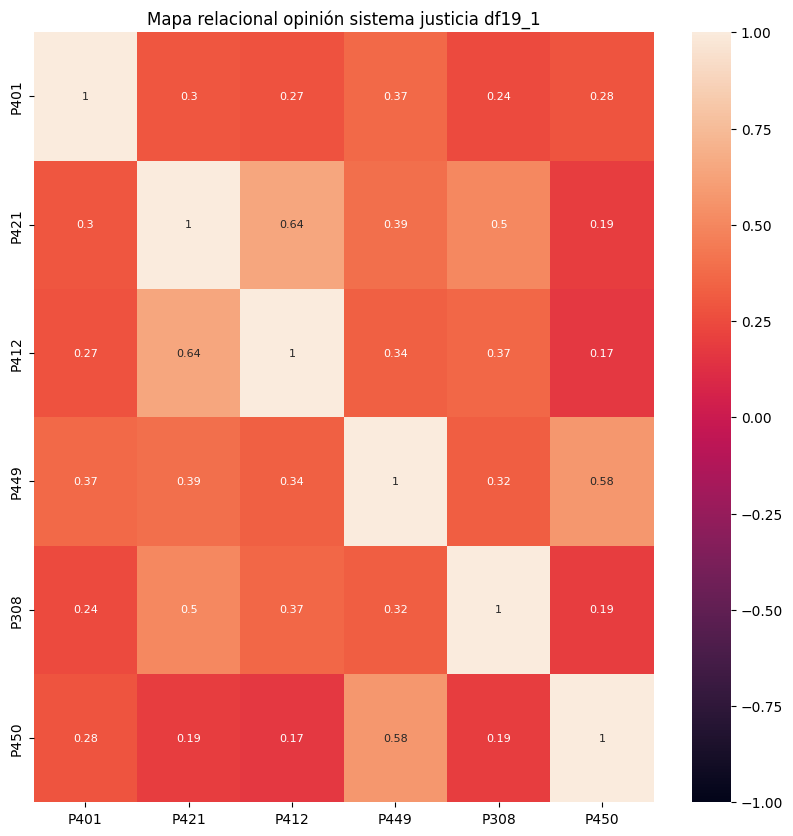

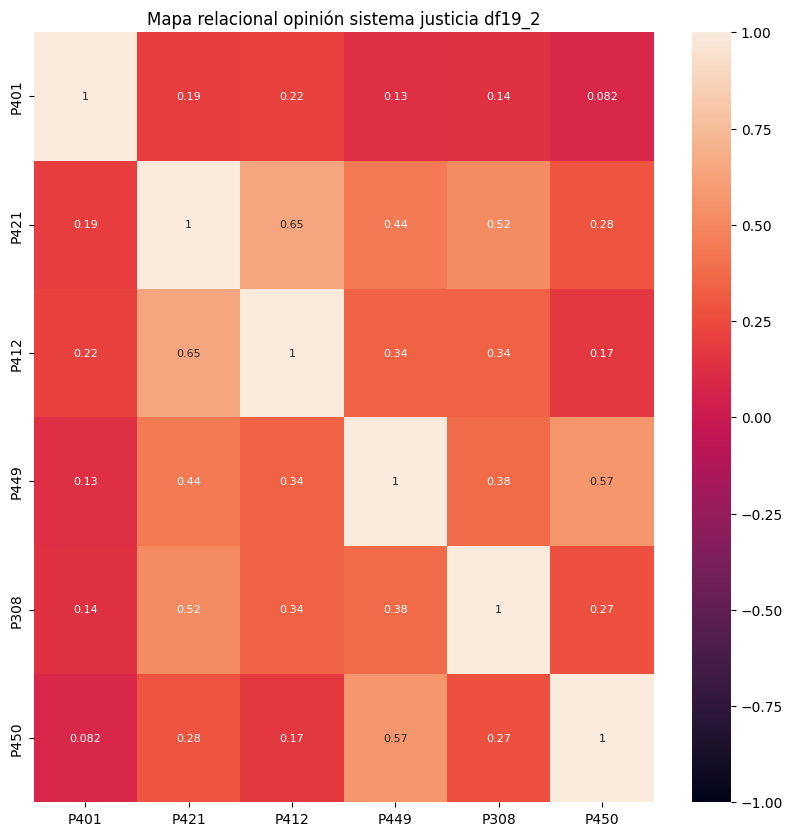

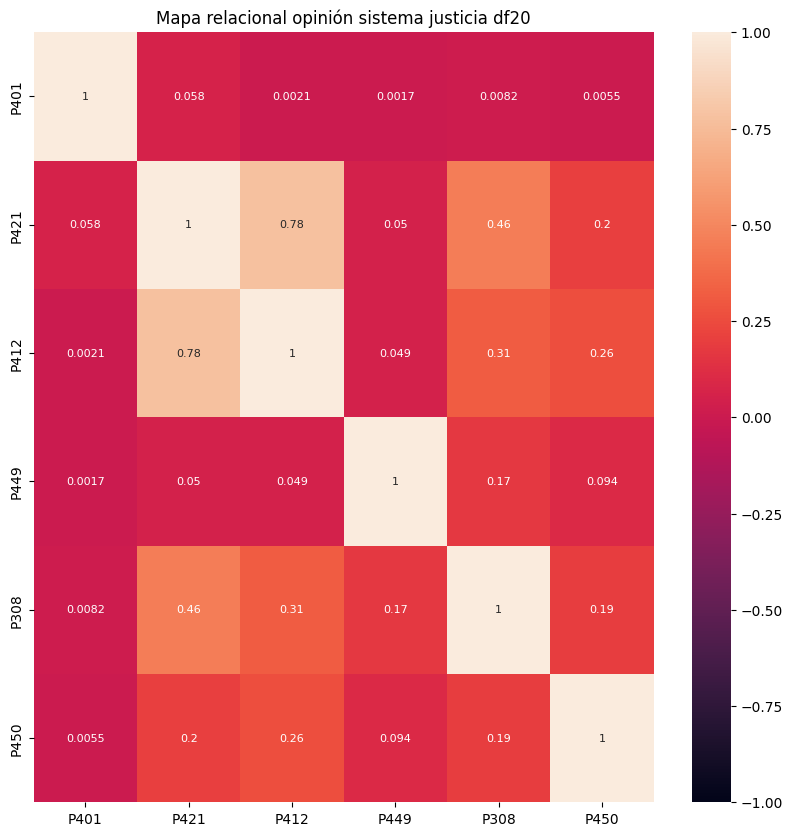

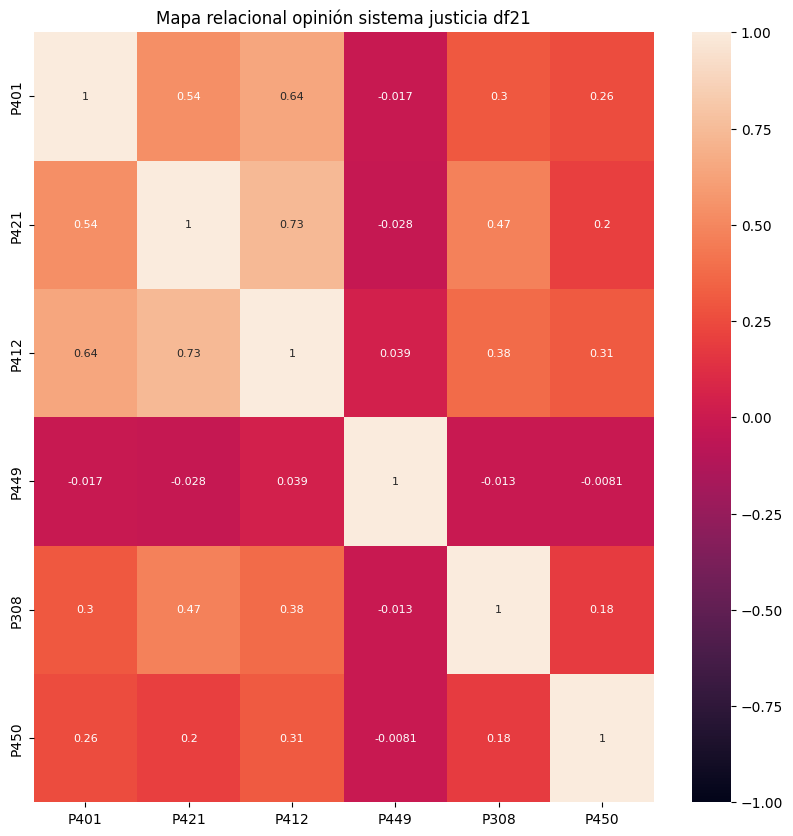

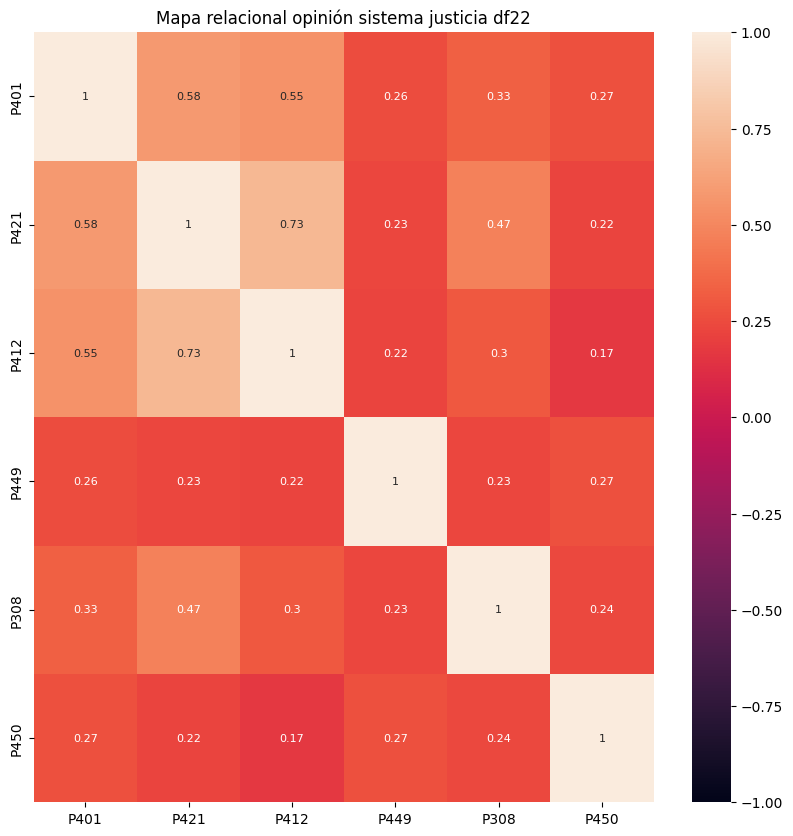

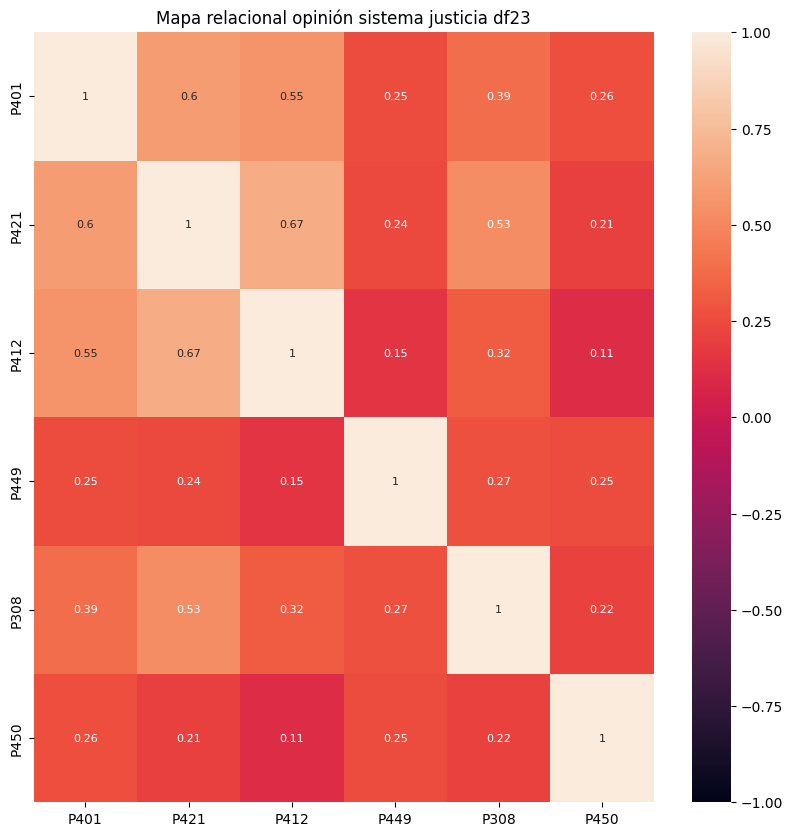

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for name, df in dfs.items():
    # Verificar si todas las columnas están presentes en el DataFrame
    if all(col in df.columns for col in col_opinion):
        # Crear el mapa de calor
        plt.figure(figsize=(10, 10))
        sns.heatmap(df[col_opinion].corr(),
                    vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}).set(title=f"Mapa relacional opinión sistema justicia {name}")
        plt.show()
    else:
        no_estan = [col for col in col_opinion if col not in df.columns]
        print(f"El DataFrame {name} no contiene todas las columnas necesarias para crear el mapa de calor: {no_estan}")



Mostrar esto:


  


*   "P401":¿Cómo califica el servicio prestado por la Policía? (1-5)
*    "P308": ¿Cómo califica la última atención que le brindaron en la llamada?(1-5)
*   "P450": ¿Cómo califica el desempeño de la justicia? (1-5)
*   "P449": ¿Cómo calificaría su relacionamiento con las entidades de la Administración Distrital? (1-3)
*   "P421": atención prestada por la policia (1-5)
*   "P412": califcación habilidades policia (1-5)






In [ ]:
from ahpy import ahpy
#["P401", "P421", "P412", "P449", "P308","P450"]
policia = {('P401', 'P421'): 2, ('P401', 'P412'): 2, ('P401', 'P449'): 6, ('P401', 'P308'): 8,
			 ('P450', 'P401'): 3, ('P421', 'P449'): 6,
                         ('P421', 'P412'): 2, ('P421', 'P308'): 8 , ('P421', 'P450'): 1/4,
                         ('P450', 'P412'): 3, ('P450', 'P449'): 6,
                         ('P450', 'P308'): 7, ('P449', 'P412'): 1/6, ('P449', 'P308'):3 ,
                         ('P412', 'P308'): 9}

policia = ahpy.Compare(name='Agentes_seguridad', comparisons=policia, precision=3, random_index='saaty')

print(policia.target_weights)


print(policia.consistency_ratio)


{'P450': 0.398, 'P401': 0.219, 'P421': 0.171, 'P412': 0.145, 'P449': 0.042, 'P308': 0.025}
0.083


In [ ]:
for name, df in dfs.items():
    df['opinion_entes_justicia'] = 0
    for col, weight in policia.target_weights.items():
        if col in df.columns:
            #print(name, col,df[col].unique())
            df['opinion_entes_justicia'] = df['opinion_entes_justicia'].astype(float) + df[col].astype(float) * weight


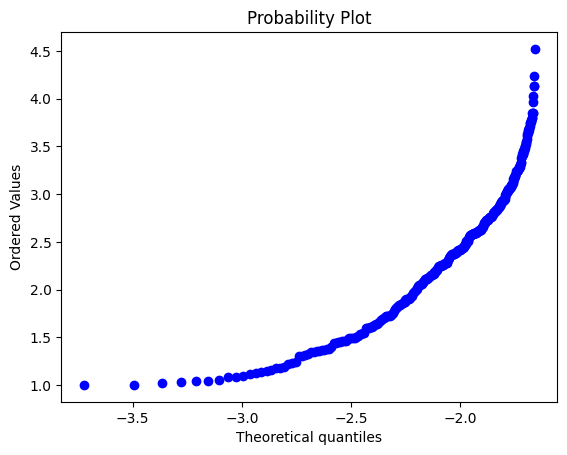

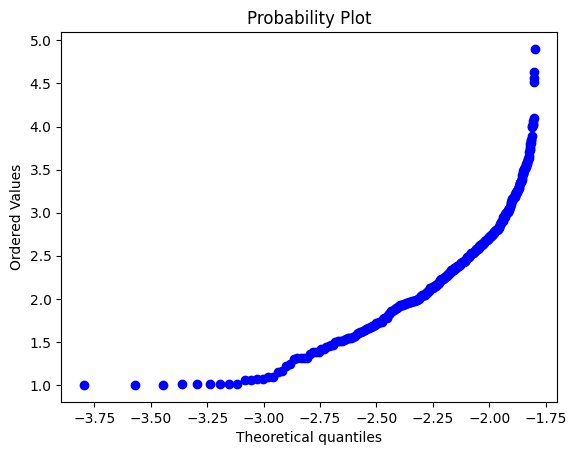

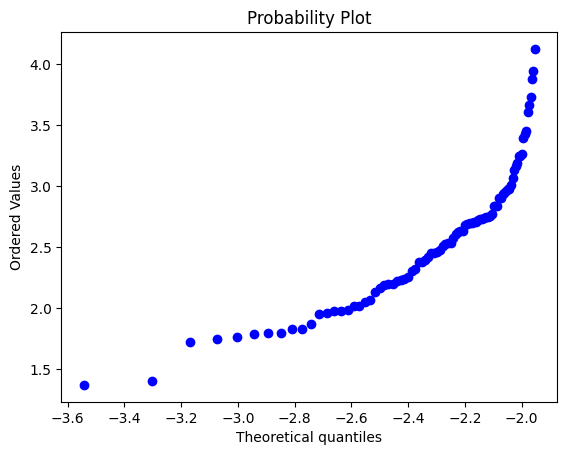

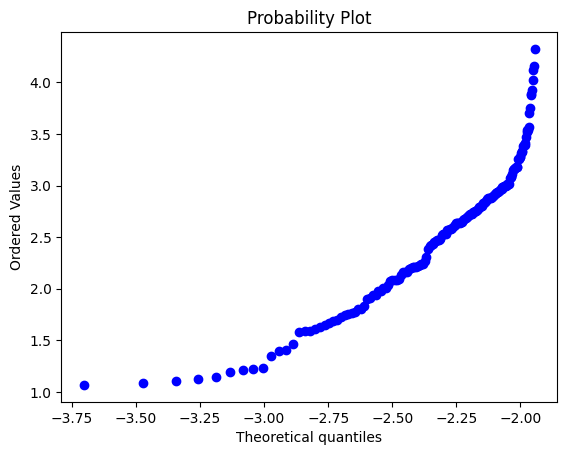

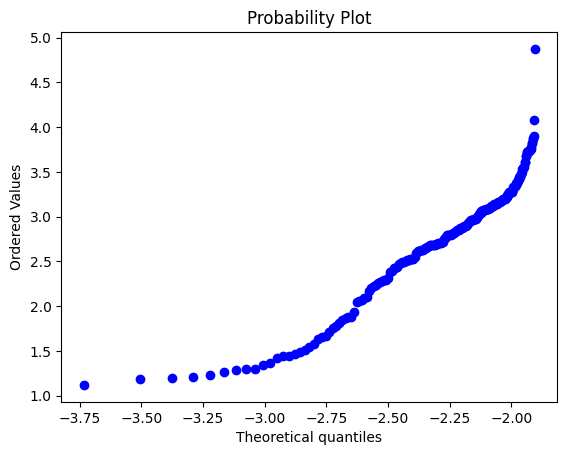

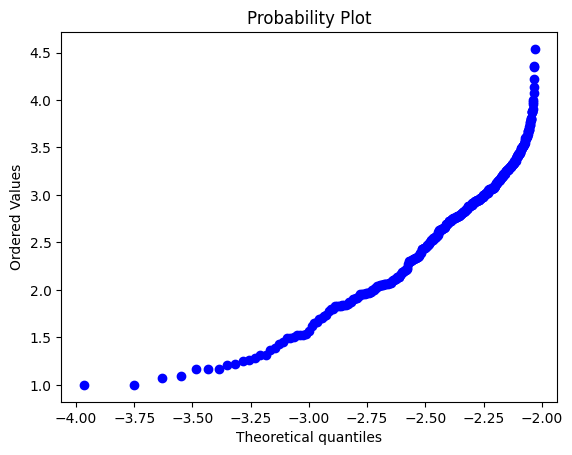

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
for name,df in dfs.items():
# Suponiendo que 'data' es tu columna específica
  stats.probplot(df["opinion_entes_justicia"], dist="norm", plot=plt)
  plt.show()


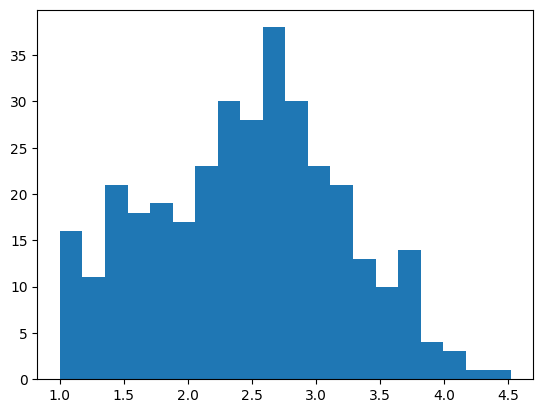

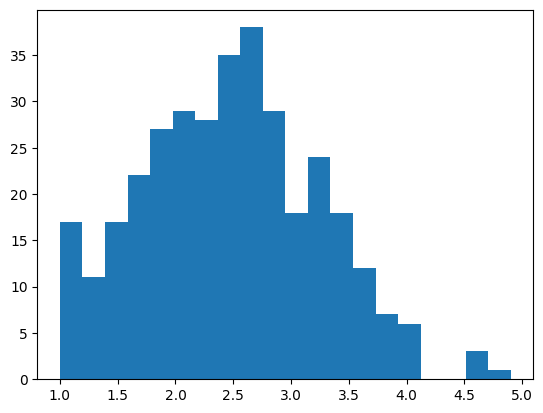

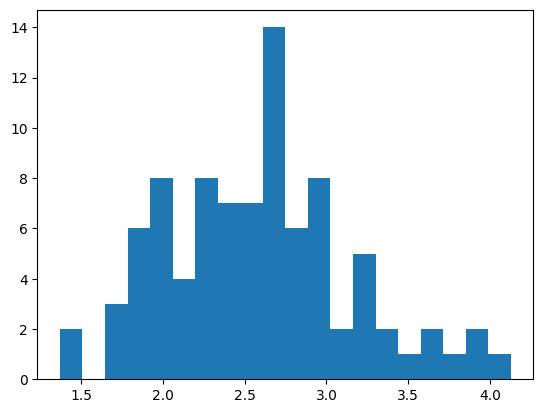

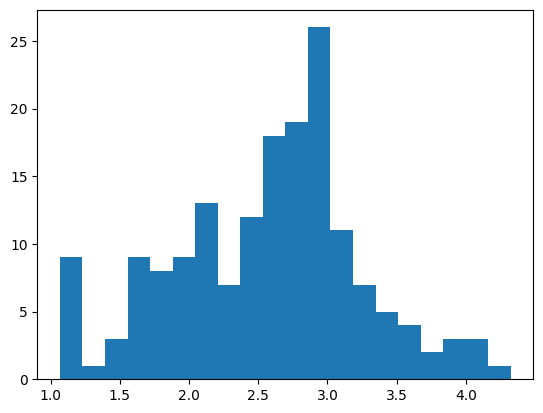

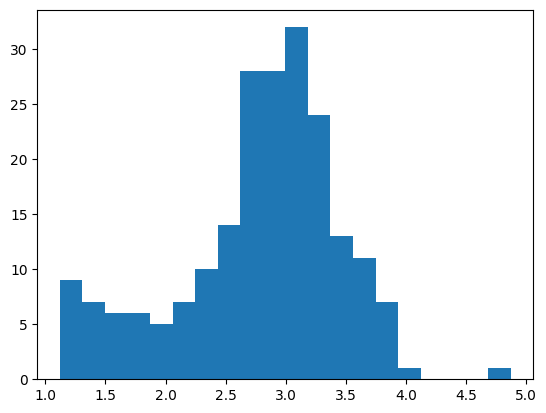

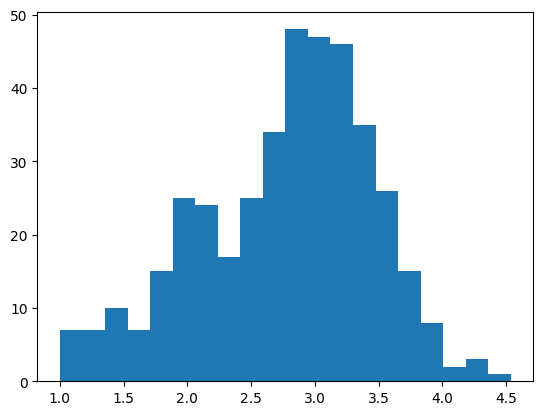

In [ ]:

for name,df in dfs.items():
  plt.hist(df["opinion_entes_justicia"], bins=20)
  plt.show()

In [ ]:
from scipy.stats import shapiro
for name,df in dfs.items():
# Suponiendo que 'data' es tu columna específica
  stat, p = shapiro(df["opinion_entes_justicia"])
  print('Estadístico=%.3f, p=%.3f' % (stat, p))
  alpha = 0.05
  if p > alpha:
      print('Los datos parecen seguir una distribución normal (no se rechaza H0)')
  else:
      print('Los datos no siguen una distribución normal (se rechaza H0)')


Estadístico=nan, p=1.000
Los datos parecen seguir una distribución normal (no se rechaza H0)
Estadístico=nan, p=1.000
Los datos parecen seguir una distribución normal (no se rechaza H0)
Estadístico=nan, p=1.000
Los datos parecen seguir una distribución normal (no se rechaza H0)
Estadístico=nan, p=1.000
Los datos parecen seguir una distribución normal (no se rechaza H0)
Estadístico=nan, p=1.000
Los datos parecen seguir una distribución normal (no se rechaza H0)
Estadístico=nan, p=1.000
Los datos parecen seguir una distribución normal (no se rechaza H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Se puede decir que esta sigue una distribución normal

#Subindicador_2: Percepción Inseguridad Bogotá
(percepcion_seguridad)

"P102","P121","P103","P106"

*   P102 El barrio en el que usted habita es segura o insegura
*   P121 fue testigo de un delito, sin ser víctima? si no
*   P103 Usted considera que Bogotá es segura o insegura
*   P106 ¿Usted cree que la inseguridad en el transcurso de este
año ha disminuido, sigue igual o aumentado



In [ ]:
y=["P102","P121","P103","P106"]
for name, df in dfs.items():
  print(name)
  for i in y:
    print(i, df[i].unique())
  print("\n")

df19_1
P102 [ 2.  1. nan]
P121 [ 4.  1. nan]
P103 [ 1.  2. nan]
P106 [ 3.  2.  1. nan]


df19_2
P102 [2 1]
P121 [4 1]
P103 [2 1]
P106 [3 2 1]


df20
P102 [2 1]
P121 [1 2]
P103 [2 1]
P106 [3 1 2]


df21
P102 [2 1]
P121 [1 4]
P103 [2 1]
P106 [3 2 1]


df22
P102 [2 1]
P121 [4 1]
P103 [2 1]
P106 [3 2 1]


df23
P102 [2 1]
P121 [4 1]
P103 [2 1]
P106 [3 2 1]




In [ ]:
col_percepcion=["P102","P121","P103","P106"]

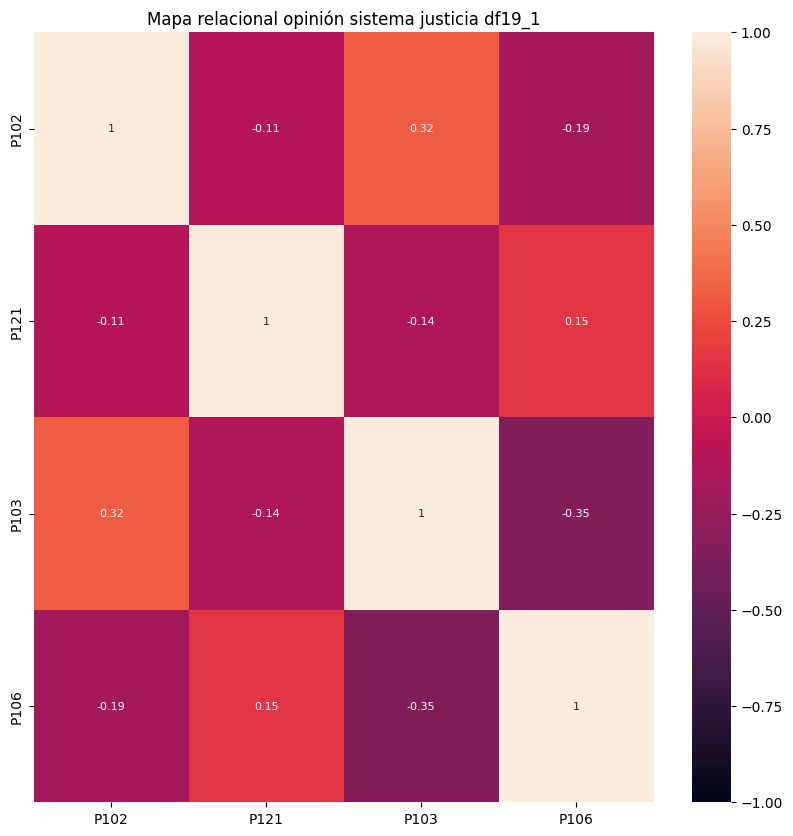

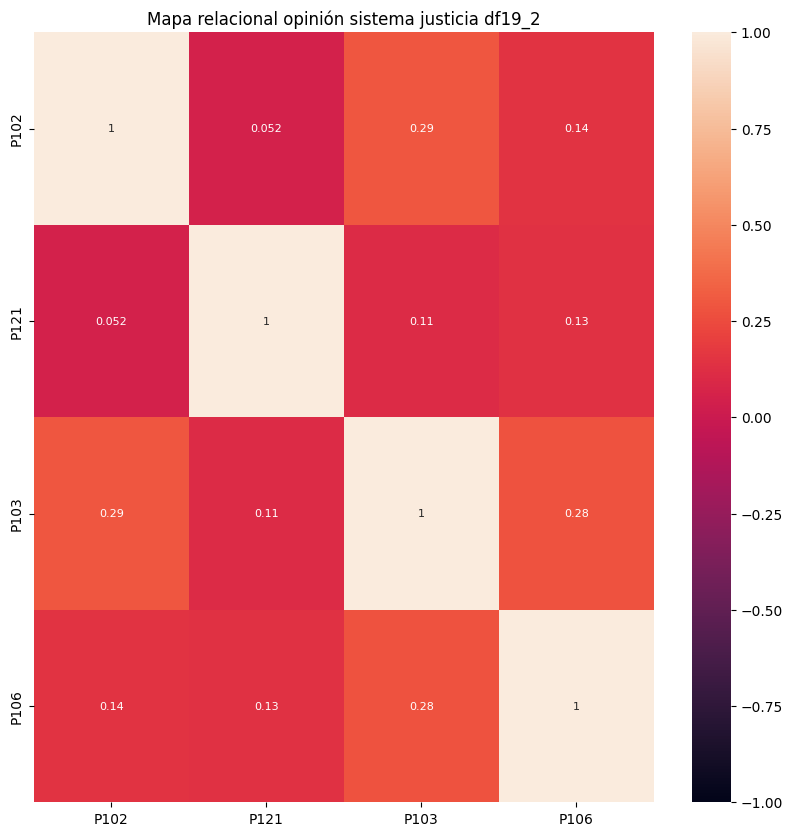

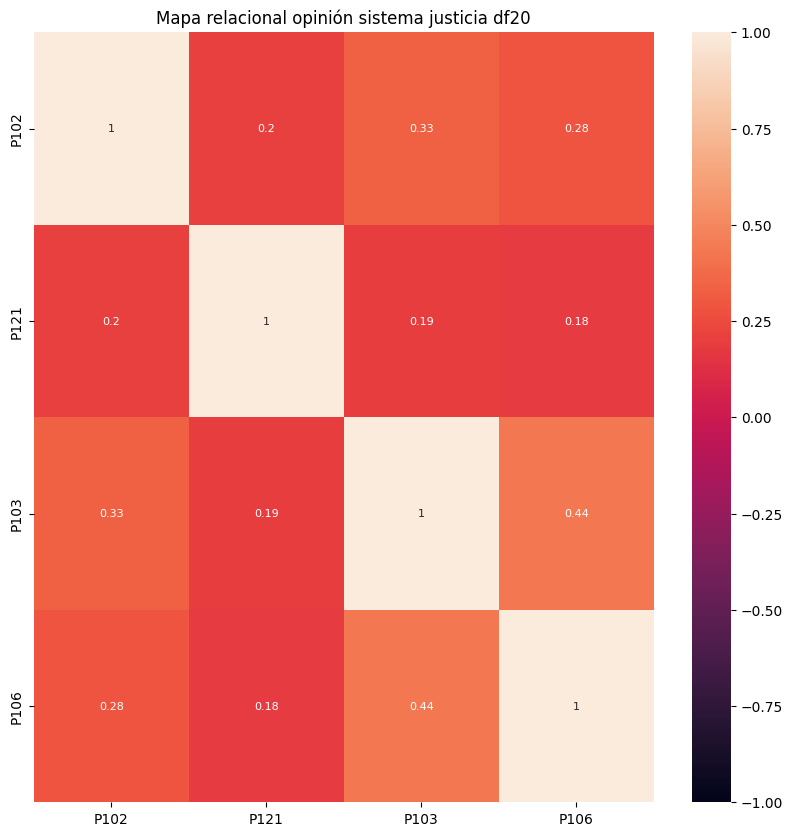

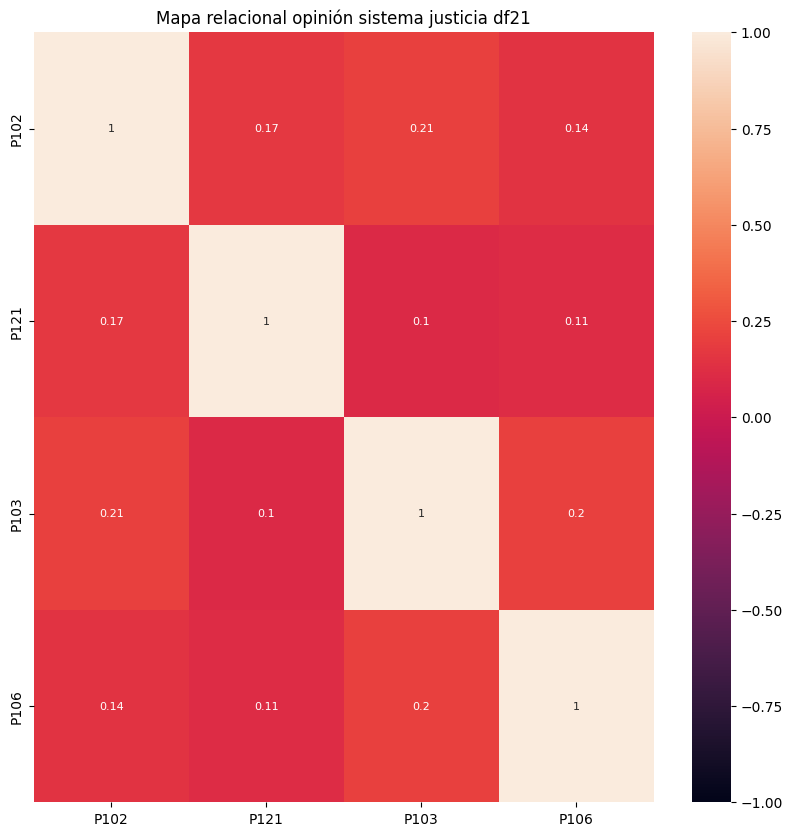

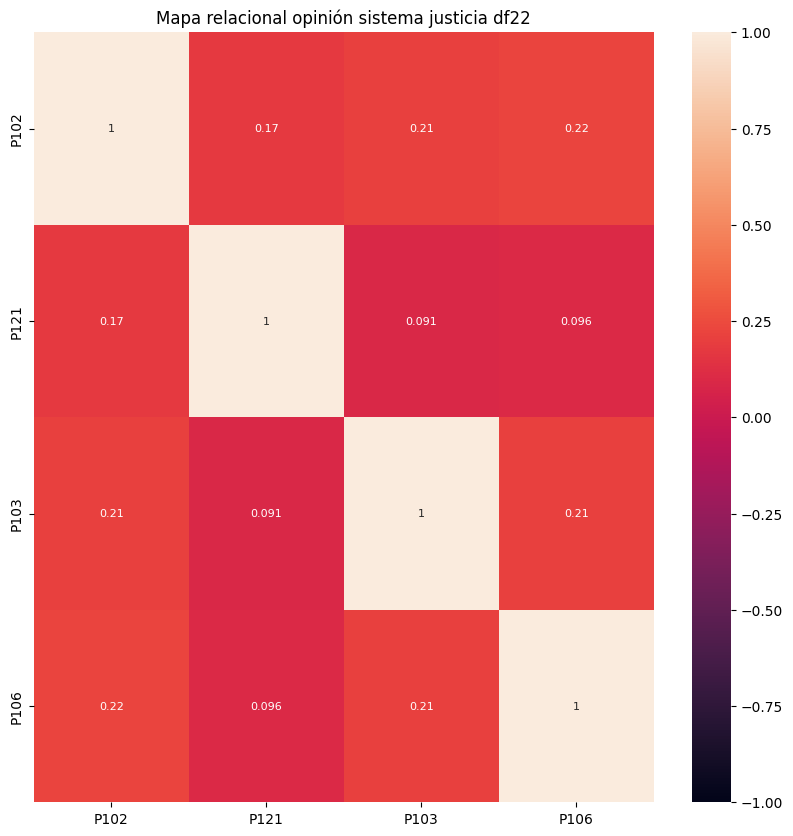

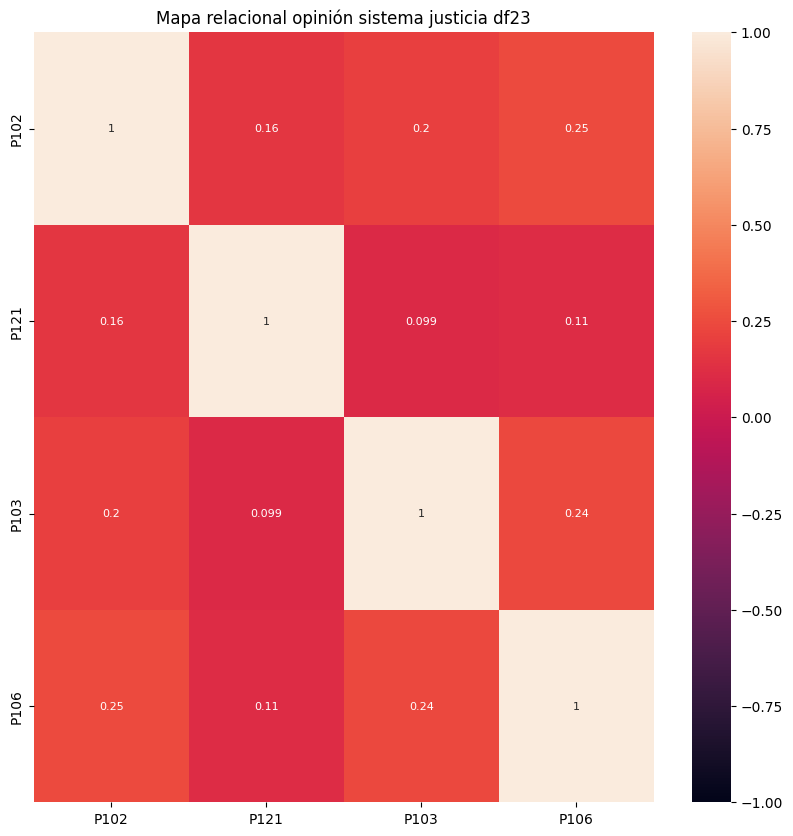

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for name, df in dfs.items():
    mappercep = []
    for co in col_percepcion:
        if co in df.columns:
            mappercep.append(co)

    # Crear el mapa de calor si al menos una columna de percepción está presente en el DataFrame
    if mappercep:
        print("\n")
        plt.figure(figsize=(10, 10))
        sns.heatmap(df[mappercep].corr(),
                    vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}).set(title=f"Mapa relacional opinión sistema justicia {name}")
        plt.show()
    else:
        print(f"No se encontraron columnas de percepción en el DataFrame {name}")







*   P102: El barrio en el que usted habita es. [seguro, inseguro]
*   P103: Usted considera que Bogotá es [seguro, inseguro]
*   P106:Con respecto a la ciudad, en comparación con el año anterior ¿Usted cree que la inseguridad en el transcurso de este año [ha disminuido, sigue igual. aumentado]
*   P121: Fue testigo de un crimen sin ser victima [si, no]



In [ ]:
from ahpy import ahpy

percep_segu = {('P102', 'P103'): 1/2 , ('P102', 'P106'): 5, ('P102', 'P121'): 1/4, ('P103', 'P106'): 5,
			 ('P103', 'P121'): 1/3, ('P106', 'P121'): 1 / 7}

psegu = ahpy.Compare(name='percepcion_seguridad', comparisons=percep_segu, precision=3, random_index='saaty')

print(psegu.target_weights)


print(psegu.consistency_ratio)


{'P121': 0.547, 'P103': 0.241, 'P102': 0.162, 'P106': 0.05}
0.055


In [ ]:
for name, df in dfs.items():
        df["percepcion_seguridad"] = 0.436* df["P121"] +  0.322*df['P102'] + 0.17*df['P103'] +  0.073*df['P106']



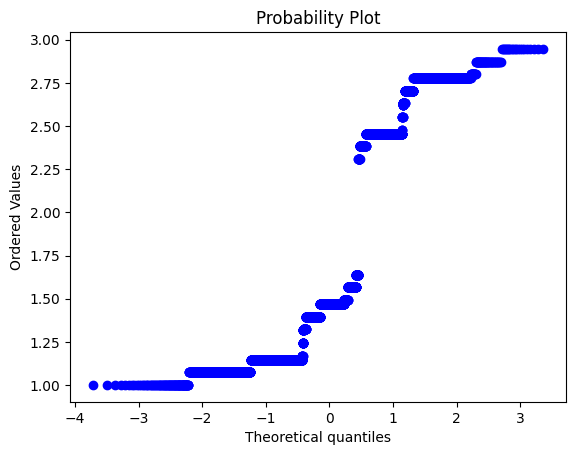

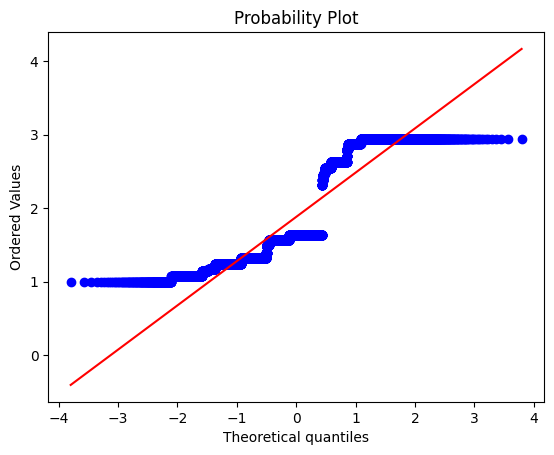

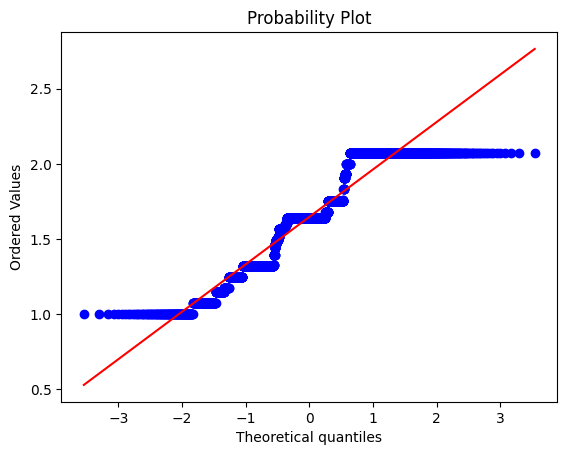

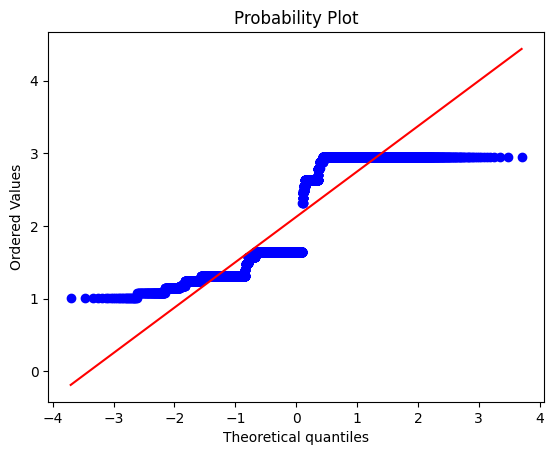

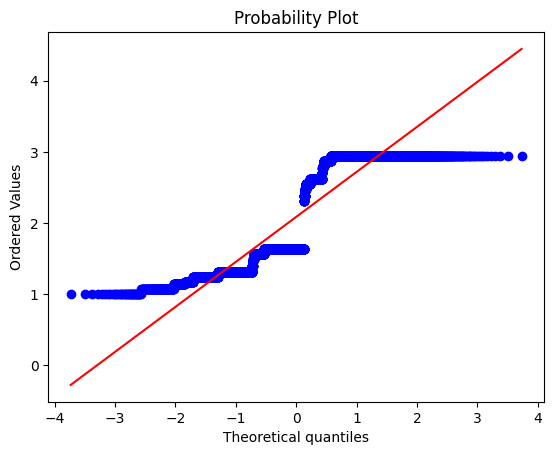

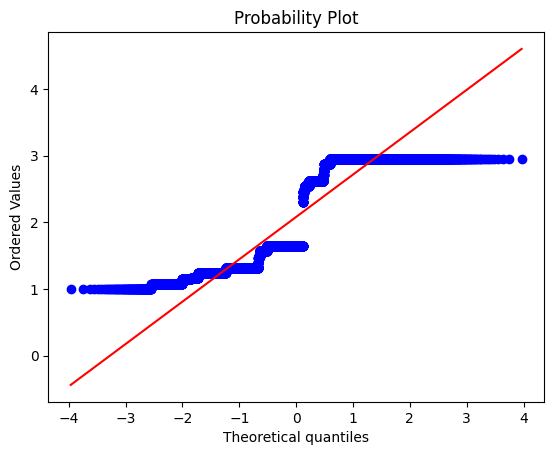

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
for name,df in dfs.items():
# Suponiendo que 'data' es tu columna específica
  stats.probplot(df["percepcion_seguridad"], dist="norm", plot=plt)
  plt.show()


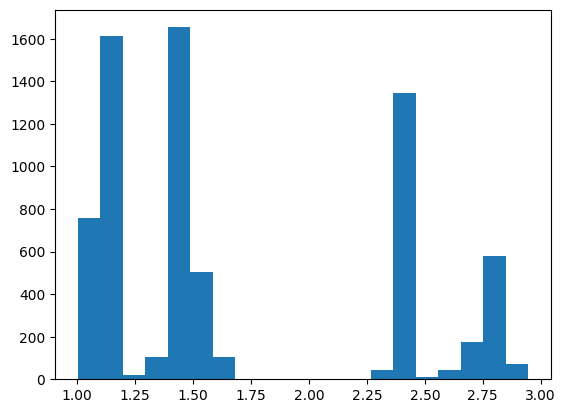

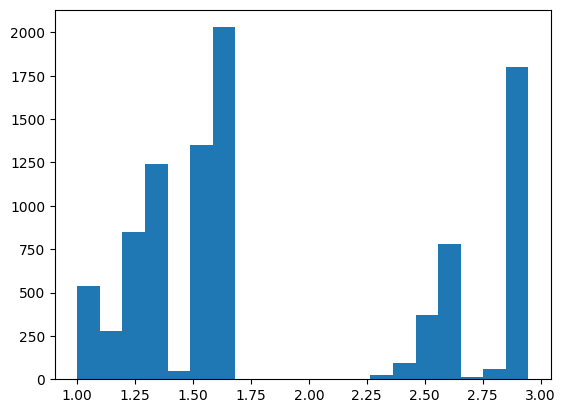

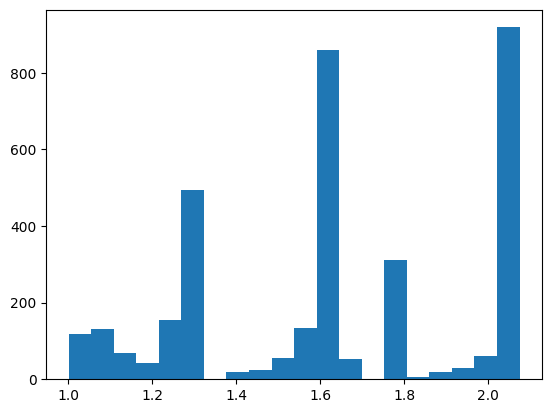

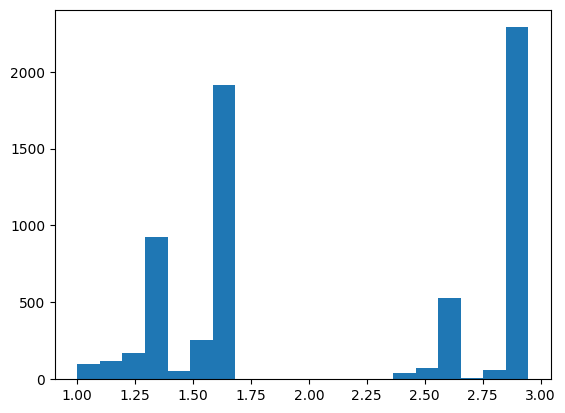

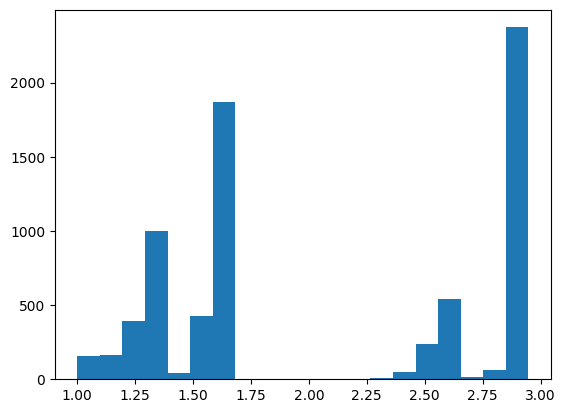

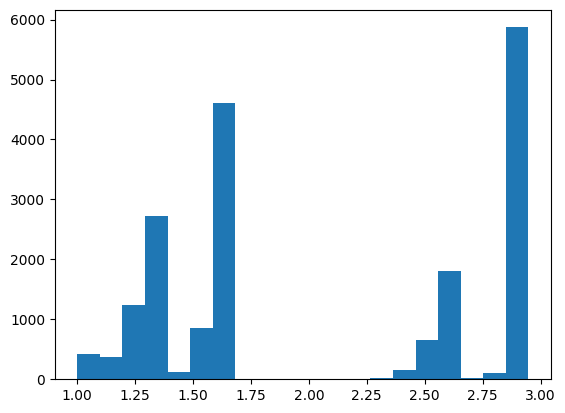

In [ ]:

for name,df in dfs.items():
  plt.hist(df["percepcion_seguridad"], bins=20)
  plt.show()


In [ ]:
from scipy.stats import shapiro

# Suponiendo que 'data' es tu columna específica
stat, p = shapiro(df["percepcion_seguridad"])
print('Estadístico=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Los datos parecen seguir una distribución normal (no se rechaza H0)')
else:
    print('Los datos no siguen una distribución normal (se rechaza H0)')


Estadístico=0.807, p=0.000
Los datos no siguen una distribución normal (se rechaza H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Podemos ver que este indicador no sigue una distribución normal.

#Tasa de denuncia
(Taza_denuncia)

In [ ]:
for name, df in dfs.items():
  df["Taza_denuncia"]=df["Total_victima"]/df["Total_denuncia"]

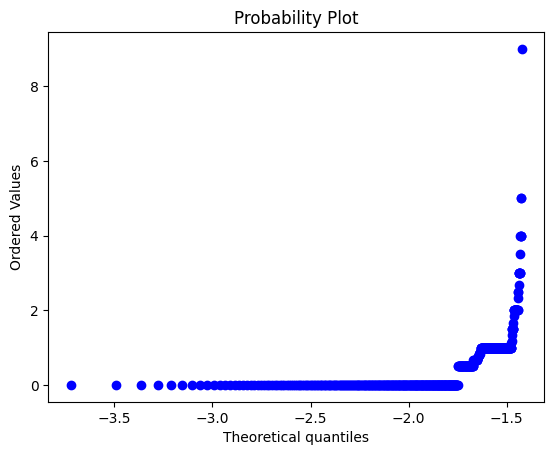

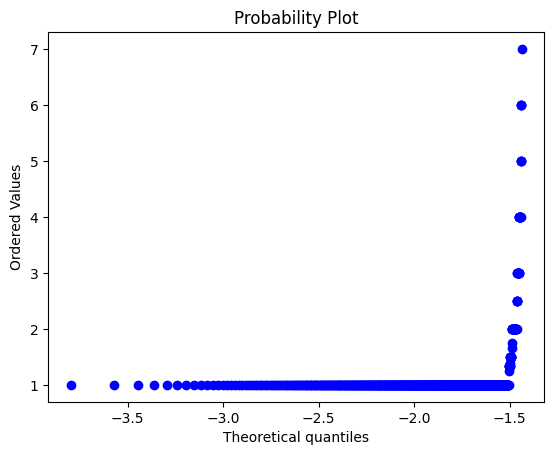

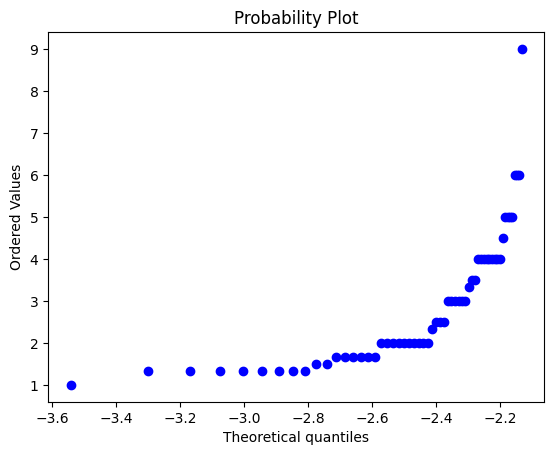

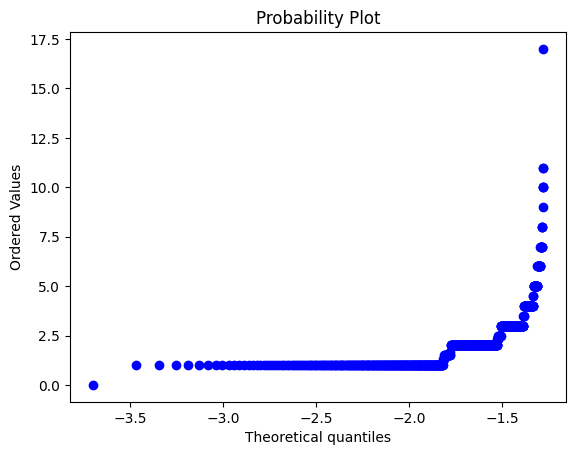

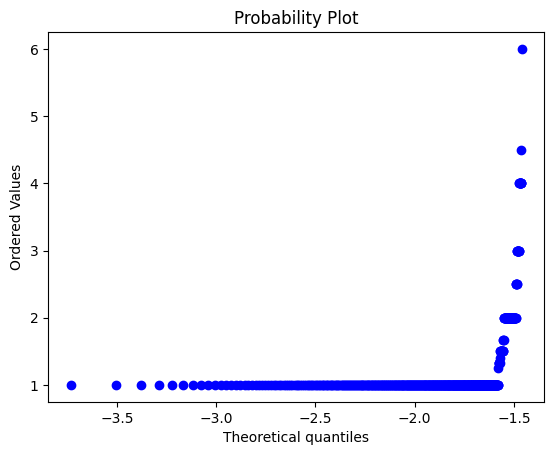

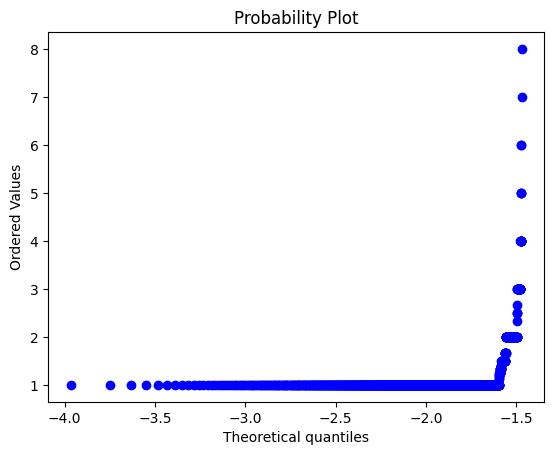

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
for name,df in dfs.items():
# Suponiendo que 'data' es tu columna específica
  stats.probplot(df["Taza_denuncia"], dist="norm", plot=plt)
  plt.show()


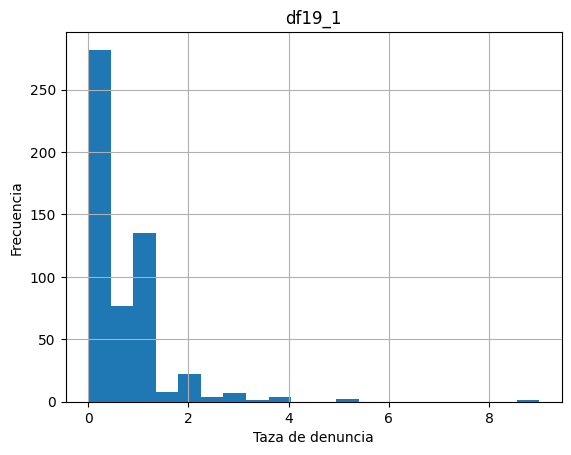

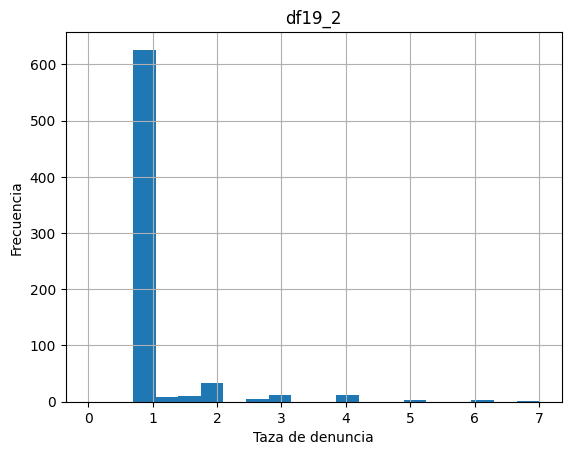

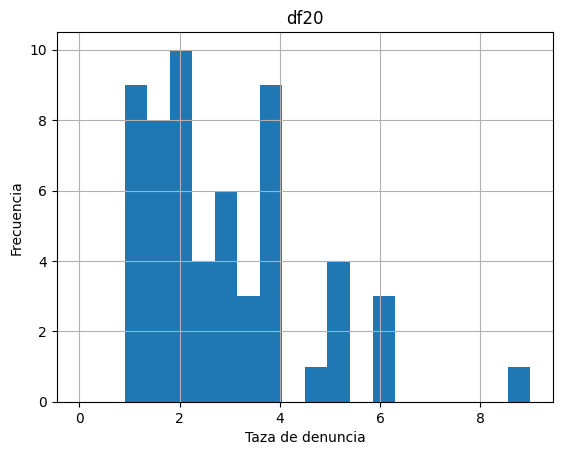

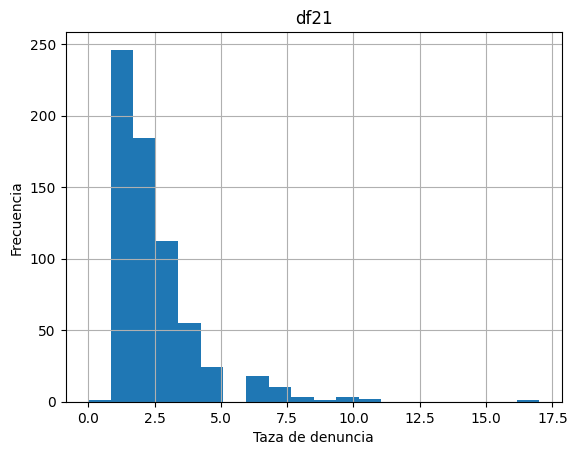

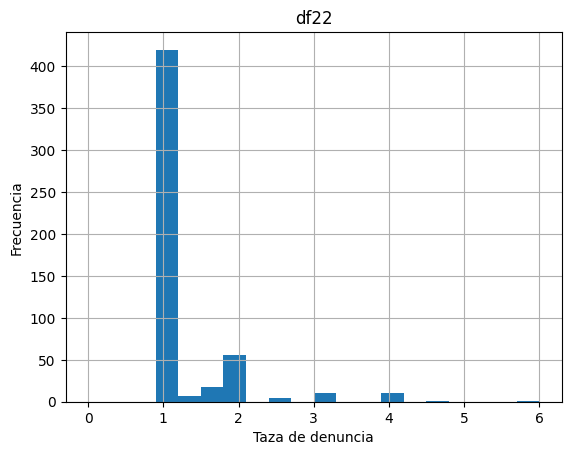

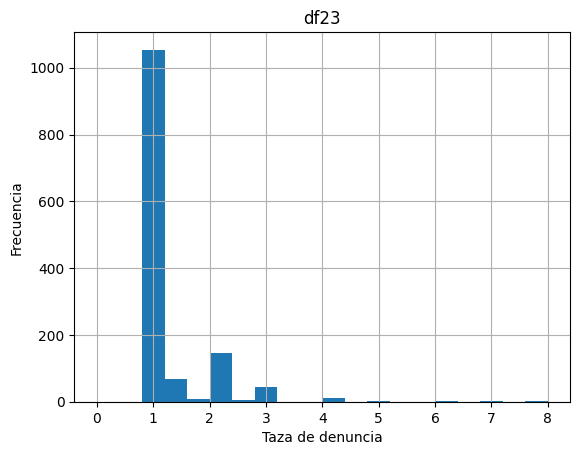

In [ ]:
import numpy as np

for name, df in dfs.items():
    df["Taza_denuncia"] = df["Total_victima"] / df["Total_denuncia"]
    df["Taza_denuncia"] = df["Taza_denuncia"].replace([np.inf, -np.inf], np.nan)  # Reemplazar inf por NaN
    df["Taza_denuncia"].hist(bins=20, range=(0, df["Taza_denuncia"].max()))
    plt.title(name)
    plt.xlabel("Taza de denuncia")
    plt.ylabel("Frecuencia")
    plt.show()


In [ ]:
from scipy.stats import shapiro

# Suponiendo que 'data' es tu columna específica
stat, p = shapiro(df["Taza_denuncia"])
print('Estadístico=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Los datos parecen seguir una distribución normal (no se rechaza H0)')
else:
    print('Los datos no siguen una distribución normal (se rechaza H0)')


Estadístico=nan, p=1.000
Los datos parecen seguir una distribución normal (no se rechaza H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


La taza de denuncia parece seguir una distribución normal

#Elección de indicadores:


 Taza de denuncia vs Indicadores


 Se revisa la covarianza para poder entender cuál es la razón más influyente en la taza de denuncia, esto se logra mediante la medición del Coeficiente de correlación de Kendall entre las variables

#Estudio de relación de indicadores
---

In [ ]:
columnas_seleccionadas = ['Taza_denuncia', 'percepcion_seguridad', 'opinion_entes_justicia']

In [ ]:
for name, df in dfs.items():
  if name == "df20":
    cov_taza_seguridad = df['Taza_denuncia'].cov(df['percepcion_seguridad'])
    cov_taza_justicia = df['Taza_denuncia'].cov(df['opinion_entes_justicia'])
    cov_perp_justicia = df['percepcion_seguridad'].cov(df['opinion_entes_justicia'])
    print(f"Para el {name}","\nLa covarianza entre Taza_denuncia y percepcion_seguridad:",cov_taza_seguridad, "\n La covarianza entre Taza_denuncia y opinion_entes_justicia: ",cov_taza_justicia,"\n La covarianza entre percepcion_seguridad y opinion_entes_justicia: ",cov_perp_justicia,"\n\n")


Para el df20 
La covarianza entre Taza_denuncia y percepcion_seguridad: 0.12150342811050617 
 La covarianza entre Taza_denuncia y opinion_entes_justicia:  -0.343124280843308 
 La covarianza entre percepcion_seguridad y opinion_entes_justicia:  -0.03937176528715666 




AL haber 2 valores que pueden seguir una normal vamos a probar con el método Pearson:

In [ ]:
#pearson
for name, df in dfs.items():
    if name == "df20": #or name == "df21" or name == "df22":
        covarianza = df[columnas_seleccionadas].corr(method='pearson')
        # Mostrar la matriz de covarianza
        print("para el ",name, covarianza, "\n\n")

para el  df20                         Taza_denuncia  percepcion_seguridad  \
Taza_denuncia                1.000000              0.327129   
percepcion_seguridad         0.327129              1.000000   
opinion_entes_justicia      -0.841591             -0.281549   

                        opinion_entes_justicia  
Taza_denuncia                        -0.841591  
percepcion_seguridad                 -0.281549  
opinion_entes_justicia                1.000000   




Como no todas parecen seguir una normal, podemos usar el metodo kendall;" La cual, es una medida no paramétrica de la relación entre dos variables ordinales o continuas y se basa en el número de pares ordenados que tienen el mismo orden en ambas variables. Es adecuado para variables ordinales o continuas no necesariamente normales."https://www.codetodevs.com/correlacion-variables-pandas-corr/#:~:text=kendall%3A%20coeficiente%20de%20correlación%20Tau,o%20continuas%20no%20necesariamente%20normales.

In [ ]:
#kendall

for name, df in dfs.items():
   if name == "df20" :#for name == "df21" or name == "df22":
        covarianza = df[columnas_seleccionadas].corr(method='kendall')
        # Mostrar la matriz de covarianza
        print("para el ",name, covarianza, "\n\n")


para el  df20                         Taza_denuncia  percepcion_seguridad  \
Taza_denuncia                1.000000              0.290518   
percepcion_seguridad         0.290518              1.000000   
opinion_entes_justicia      -0.683130             -0.198922   

                        opinion_entes_justicia  
Taza_denuncia                        -0.683130  
percepcion_seguridad                 -0.198922  
opinion_entes_justicia                1.000000   




Y a su vez con el metodo spearman, el cual "es una medida no paramétrica de la relación entre dos variables y se basa en la correlación entre las posiciones de las variables en un ranking. Es adecuado para variables ordinales o continuas no necesariamente normales." https://www.codetodevs.com/correlacion-variables-pandas-corr/#:~:text=kendall%3A%20coeficiente%20de%20correlación%20Tau,o%20continuas%20no%20necesariamente%20normales.


In [ ]:
# spearman
for name, df in dfs.items():
    if name == "df20":# or name == "df21" or name == "df22":
        covarianza = df[columnas_seleccionadas].corr(method='spearman')
        # Mostrar la matriz de covarianza
        print("para el ",name, covarianza, "\n\n")


para el  df20                         Taza_denuncia  percepcion_seguridad  \
Taza_denuncia                1.000000              0.368965   
percepcion_seguridad         0.368965              1.000000   
opinion_entes_justicia      -0.774806             -0.269947   

                        opinion_entes_justicia  
Taza_denuncia                        -0.774806  
percepcion_seguridad                 -0.269947  
opinion_entes_justicia                1.000000   




In [ ]:
"""
import matplotlib.pyplot as plt
import seaborn as sns
columnas_seleccionadas = ['Taza_denuncia', 'percepcion_seguridad', 'opinion_entes_justicia']
for name, df in dfs.items():
    # Verificar si todas las columnas están presentes en el DataFrame
    if all(col in df.columns for col in col_opinion):
        # Crear el mapa de calor
        plt.figure(figsize=(10, 10))
        sns.heatmap(df[columnas_seleccionadas].corr(),
                    vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}).set(title=f"Mapa relacional opinión sistema justicia {name}")
        plt.show()
    else:
        no_estan = [col for col in columnas_seleccionadas if col not in df.columns]
        print(f"El DataFrame {name} no contiene todas las columnas necesarias para crear el mapa de calor: {no_estan}")

"""
print("hola")

hola


#Selección de Indicadores y su análisis
---

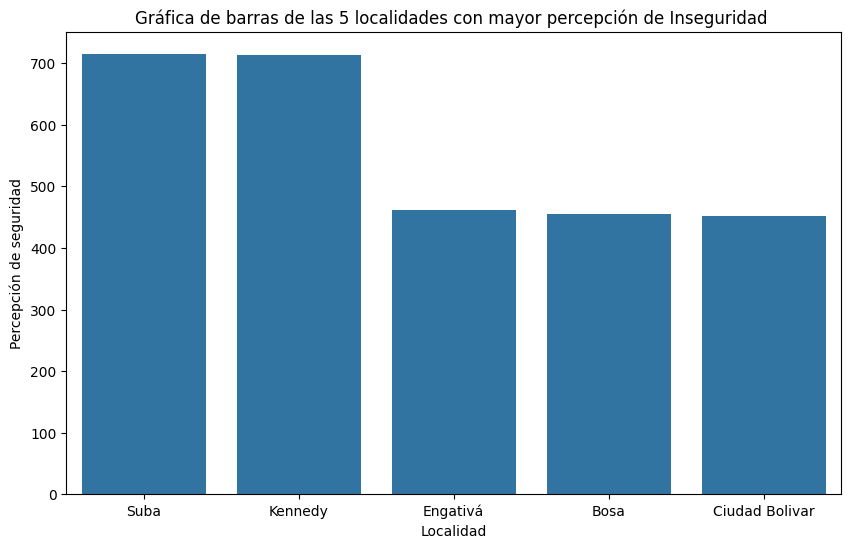

In [ ]:
# Calcular la sumatoria por localidad
sumatoria_df20 = dfs["df20"].groupby('LOCALIDAD')['percepcion_seguridad'].sum().reset_index()

# Ordenar el DataFrame por percepción de seguridad y seleccionar las 5 primeras filas
sumatoria_top5_df20 = sumatoria_df20.sort_values(by='percepcion_seguridad', ascending=False).head(5)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='LOCALIDAD', y='percepcion_seguridad', data=sumatoria_top5_df20)
plt.title('Gráfica de barras de las 5 localidades con mayor percepción de Inseguridad ')
plt.xlabel('Localidad')
plt.ylabel('Percepción de seguridad')
plt.show()


In [ ]:
!pip install geopandas matplotlib

In [ ]:
import geopandas as gpd
geojson_localidades= gpd.read_file('/content/drive/My Drive/poligonos-localidades.geojson')

In [ ]:
geojson_localidades.head()

,Nombre de la localidad,Acto administrativo de la localidad,Area de la localidad,Identificador unico de la localidad,geo_point_2d,geometry
0,CIUDAD BOLIVAR,Acuerdo 14 de 1983,"130002593,080624",19,"{'lon': -74.16195890440652, 'lat': 4.482460265...","MULTIPOLYGON (((-74.18135 4.58892, -74.18092 4..."
1,SUBA,Acuerdo 8 de 1977,"100560477,718254",11,"{'lon': -74.0758452755469, 'lat': 4.7632081213...","MULTIPOLYGON (((-74.03450 4.82547, -74.03489 4..."
2,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,"13834084,806513",18,"{'lon': -74.11336318293525, 'lat': 4.566476900...","MULTIPOLYGON (((-74.12803 4.59254, -74.12829 4..."
3,KENNEDY,Acuerdo 8 de 1977,"38589733,814235",08,"{'lon': -74.15266762383382, 'lat': 4.630347351...","MULTIPOLYGON (((-74.11830 4.63741, -74.11854 4..."
4,USME,Acuerdo 15 de 1993,"215066686,644374",05,"{'lon': -74.14280649581936, 'lat': 4.390025128...","MULTIPOLYGON (((-74.05597 4.50832, -74.05599 4..."


In [ ]:
geojson_localidades.columns

Index(['Nombre de la localidad', 'Acto administrativo de la localidad',
       'Area de la localidad', 'Identificador unico de la localidad',
       'geo_point_2d', 'geometry'],
      dtype='object')

In [ ]:
dfs["df20"].rename(columns={'LOCALIDAD': 'localidad'}, inplace=True)
geojson_localidades.rename(columns={'Nombre de la localidad': 'localidad'}, inplace=True)

In [ ]:
# Sumar los valores de opinion_entes_justicia por localidad en df20
sumatoria = dfs["df20"].groupby('localidad')['opinion_entes_justicia'].sum().reset_index()
sumatoria_taza = dfs["df20"].groupby('localidad')['Taza_denuncia'].sum().reset_index()
sumatoria_inse = dfs["df20"].groupby('localidad')['percepcion_seguridad'].sum().reset_index()
print(sumatoria_inse)

         localidad  percepcion_seguridad
0   Antonio Nariño                78.772
1   Barrios Unidos                86.750
2             Bosa               455.474
3       Candelaria                19.354
4        Chapinero                83.010
5   Ciudad Bolivar               451.245
6         Engativá               461.803
7        Fontibón                202.116
8          Kennedy               713.176
9        Mártires                 41.504
10   Puente Aranda               185.344
11    Rafael Uribe               251.643
12   San Cristóbal               174.252
13        Santa Fe                36.157
14            Suba               714.639
15     Teusaquillo                95.692
16      Tunjuelito               145.438
17         Usaquén               332.671
18            Usme               126.567


In [ ]:
print("Valores únicos en geojson_localidades:", geojson_localidades['localidad'].unique())
print("Valores únicos en sumatoria:", sumatoria['localidad'].unique())


Valores únicos en geojson_localidades: ['CIUDAD BOLIVAR' 'SUBA' 'RAFAEL URIBE URIBE' 'KENNEDY' 'USME'
 'LOS MARTIRES' 'ANTONIO NARIÑO' 'TEUSAQUILLO' 'SUMAPAZ' 'SAN CRISTOBAL'
 'USAQUEN' 'TUNJUELITO' 'BOSA' 'PUENTE ARANDA' 'SANTA FE' 'BARRIOS UNIDOS'
 'FONTIBON' 'ENGATIVA' 'CANDELARIA' 'CHAPINERO']
Valores únicos en sumatoria: ['Antonio Nariño' 'Barrios Unidos' 'Bosa' 'Candelaria' 'Chapinero'
 'Ciudad Bolivar' 'Engativá' 'Fontibón ' 'Kennedy' 'Mártires '
 'Puente Aranda' 'Rafael Uribe' 'San Cristóbal' 'Santa Fe' 'Suba'
 'Teusaquillo' 'Tunjuelito' 'Usaquén' 'Usme']


In [ ]:
sumatoria_taza["localidad"]=sumatoria_taza["localidad"].replace({"Antonio Nariño":"ANTONIO NARIÑO","Barrios Unidos":'BARRIOS UNIDOS',"Bosa":"BOSA","Candelaria":'CANDELARIA','Chapinero':'CHAPINERO'})
sumatoria_taza["localidad"]=sumatoria_taza["localidad"].replace({'Ciudad Bolivar':'CIUDAD BOLIVAR' ,'Engativá':'Engativá' ,'Fontibón ':'FONTIBON' ,'Kennedy':'KENNEDY','Mártires ':'LOS MARTIRES'})
sumatoria_taza["localidad"]=sumatoria_taza["localidad"].replace({'Puente Aranda':'PUENTE ARANDA', 'Rafael Uribe':'RAFAEL URIBE URIBE', 'San Cristóbal':'SAN CRISTOBAL', 'Santa Fe':'SANTA FE', 'Suba':'SUBA'})
sumatoria_taza["localidad"]=sumatoria_taza["localidad"].replace({'Teusaquillo':'TEUSAQUILLO', 'Tunjuelito':'TUNJUELITO' ,'Usaquén':'USAQUEN' , 'Usme':'USME'})

In [ ]:
sumatoria_inse["localidad"]=sumatoria_inse["localidad"].replace({"Antonio Nariño":"ANTONIO NARIÑO","Barrios Unidos":'BARRIOS UNIDOS',"Bosa":"BOSA","Candelaria":'CANDELARIA','Chapinero':'CHAPINERO'})
sumatoria_inse["localidad"]=sumatoria_inse["localidad"].replace({'Ciudad Bolivar':'CIUDAD BOLIVAR' ,'Engativá':'Engativá' ,'Fontibón ':'FONTIBON' ,'Kennedy':'KENNEDY','Mártires ':'LOS MARTIRES'})
sumatoria_inse["localidad"]=sumatoria_inse["localidad"].replace({'Puente Aranda':'PUENTE ARANDA', 'Rafael Uribe':'RAFAEL URIBE URIBE', 'San Cristóbal':'SAN CRISTOBAL', 'Santa Fe':'SANTA FE', 'Suba':'SUBA'})
sumatoria_inse["localidad"]=sumatoria_inse["localidad"].replace({'Teusaquillo':'TEUSAQUILLO', 'Tunjuelito':'TUNJUELITO' ,'Usaquén':'USAQUEN' , 'Usme':'USME'})

In [ ]:
sumatoria["localidad"]=sumatoria["localidad"].replace({"Antonio Nariño":"ANTONIO NARIÑO","Barrios Unidos":'BARRIOS UNIDOS',"Bosa":"BOSA","Candelaria":'CANDELARIA','Chapinero':'CHAPINERO'})
sumatoria["localidad"]=sumatoria["localidad"].replace({'Ciudad Bolivar':'CIUDAD BOLIVAR' ,'Engativá':'Engativá' ,'Fontibón ':'FONTIBON' ,'Kennedy':'KENNEDY','Mártires ':'LOS MARTIRES'})
sumatoria["localidad"]=sumatoria["localidad"].replace({'Puente Aranda':'PUENTE ARANDA', 'Rafael Uribe':'RAFAEL URIBE URIBE', 'San Cristóbal':'SAN CRISTOBAL', 'Santa Fe':'SANTA FE', 'Suba':'SUBA'})
sumatoria["localidad"]=sumatoria["localidad"].replace({'Teusaquillo':'TEUSAQUILLO', 'Tunjuelito':'TUNJUELITO' ,'Usaquén':'USAQUEN' , 'Usme':'USME'})

In [ ]:
print("Valores únicos en geojson_localidades:", geojson_localidades['localidad'].unique())
print("Valores únicos en sumatoria:", sumatoria['localidad'].unique())

Valores únicos en geojson_localidades: ['CIUDAD BOLIVAR' 'SUBA' 'RAFAEL URIBE URIBE' 'KENNEDY' 'USME'
 'LOS MARTIRES' 'ANTONIO NARIÑO' 'TEUSAQUILLO' 'SUMAPAZ' 'SAN CRISTOBAL'
 'USAQUEN' 'TUNJUELITO' 'BOSA' 'PUENTE ARANDA' 'SANTA FE' 'BARRIOS UNIDOS'
 'FONTIBON' 'ENGATIVA' 'CANDELARIA' 'CHAPINERO']
Valores únicos en sumatoria: ['ANTONIO NARIÑO' 'BARRIOS UNIDOS' 'BOSA' 'CANDELARIA' 'CHAPINERO'
 'CIUDAD BOLIVAR' 'Engativá' 'FONTIBON' 'KENNEDY' 'LOS MARTIRES'
 'PUENTE ARANDA' 'RAFAEL URIBE URIBE' 'SAN CRISTOBAL' 'SANTA FE' 'SUBA'
 'TEUSAQUILLO' 'TUNJUELITO' 'USAQUEN' 'USME']


In [ ]:
geojson_localidades[["localidad","geo_point_2d"]]

,localidad,geo_point_2d
0,CIUDAD BOLIVAR,"{'lon': -74.16195890440652, 'lat': 4.482460265..."
1,SUBA,"{'lon': -74.0758452755469, 'lat': 4.7632081213..."
2,RAFAEL URIBE URIBE,"{'lon': -74.11336318293525, 'lat': 4.566476900..."
3,KENNEDY,"{'lon': -74.15266762383382, 'lat': 4.630347351..."
4,USME,"{'lon': -74.14280649581936, 'lat': 4.390025128..."
5,LOS MARTIRES,"{'lon': -74.08794786812679, 'lat': 4.607155934..."
6,ANTONIO NARIÑO,"{'lon': -74.10284240061449, 'lat': 4.588770674..."
7,TEUSAQUILLO,"{'lon': -74.08576901958143, 'lat': 4.641173586..."
8,SUMAPAZ,"{'lon': -74.25697871800469, 'lat': 4.036568747..."
9,SAN CRISTOBAL,"{'lon': -74.06607256050648, 'lat': 4.548749008..."


In [ ]:
merged_data_inse = geojson_localidades.merge(sumatoria_inse, on='localidad', how='inner')
merged_data_taza = geojson_localidades.merge(sumatoria_taza, on='localidad', how='inner')

In [ ]:
merged_data = geojson_localidades.merge(sumatoria, on='localidad', how='inner')


0    -74.161959
1    -74.075845
2    -74.113363
3    -74.152668
4    -74.142806
5    -74.087948
6    -74.102842
7    -74.085769
8    -74.066073
9    -74.027825
10   -74.135989
11   -74.194389
12   -74.111580
13   -74.036218
14   -74.073552
15   -74.140151
16   -74.072071
17   -74.036883
Name: longitud, dtype: float64
0     4.482460
1     4.763208
2     4.566477
3     4.630347
4     4.390025
5     4.607156
6     4.588771
7     4.641174
8     4.548749
9     4.742092
10    4.574841
11    4.621780
12    4.616245
13    4.593973
14    4.669567
15    4.678183
16    4.596605
17    4.644983
Name: latitud, dtype: float64


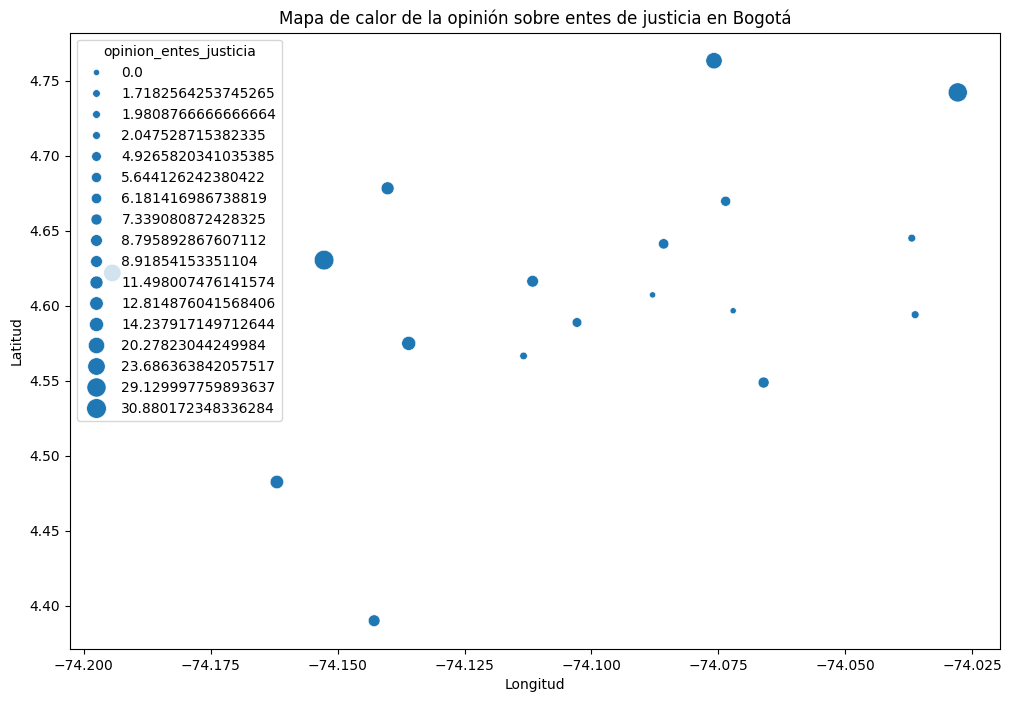

In [ ]:
import re
# Combina los datos de las localidades y las sumatorias por localidad
merged_data = geojson_localidades.merge(sumatoria, on='localidad', how='inner')

# Crear las columnas de longitud y latitud
merged_data['longitud'] = merged_data['geo_point_2d'].apply(lambda x: x['lon'])



merged_data['latitud'] = merged_data['geo_point_2d'].apply(lambda x: x['lat'])

print(merged_data['longitud'])
print(merged_data['latitud'])
# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_data, x='longitud', y='latitud', size='opinion_entes_justicia', legend='full', sizes=(20, 200))
plt.title('Mapa de calor de la opinión sobre entes de justicia en Bogotá')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [ ]:
!pip install geopandas folium matplotlib seaborn


In [ ]:
merged_data[["localidad","opinion_entes_justicia"]]

,localidad,opinion_entes_justicia
0,CIUDAD BOLIVAR,12.814876
1,SUBA,20.278230
2,RAFAEL URIBE URIBE,1.718256
3,KENNEDY,30.880172
4,USME,8.918542
5,LOS MARTIRES,0.000000
6,ANTONIO NARIÑO,4.926582
7,TEUSAQUILLO,6.181417
8,SAN CRISTOBAL,7.339081
9,USAQUEN,29.129998


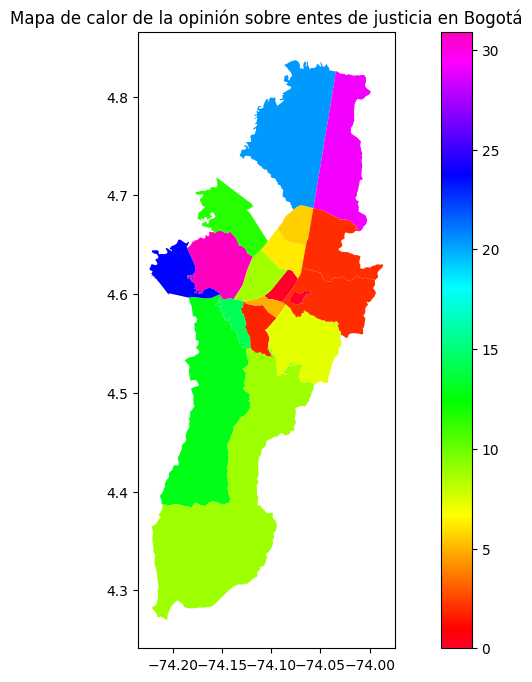

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Crear el mapa utilizando la columna 'opinion_entes_justicia' como color de los polígonos
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column='opinion_entes_justicia', cmap='gist_rainbow', legend=True, ax=ax)
ax.set_title('Mapa de calor de la opinión sobre entes de justicia en Bogotá')
plt.show()

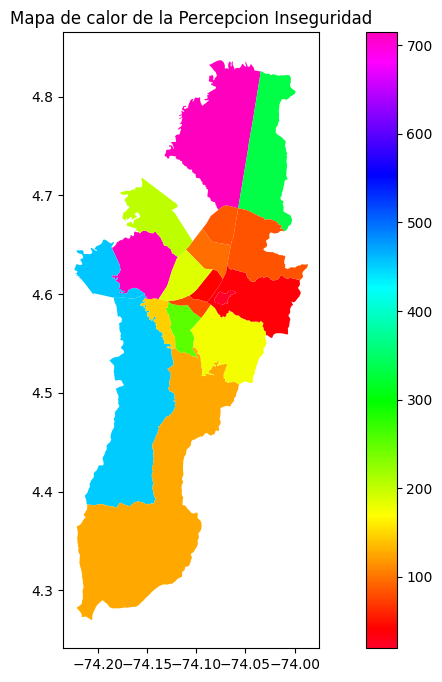

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Crear el mapa utilizando la columna 'percepcion_inseguridad' como color de los polígonos
fig, ax = plt.subplots(figsize=(12, 8))
merged_data_inse.plot(column='percepcion_seguridad', cmap='gist_rainbow', legend=True, ax=ax)
ax.set_title('Mapa de calor de la Percepcion Inseguridad')
plt.show()

In [ ]:
merged_data_inse[["localidad","percepcion_seguridad"]]

,localidad,percepcion_seguridad
0,CIUDAD BOLIVAR,451.245
1,SUBA,714.639
2,RAFAEL URIBE URIBE,251.643
3,KENNEDY,713.176
4,USME,126.567
5,LOS MARTIRES,41.504
6,ANTONIO NARIÑO,78.772
7,TEUSAQUILLO,95.692
8,SAN CRISTOBAL,174.252
9,USAQUEN,332.671


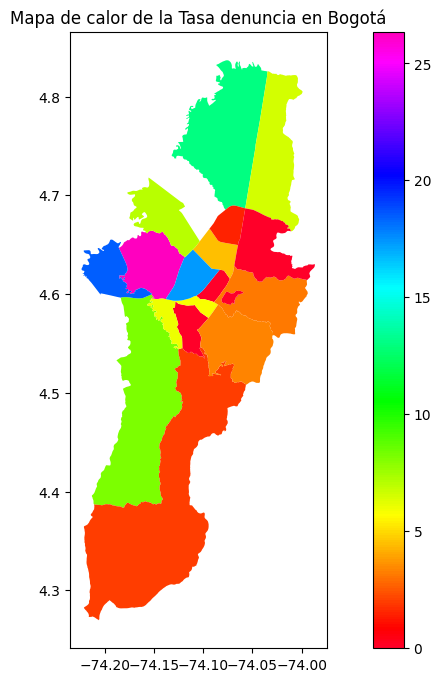

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Crear el mapa utilizando la columna 'opinion_entes_justicia' como color de los polígonos
fig, ax = plt.subplots(figsize=(12, 8))
merged_data_taza.plot(column='Taza_denuncia', cmap='gist_rainbow', legend=True, ax=ax)
ax.set_title('Mapa de calor de la Tasa denuncia en Bogotá')
plt.show()

In [ ]:
merged_data_taza=merged_data_taza.rename(columns={"Taza_denuncia":"Tasa_denuncia"})
merged_data_taza[["localidad","Tasa_denuncia"]]

,localidad,Tasa_denuncia
0,CIUDAD BOLIVAR,8.166667
1,SUBA,13.000000
2,RAFAEL URIBE URIBE,0.000000
3,KENNEDY,26.333333
4,USME,2.000000
5,LOS MARTIRES,0.000000
6,ANTONIO NARIÑO,5.833333
7,TEUSAQUILLO,4.500000
8,SAN CRISTOBAL,3.333333
9,USAQUEN,6.500000


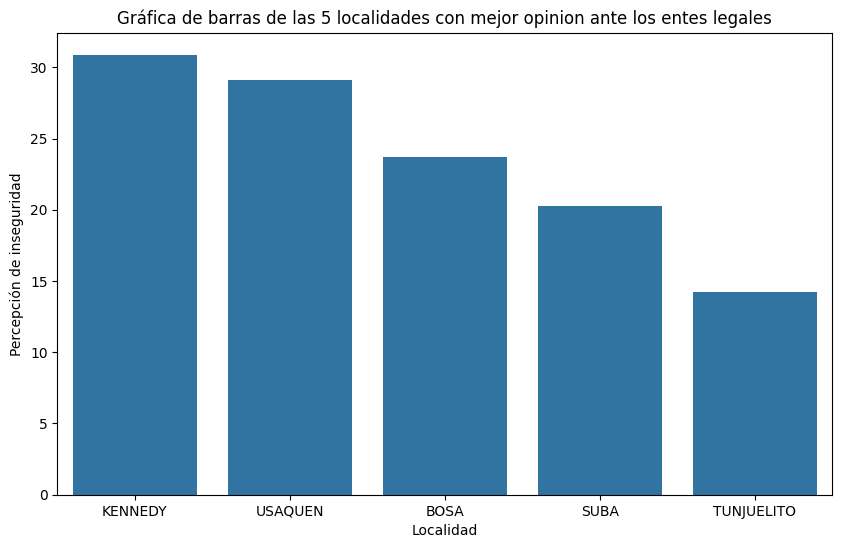

In [ ]:
# Ordenar el DataFrame por percepción de seguridad y seleccionar las 5 primeras filas
sumatoria_top5 = merged_data.sort_values(by='opinion_entes_justicia', ascending=False).head(5)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='localidad', y='opinion_entes_justicia', data=sumatoria_top5)
plt.title('Gráfica de barras de las 5 localidades con mejor opinion ante los entes legales')
plt.xlabel('Localidad')
plt.ylabel('Percepción de inseguridad')
plt.show()


In [ ]:
geojson_localidades.plot